In [ ]:
import tensorflow as tf


In [ ]:
#import os
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("data_3.csv")
df

,cp,tp
0,0.0,0.000363
1,0.0,0.000351
2,0.0,0.000338
3,0.0,0.000328
4,0.0,0.000323
...,...,...
19696,0.0,0.000062
19697,0.0,0.000062
19698,0.0,0.000067
19699,0.0,0.000074


In [ ]:
print(df.to_numpy)


<bound method DataFrame.to_numpy of         cp        tp
0      0.0  0.000363
1      0.0  0.000351
2      0.0  0.000338
3      0.0  0.000328
4      0.0  0.000323
...    ...       ...
19696  0.0  0.000062
19697  0.0  0.000062
19698  0.0  0.000067
19699  0.0  0.000074
19700  0.0  0.000079

[19701 rows x 2 columns]>


In [ ]:
def df_to_X_y2(df, window_size=6):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
X2, y2 = df_to_X_y2(df)
X2.shape, y2.shape


((19695, 6, 2), (19695, 2))

In [ ]:
len(y2)

19695

In [ ]:
X2_train, y2_train = X2[:13786], y2[:13786]
X2_val, y2_val = X2[13786:15756], y2[13786:15756]
X2_test, y2_test = X2[15756:], y2[15756:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((13786, 6, 2), (13786, 2), (1970, 6, 2), (1970, 2), (3939, 6, 2), (3939, 2))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from keras.layers import LSTM, Dense

# Build the model
model4 = Sequential()
model4.add(LSTM(units=50, return_sequences=True, input_shape=(6,2)))
model4.add(LSTM(units=50, return_sequences=False))
model4.add(Dense(units=2))
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])
model4.summary()

model4.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=120, callbacks=[cp4])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 6, 50)             10600     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 30,902
Trainable params: 30,902
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
427/431 [============================>.] - ETA: 0s - loss: 8.9069e-07 - root_mean_squared_error: 9.4376e-04

431/431 [==============================] - 28s 36ms/step - loss: 8.8345e-07 - root_mean_squared_error: 9.3992e-04 - val_loss: 1.3619e-07 - val_root_mean_squared_error: 3.6904e-04
Epoch 2/120
431/431 [==============================] - 6s 14ms/step - loss: 8.7022e-08 - root_mean_squared_error: 2.9500e-04 - val_loss: 1.4245e-07 - val_root_mean_squared_error: 3.7742e-04
Epoch 3/120
431/431 [==============================] - ETA: 0s - loss: 9.3300e-08 - root_mean_squared_error: 3.0545e-04

431/431 [==============================] - 15s 34ms/step - loss: 9.3300e-08 - root_mean_squared_error: 3.0545e-04 - val_loss: 1.2491e-07 - val_root_mean_squared_error: 3.5343e-04
Epoch 4/120
430/431 [============================>.] - ETA: 0s - loss: 8.2265e-08 - root_mean_squared_error: 2.8682e-04

431/431 [==============================] - 14s 33ms/step - loss: 8.2274e-08 - root_mean_squared_error: 2.8683e-04 - val_loss: 1.0664e-07 - val_root_mean_squared_error: 3.2656e-04
Epoch 5/120
431/431 [==============================] - ETA: 0s - loss: 8.5772e-08 - root_mean_squared_error: 2.9287e-04

431/431 [==============================] - 14s 34ms/step - loss: 8.5772e-08 - root_mean_squared_error: 2.9287e-04 - val_loss: 4.8788e-08 - val_root_mean_squared_error: 2.2088e-04
Epoch 6/120
431/431 [==============================] - ETA: 0s - loss: 6.9284e-08 - root_mean_squared_error: 2.6322e-04

431/431 [==============================] - 15s 34ms/step - loss: 6.9284e-08 - root_mean_squared_error: 2.6322e-04 - val_loss: 4.4388e-08 - val_root_mean_squared_error: 2.1068e-04
Epoch 7/120
431/431 [==============================] - 6s 14ms/step - loss: 6.6347e-08 - root_mean_squared_error: 2.5758e-04 - val_loss: 4.9588e-08 - val_root_mean_squared_error: 2.2268e-04
Epoch 8/120
431/431 [==============================] - 5s 11ms/step - loss: 7.6887e-08 - root_mean_squared_error: 2.7728e-04 - val_loss: 2.2258e-07 - val_root_mean_squared_error: 4.7178e-04
Epoch 9/120
431/431 [==============================] - 6s 13ms/step - loss: 6.7663e-08 - root_mean_squared_error: 2.6012e-04 - val_loss: 1.1460e-07 - val_root_mean_squared_error: 3.3853e-04
Epoch 10/120
428/431 [============================>.] - ETA: 0s - loss: 5.7346e-08 - root_mean_squared_error: 2.3947e-04

431/431 [==============================] - 14s 33ms/step - loss: 5.7420e-08 - root_mean_squared_error: 2.3963e-04 - val_loss: 3.2293e-08 - val_root_mean_squared_error: 1.7970e-04
Epoch 11/120
431/431 [==============================] - 5s 13ms/step - loss: 4.9135e-08 - root_mean_squared_error: 2.2167e-04 - val_loss: 5.5173e-08 - val_root_mean_squared_error: 2.3489e-04
Epoch 12/120
431/431 [==============================] - 6s 14ms/step - loss: 4.9139e-08 - root_mean_squared_error: 2.2167e-04 - val_loss: 1.0736e-07 - val_root_mean_squared_error: 3.2765e-04
Epoch 13/120
428/431 [============================>.] - ETA: 0s - loss: 5.3560e-08 - root_mean_squared_error: 2.3143e-04

431/431 [==============================] - 15s 35ms/step - loss: 5.3349e-08 - root_mean_squared_error: 2.3097e-04 - val_loss: 2.4236e-08 - val_root_mean_squared_error: 1.5568e-04
Epoch 14/120
431/431 [==============================] - 6s 14ms/step - loss: 4.8685e-08 - root_mean_squared_error: 2.2065e-04 - val_loss: 7.2342e-08 - val_root_mean_squared_error: 2.6896e-04
Epoch 15/120
431/431 [==============================] - 5s 12ms/step - loss: 3.6263e-08 - root_mean_squared_error: 1.9043e-04 - val_loss: 3.1328e-08 - val_root_mean_squared_error: 1.7700e-04
Epoch 16/120
431/431 [==============================] - 6s 13ms/step - loss: 4.6549e-08 - root_mean_squared_error: 2.1575e-04 - val_loss: 6.0320e-08 - val_root_mean_squared_error: 2.4560e-04
Epoch 17/120
431/431 [==============================] - 6s 13ms/step - loss: 4.3831e-08 - root_mean_squared_error: 2.0936e-04 - val_loss: 5.0412e-08 - val_root_mean_squared_error: 2.2453e-04
Epoch 18/120
431/431 [==============================] - 5

431/431 [==============================] - 15s 35ms/step - loss: 3.1477e-08 - root_mean_squared_error: 1.7742e-04 - val_loss: 1.8327e-08 - val_root_mean_squared_error: 1.3538e-04
Epoch 20/120
428/431 [============================>.] - ETA: 0s - loss: 4.0207e-08 - root_mean_squared_error: 2.0052e-04

431/431 [==============================] - 14s 34ms/step - loss: 4.0332e-08 - root_mean_squared_error: 2.0083e-04 - val_loss: 1.5159e-08 - val_root_mean_squared_error: 1.2312e-04
Epoch 21/120
431/431 [==============================] - 5s 12ms/step - loss: 3.6802e-08 - root_mean_squared_error: 1.9184e-04 - val_loss: 3.7401e-08 - val_root_mean_squared_error: 1.9339e-04
Epoch 22/120
431/431 [==============================] - 6s 13ms/step - loss: 2.9402e-08 - root_mean_squared_error: 1.7147e-04 - val_loss: 1.7397e-08 - val_root_mean_squared_error: 1.3190e-04
Epoch 23/120
431/431 [==============================] - 5s 12ms/step - loss: 3.6356e-08 - root_mean_squared_error: 1.9067e-04 - val_loss: 2.6623e-08 - val_root_mean_squared_error: 1.6317e-04
Epoch 24/120
430/431 [============================>.] - ETA: 0s - loss: 2.8234e-08 - root_mean_squared_error: 1.6803e-04

431/431 [==============================] - 14s 33ms/step - loss: 2.8225e-08 - root_mean_squared_error: 1.6800e-04 - val_loss: 1.2618e-08 - val_root_mean_squared_error: 1.1233e-04
Epoch 25/120
431/431 [==============================] - 6s 13ms/step - loss: 2.8119e-08 - root_mean_squared_error: 1.6769e-04 - val_loss: 5.6540e-08 - val_root_mean_squared_error: 2.3778e-04
Epoch 26/120
431/431 [==============================] - 5s 12ms/step - loss: 3.0641e-08 - root_mean_squared_error: 1.7504e-04 - val_loss: 2.1393e-08 - val_root_mean_squared_error: 1.4626e-04
Epoch 27/120
431/431 [==============================] - 6s 14ms/step - loss: 2.9774e-08 - root_mean_squared_error: 1.7255e-04 - val_loss: 1.9392e-08 - val_root_mean_squared_error: 1.3925e-04
Epoch 28/120
431/431 [==============================] - 5s 12ms/step - loss: 3.3492e-08 - root_mean_squared_error: 1.8301e-04 - val_loss: 6.1436e-08 - val_root_mean_squared_error: 2.4786e-04
Epoch 29/120
431/431 [==============================] - E

431/431 [==============================] - 15s 34ms/step - loss: 2.4167e-08 - root_mean_squared_error: 1.5546e-04 - val_loss: 1.0854e-08 - val_root_mean_squared_error: 1.0418e-04
Epoch 30/120
431/431 [==============================] - 6s 14ms/step - loss: 3.0843e-08 - root_mean_squared_error: 1.7562e-04 - val_loss: 2.9334e-08 - val_root_mean_squared_error: 1.7127e-04
Epoch 31/120
431/431 [==============================] - 5s 12ms/step - loss: 2.5531e-08 - root_mean_squared_error: 1.5978e-04 - val_loss: 1.9362e-08 - val_root_mean_squared_error: 1.3915e-04
Epoch 32/120
431/431 [==============================] - 6s 14ms/step - loss: 2.7899e-08 - root_mean_squared_error: 1.6703e-04 - val_loss: 3.7655e-08 - val_root_mean_squared_error: 1.9405e-04
Epoch 33/120
431/431 [==============================] - 5s 12ms/step - loss: 2.6587e-08 - root_mean_squared_error: 1.6306e-04 - val_loss: 2.4821e-08 - val_root_mean_squared_error: 1.5755e-04
Epoch 34/120
431/431 [==============================] - 6

431/431 [==============================] - 15s 34ms/step - loss: 2.6121e-08 - root_mean_squared_error: 1.6162e-04 - val_loss: 1.0456e-08 - val_root_mean_squared_error: 1.0226e-04
Epoch 39/120
431/431 [==============================] - 6s 14ms/step - loss: 2.2773e-08 - root_mean_squared_error: 1.5091e-04 - val_loss: 2.9408e-08 - val_root_mean_squared_error: 1.7149e-04
Epoch 40/120
431/431 [==============================] - 5s 12ms/step - loss: 2.8712e-08 - root_mean_squared_error: 1.6945e-04 - val_loss: 1.0527e-08 - val_root_mean_squared_error: 1.0260e-04
Epoch 41/120
431/431 [==============================] - ETA: 0s - loss: 2.2372e-08 - root_mean_squared_error: 1.4957e-04

431/431 [==============================] - 15s 34ms/step - loss: 2.2372e-08 - root_mean_squared_error: 1.4957e-04 - val_loss: 1.0154e-08 - val_root_mean_squared_error: 1.0077e-04
Epoch 42/120
431/431 [==============================] - 5s 12ms/step - loss: 2.4084e-08 - root_mean_squared_error: 1.5519e-04 - val_loss: 1.3911e-08 - val_root_mean_squared_error: 1.1794e-04
Epoch 43/120
431/431 [==============================] - 5s 12ms/step - loss: 2.1887e-08 - root_mean_squared_error: 1.4794e-04 - val_loss: 1.0865e-08 - val_root_mean_squared_error: 1.0424e-04
Epoch 44/120
431/431 [==============================] - 6s 13ms/step - loss: 2.2081e-08 - root_mean_squared_error: 1.4860e-04 - val_loss: 2.2935e-08 - val_root_mean_squared_error: 1.5144e-04
Epoch 45/120
431/431 [==============================] - 5s 12ms/step - loss: 2.5267e-08 - root_mean_squared_error: 1.5895e-04 - val_loss: 1.5161e-08 - val_root_mean_squared_error: 1.2313e-04
Epoch 46/120
431/431 [==============================] - 6

431/431 [==============================] - 18s 42ms/step - loss: 1.9531e-08 - root_mean_squared_error: 1.3975e-04 - val_loss: 1.0052e-08 - val_root_mean_squared_error: 1.0026e-04
Epoch 56/120
431/431 [==============================] - 5s 12ms/step - loss: 2.1237e-08 - root_mean_squared_error: 1.4573e-04 - val_loss: 2.7011e-08 - val_root_mean_squared_error: 1.6435e-04
Epoch 57/120
431/431 [==============================] - 6s 13ms/step - loss: 2.2166e-08 - root_mean_squared_error: 1.4888e-04 - val_loss: 2.3265e-08 - val_root_mean_squared_error: 1.5253e-04
Epoch 58/120
431/431 [==============================] - 5s 12ms/step - loss: 1.9959e-08 - root_mean_squared_error: 1.4128e-04 - val_loss: 4.4931e-08 - val_root_mean_squared_error: 2.1197e-04
Epoch 59/120
431/431 [==============================] - 5s 12ms/step - loss: 1.9326e-08 - root_mean_squared_error: 1.3902e-04 - val_loss: 1.2788e-08 - val_root_mean_squared_error: 1.1308e-04
Epoch 60/120
431/431 [==============================] - 6

431/431 [==============================] - 14s 33ms/step - loss: 1.8169e-08 - root_mean_squared_error: 1.3479e-04 - val_loss: 9.0417e-09 - val_root_mean_squared_error: 9.5088e-05
Epoch 66/120
431/431 [==============================] - 5s 12ms/step - loss: 2.0458e-08 - root_mean_squared_error: 1.4303e-04 - val_loss: 2.7426e-08 - val_root_mean_squared_error: 1.6561e-04
Epoch 67/120
431/431 [==============================] - 6s 14ms/step - loss: 2.2806e-08 - root_mean_squared_error: 1.5102e-04 - val_loss: 2.3524e-08 - val_root_mean_squared_error: 1.5337e-04
Epoch 68/120
431/431 [==============================] - 5s 12ms/step - loss: 1.7004e-08 - root_mean_squared_error: 1.3040e-04 - val_loss: 6.3931e-08 - val_root_mean_squared_error: 2.5285e-04
Epoch 69/120
431/431 [==============================] - 6s 14ms/step - loss: 2.4885e-08 - root_mean_squared_error: 1.5775e-04 - val_loss: 4.9483e-08 - val_root_mean_squared_error: 2.2245e-04
Epoch 70/120
431/431 [==============================] - 5

431/431 [==============================] - 14s 33ms/step - loss: 2.2030e-08 - root_mean_squared_error: 1.4842e-04 - val_loss: 8.8947e-09 - val_root_mean_squared_error: 9.4312e-05
Epoch 74/120
431/431 [==============================] - 6s 14ms/step - loss: 1.6755e-08 - root_mean_squared_error: 1.2944e-04 - val_loss: 9.2233e-09 - val_root_mean_squared_error: 9.6038e-05
Epoch 75/120
431/431 [==============================] - 5s 12ms/step - loss: 1.7893e-08 - root_mean_squared_error: 1.3376e-04 - val_loss: 7.9593e-08 - val_root_mean_squared_error: 2.8212e-04
Epoch 76/120
431/431 [==============================] - 6s 14ms/step - loss: 1.9481e-08 - root_mean_squared_error: 1.3958e-04 - val_loss: 3.3327e-08 - val_root_mean_squared_error: 1.8256e-04
Epoch 77/120
431/431 [==============================] - 5s 13ms/step - loss: 1.8204e-08 - root_mean_squared_error: 1.3492e-04 - val_loss: 1.2986e-08 - val_root_mean_squared_error: 1.1395e-04
Epoch 78/120
431/431 [==============================] - 6

431/431 [==============================] - 15s 35ms/step - loss: 1.9808e-08 - root_mean_squared_error: 1.4074e-04 - val_loss: 8.7214e-09 - val_root_mean_squared_error: 9.3389e-05
Epoch 81/120
431/431 [==============================] - 6s 14ms/step - loss: 1.7546e-08 - root_mean_squared_error: 1.3246e-04 - val_loss: 2.1136e-08 - val_root_mean_squared_error: 1.4538e-04
Epoch 82/120
431/431 [==============================] - 5s 12ms/step - loss: 1.7094e-08 - root_mean_squared_error: 1.3074e-04 - val_loss: 6.5985e-08 - val_root_mean_squared_error: 2.5688e-04
Epoch 83/120
431/431 [==============================] - 6s 14ms/step - loss: 1.8074e-08 - root_mean_squared_error: 1.3444e-04 - val_loss: 1.8640e-08 - val_root_mean_squared_error: 1.3653e-04
Epoch 84/120
431/431 [==============================] - 5s 12ms/step - loss: 1.8977e-08 - root_mean_squared_error: 1.3776e-04 - val_loss: 1.0520e-08 - val_root_mean_squared_error: 1.0257e-04
Epoch 85/120
431/431 [==============================] - 6

431/431 [==============================] - 14s 32ms/step - loss: 1.5914e-08 - root_mean_squared_error: 1.2615e-04 - val_loss: 7.9188e-09 - val_root_mean_squared_error: 8.8987e-05
Epoch 98/120
431/431 [==============================] - 6s 13ms/step - loss: 1.7027e-08 - root_mean_squared_error: 1.3049e-04 - val_loss: 8.8966e-09 - val_root_mean_squared_error: 9.4322e-05
Epoch 99/120
431/431 [==============================] - 5s 12ms/step - loss: 1.5411e-08 - root_mean_squared_error: 1.2414e-04 - val_loss: 2.5238e-08 - val_root_mean_squared_error: 1.5886e-04
Epoch 100/120
431/431 [==============================] - 5s 13ms/step - loss: 1.4888e-08 - root_mean_squared_error: 1.2202e-04 - val_loss: 1.8369e-08 - val_root_mean_squared_error: 1.3553e-04
Epoch 101/120
431/431 [==============================] - 5s 12ms/step - loss: 1.7453e-08 - root_mean_squared_error: 1.3211e-04 - val_loss: 1.1105e-08 - val_root_mean_squared_error: 1.0538e-04
Epoch 102/120
431/431 [==============================] 

124/124 [==============================] - 2s 5ms/step


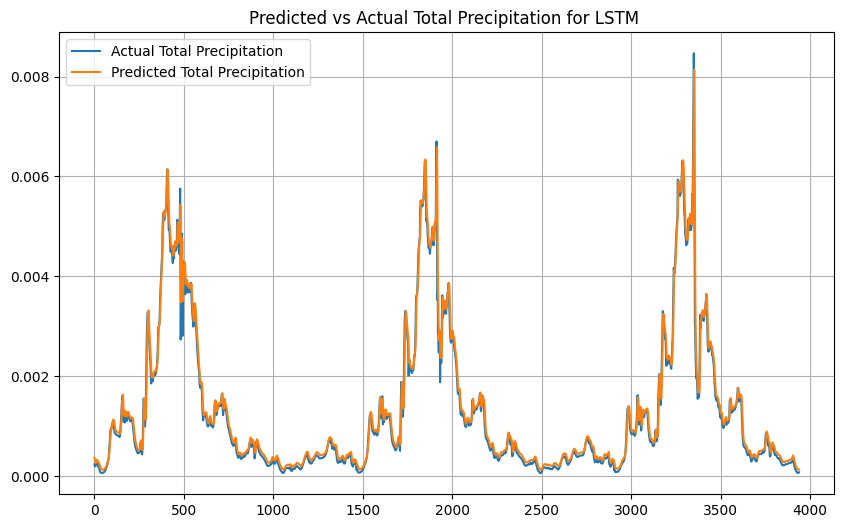

In [ ]:

predictions = model4.predict(X2_test)
import matplotlib.pyplot as plt
# Plot the predicted and actual values
plt.figure(figsize=(10, 6))
plt.plot(y2_test[:,1], label='Actual Total Precipitation')
plt.plot(predictions[:,1], label='Predicted Total Precipitation')
plt.title('Predicted vs Actual Total Precipitation for LSTM ')
plt.legend()
plt.grid()
plt.savefig('LSTM 120.png')
plt.legend()
plt.show()

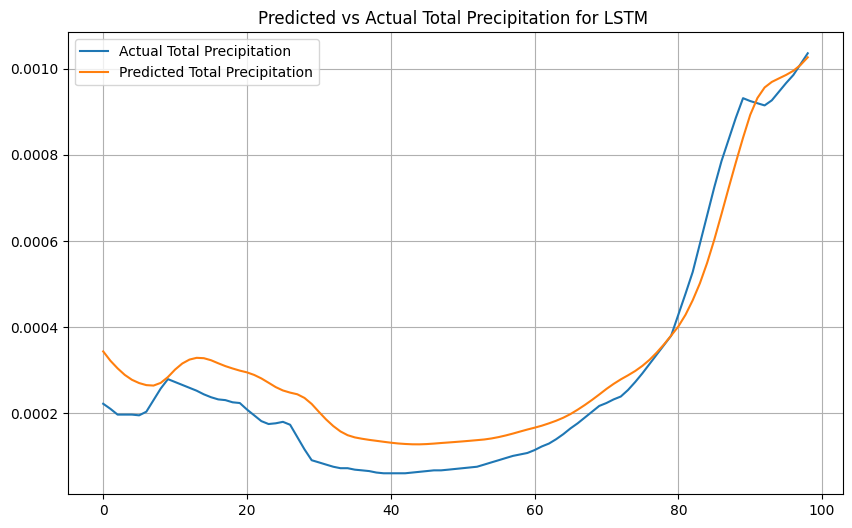

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y2_test[:,1][1:100], label='Actual Total Precipitation')
plt.plot(predictions[:,1][1:100], label='Predicted Total Precipitation')
plt.title('Predicted vs Actual Total Precipitation for LSTM ')
plt.legend()
plt.savefig('LSTM 120,100.png')
plt.legend()
plt.grid()
plt.show()

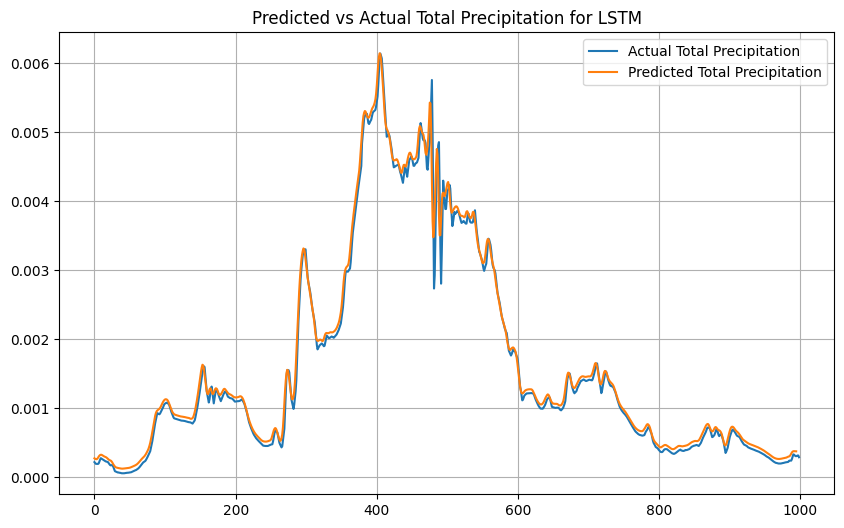

In [ ]:
# Plot the predicted and actual values
plt.figure(figsize=(10, 6))
plt.plot(y2_test[:,1][1:1000], label='Actual Total Precipitation')
plt.plot(predictions[:,1][5:1000], label='Predicted Total Precipitation')
plt.title('Predicted vs Actual Total Precipitation for LSTM')
plt.grid()
plt.legend()
plt.savefig('LSTM 120 1000.png')
plt.legend()
plt.show()#

In [ ]:
  #LSTM
from sklearn.metrics import mean_squared_error as mse
mse(y2_test[:,1], predictions[:,1])


3.548210228283872e-08

In [ ]:
rmse_lstm=np.sqrt(mse(y2_test[:,1], predictions[:,1]))
print(rmse_lstm)

0.0001883669352164512


In [ ]:
from sklearn.metrics import r2_score

r2_lstm = r2_score(y2_test[:,1], predictions[:,1]).round(2)*100
print(r2_lstm)

98.0


In [ ]:
from sklearn.metrics import mean_absolute_error

mae_lstm = mean_absolute_error(y2_test[:,1], predictions[:,1])
mae_lstm

0.00010990181609347768

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from keras.layers import LSTM, Dense,GRU
model5 = Sequential()
model5.add(LSTM(units=50, return_sequences=True, input_shape=(6,2)))
model5.add(GRU(units=50, return_sequences=True))
model5.add(LSTM(units=50, return_sequences=False))
model5.add(Dense(units=2))
#model5.compile(optimizer='adam', loss='mean_squared_error')
cp5 = ModelCheckpoint('model5/', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
# Train the model
model5.fit(X2_train, y2_train, epochs=120, batch_size=32, validation_data=(X2_test, y2_test))

model5.summary()

Epoch 1/120
431/431 [==============================] - 15s 18ms/step - loss: 1.0233e-06 - root_mean_squared_error: 0.0010 - val_loss: 1.2952e-06 - val_root_mean_squared_error: 0.0011
Epoch 2/120
431/431 [==============================] - 8s 19ms/step - loss: 8.3145e-07 - root_mean_squared_error: 9.1184e-04 - val_loss: 9.1914e-07 - val_root_mean_squared_error: 9.5872e-04
Epoch 3/120
431/431 [==============================] - 8s 19ms/step - loss: 5.1041e-07 - root_mean_squared_error: 7.1443e-04 - val_loss: 4.4723e-07 - val_root_mean_squared_error: 6.6875e-04
Epoch 4/120
431/431 [==============================] - 7s 16ms/step - loss: 1.6280e-07 - root_mean_squared_error: 4.0348e-04 - val_loss: 1.5105e-07 - val_root_mean_squared_error: 3.8865e-04
Epoch 5/120
431/431 [==============================] - 8s 19ms/step - loss: 5.7729e-08 - root_mean_squared_error: 2.4027e-04 - val_loss: 1.0515e-07 - val_root_mean_squared_error: 3.2427e-04
Epoch 6/120
431/431 [==============================] - 7s

In [ ]:
predictions = model5.predict(X2_test)
import matplotlib.pyplot as plt


124/124 [==============================] - 2s 5ms/step


In [ ]:
predictions

array([[-2.0678017e-05,  3.2825535e-04],
       [-2.1649255e-05,  2.9638162e-04],
       [-2.2451219e-05,  2.6915269e-04],
       ...,
       [-2.9595845e-05,  5.1838160e-05],
       [-2.9589399e-05,  5.1001552e-05],
       [-2.9520117e-05,  5.1292074e-05]], dtype=float32)

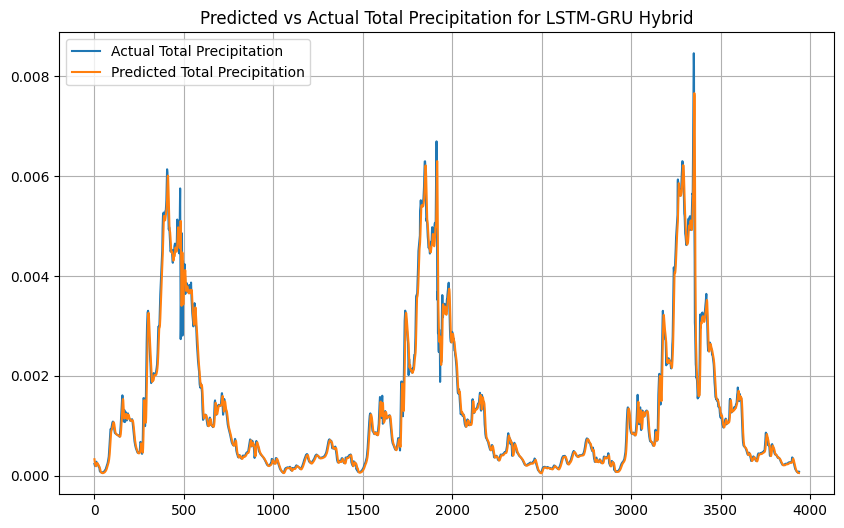

In [ ]:
# Plot the predicted and actual values
plt.figure(figsize=(10, 6))
plt.plot(y2_test[:,1], label='Actual Total Precipitation')
plt.plot(predictions[:,1], label='Predicted Total Precipitation')
plt.title('Predicted vs Actual Total Precipitation for LSTM-GRU Hybrid')
plt.legend()
plt.grid()

plt.savefig('LSTM GRU 120.png')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
mse(y2_test[:,1], predictions[:,1])


5.998755033259241e-08

In [ ]:
rmse_lstmgru=np.sqrt(mse(y2_test[:,1], predictions[:,1]))
print(rmse_lstmgru)

0.00024492356018274847


In [ ]:
from sklearn.metrics import r2_score

r2_lstmgru = r2_score(y2_test[:,1], predictions[:,1]).round(2)*100
print(r2_lstmgru)

97.0


In [ ]:
from sklearn.metrics import mean_absolute_error

mae_lstmgru = mean_absolute_error(y2_test[:,1], predictions[:,1])
mae_lstmgru

0.00011163810463716733

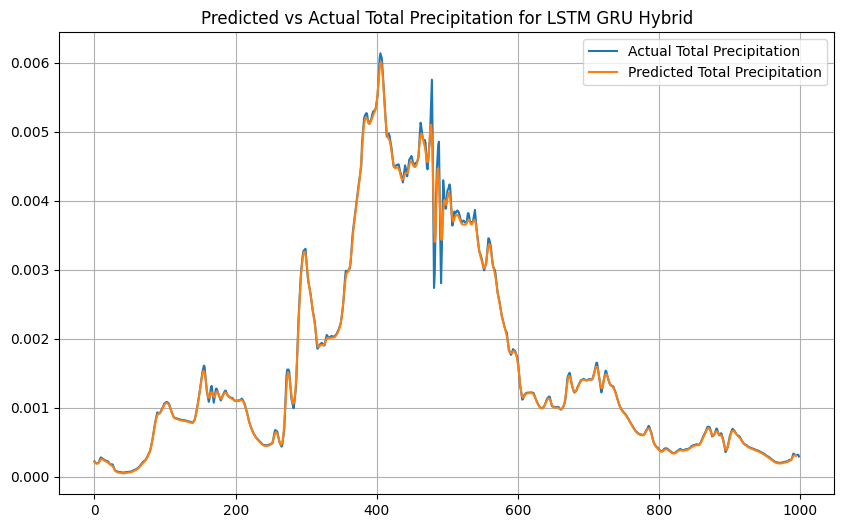

In [ ]:
# Plot the predicted and actual values
plt.figure(figsize=(10, 6))
plt.plot(y2_test[:,1][1:1000], label='Actual Total Precipitation')
plt.plot(predictions[:,1][5:1000], label='Predicted Total Precipitation')
plt.title('Predicted vs Actual Total Precipitation for LSTM GRU Hybrid')
plt.legend()
plt.grid()
plt.savefig('LSTM GRU 120 1000.png')
plt.legend()
plt.show()

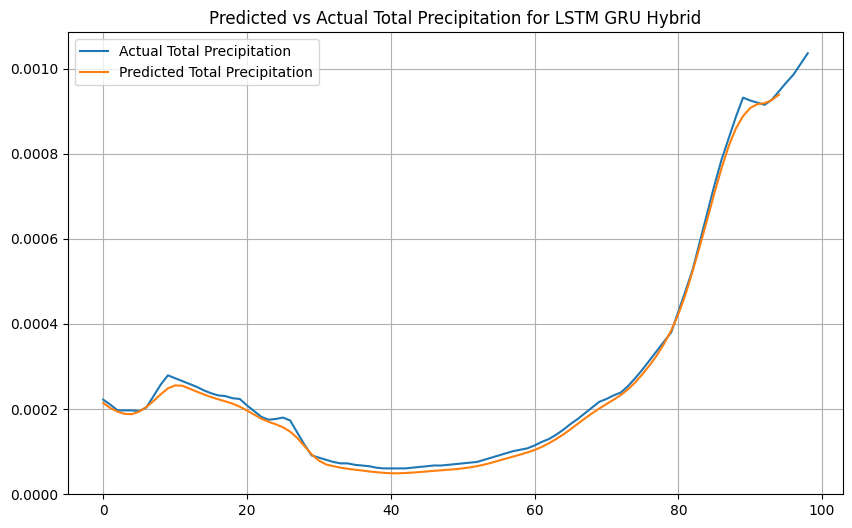

In [ ]:
# Plot the predicted and actual values
plt.figure(figsize=(10, 6))
plt.plot(y2_test[:,1][1:100], label='Actual Total Precipitation')
plt.plot(predictions[:,1][5:100], label='Predicted Total Precipitation')
plt.title('Predicted vs Actual Total Precipitation for LSTM GRU Hybrid')
plt.legend()
plt.grid()
plt.savefig('LSTM GRU 120 100.png')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from keras.layers import GRU, Dense

# Build the model
model6 = Sequential()
model6.add(GRU(units=40, return_sequences=True, input_shape=(6,2)))
model6.add(GRU(units=40, return_sequences=False))
model6.add(Dense(units=2))
cp4 = ModelCheckpoint('model6/', save_best_only=True)
model6.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])
model6.summary()

model6.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=120, callbacks=[cp4])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 6, 40)             5280      
                                                                 
 gru_3 (GRU)                 (None, 40)                9840      
                                                                 
 dense_2 (Dense)             (None, 2)                 82        
                                                                 
Total params: 15,202
Trainable params: 15,202
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
430/431 [============================>.] - ETA: 0s - loss: 2.0757e-06 - root_mean_squared_error: 0.0014

431/431 [==============================] - 19s 34ms/step - loss: 2.0719e-06 - root_mean_squared_error: 0.0014 - val_loss: 1.0026e-07 - val_root_mean_squared_error: 3.1663e-04
Epoch 2/120
431/431 [==============================] - ETA: 0s - loss: 8.5039e-08 - root_mean_squared_error: 2.9161e-04

431/431 [==============================] - 14s 33ms/step - loss: 8.5039e-08 - root_mean_squared_error: 2.9161e-04 - val_loss: 2.9449e-08 - val_root_mean_squared_error: 1.7161e-04
Epoch 3/120
431/431 [==============================] - 6s 14ms/step - loss: 6.7085e-08 - root_mean_squared_error: 2.5901e-04 - val_loss: 6.7627e-08 - val_root_mean_squared_error: 2.6005e-04
Epoch 4/120
431/431 [==============================] - 5s 11ms/step - loss: 7.6482e-08 - root_mean_squared_error: 2.7655e-04 - val_loss: 7.6980e-08 - val_root_mean_squared_error: 2.7745e-04
Epoch 5/120
431/431 [==============================] - 6s 14ms/step - loss: 6.6216e-08 - root_mean_squared_error: 2.5732e-04 - val_loss: 4.8065e-08 - val_root_mean_squared_error: 2.1924e-04
Epoch 6/120
431/431 [==============================] - 5s 11ms/step - loss: 8.0081e-08 - root_mean_squared_error: 2.8299e-04 - val_loss: 5.4841e-08 - val_root_mean_squared_error: 2.3418e-04
Epoch 7/120
431/431 [==============================] - 5s 11m

431/431 [==============================] - 14s 32ms/step - loss: 5.6164e-08 - root_mean_squared_error: 2.3699e-04 - val_loss: 2.2328e-08 - val_root_mean_squared_error: 1.4943e-04
Epoch 11/120
431/431 [==============================] - 6s 14ms/step - loss: 6.1441e-08 - root_mean_squared_error: 2.4787e-04 - val_loss: 3.0683e-07 - val_root_mean_squared_error: 5.5392e-04
Epoch 12/120
431/431 [==============================] - 5s 10ms/step - loss: 5.7494e-08 - root_mean_squared_error: 2.3978e-04 - val_loss: 4.3265e-08 - val_root_mean_squared_error: 2.0800e-04
Epoch 13/120
430/431 [============================>.] - ETA: 0s - loss: 5.6592e-08 - root_mean_squared_error: 2.3789e-04

431/431 [==============================] - 14s 33ms/step - loss: 5.6500e-08 - root_mean_squared_error: 2.3770e-04 - val_loss: 1.1802e-08 - val_root_mean_squared_error: 1.0864e-04
Epoch 14/120
431/431 [==============================] - 6s 14ms/step - loss: 4.9313e-08 - root_mean_squared_error: 2.2207e-04 - val_loss: 2.7088e-08 - val_root_mean_squared_error: 1.6458e-04
Epoch 15/120
431/431 [==============================] - 5s 12ms/step - loss: 5.0628e-08 - root_mean_squared_error: 2.2501e-04 - val_loss: 1.2161e-08 - val_root_mean_squared_error: 1.1027e-04
Epoch 16/120
431/431 [==============================] - 5s 13ms/step - loss: 4.2973e-08 - root_mean_squared_error: 2.0730e-04 - val_loss: 2.5694e-08 - val_root_mean_squared_error: 1.6029e-04
Epoch 17/120
431/431 [==============================] - 5s 12ms/step - loss: 3.6982e-08 - root_mean_squared_error: 1.9231e-04 - val_loss: 6.9073e-08 - val_root_mean_squared_error: 2.6282e-04
Epoch 18/120
431/431 [==============================] - 5

431/431 [==============================] - 14s 33ms/step - loss: 3.0697e-08 - root_mean_squared_error: 1.7521e-04 - val_loss: 7.5586e-09 - val_root_mean_squared_error: 8.6940e-05
Epoch 26/120
431/431 [==============================] - 5s 13ms/step - loss: 2.9450e-08 - root_mean_squared_error: 1.7161e-04 - val_loss: 7.7758e-08 - val_root_mean_squared_error: 2.7885e-04
Epoch 27/120
431/431 [==============================] - 4s 10ms/step - loss: 2.6325e-08 - root_mean_squared_error: 1.6225e-04 - val_loss: 8.4204e-08 - val_root_mean_squared_error: 2.9018e-04
Epoch 28/120
431/431 [==============================] - 5s 11ms/step - loss: 2.6641e-08 - root_mean_squared_error: 1.6322e-04 - val_loss: 1.0474e-08 - val_root_mean_squared_error: 1.0234e-04
Epoch 29/120
431/431 [==============================] - 6s 14ms/step - loss: 2.7209e-08 - root_mean_squared_error: 1.6495e-04 - val_loss: 8.4444e-09 - val_root_mean_squared_error: 9.1893e-05
Epoch 30/120
431/431 [==============================] - 5

431/431 [==============================] - 15s 35ms/step - loss: 1.8572e-08 - root_mean_squared_error: 1.3628e-04 - val_loss: 7.2574e-09 - val_root_mean_squared_error: 8.5190e-05
Epoch 40/120
429/431 [============================>.] - ETA: 0s - loss: 1.9818e-08 - root_mean_squared_error: 1.4078e-04

431/431 [==============================] - 13s 31ms/step - loss: 1.9809e-08 - root_mean_squared_error: 1.4075e-04 - val_loss: 6.5321e-09 - val_root_mean_squared_error: 8.0822e-05
Epoch 41/120
431/431 [==============================] - 5s 11ms/step - loss: 1.9849e-08 - root_mean_squared_error: 1.4089e-04 - val_loss: 7.4890e-09 - val_root_mean_squared_error: 8.6539e-05
Epoch 42/120
431/431 [==============================] - 6s 14ms/step - loss: 1.7338e-08 - root_mean_squared_error: 1.3167e-04 - val_loss: 2.4610e-08 - val_root_mean_squared_error: 1.5688e-04
Epoch 43/120
431/431 [==============================] - 4s 10ms/step - loss: 2.2028e-08 - root_mean_squared_error: 1.4842e-04 - val_loss: 7.9175e-09 - val_root_mean_squared_error: 8.8980e-05
Epoch 44/120
431/431 [==============================] - 5s 11ms/step - loss: 1.8263e-08 - root_mean_squared_error: 1.3514e-04 - val_loss: 9.0074e-09 - val_root_mean_squared_error: 9.4907e-05
Epoch 45/120
431/431 [==============================] - 6

431/431 [==============================] - 15s 34ms/step - loss: 1.6176e-08 - root_mean_squared_error: 1.2719e-04 - val_loss: 5.0857e-09 - val_root_mean_squared_error: 7.1314e-05
Epoch 53/120
431/431 [==============================] - 6s 14ms/step - loss: 1.7056e-08 - root_mean_squared_error: 1.3060e-04 - val_loss: 1.6754e-08 - val_root_mean_squared_error: 1.2944e-04
Epoch 54/120
431/431 [==============================] - 5s 12ms/step - loss: 1.6844e-08 - root_mean_squared_error: 1.2978e-04 - val_loss: 1.0572e-08 - val_root_mean_squared_error: 1.0282e-04
Epoch 55/120
431/431 [==============================] - 6s 14ms/step - loss: 1.4129e-08 - root_mean_squared_error: 1.1887e-04 - val_loss: 9.8874e-09 - val_root_mean_squared_error: 9.9435e-05
Epoch 56/120
431/431 [==============================] - 5s 11ms/step - loss: 1.6758e-08 - root_mean_squared_error: 1.2945e-04 - val_loss: 1.6270e-08 - val_root_mean_squared_error: 1.2756e-04
Epoch 57/120
431/431 [==============================] - 6

431/431 [==============================] - 13s 31ms/step - loss: 1.5271e-08 - root_mean_squared_error: 1.2358e-04 - val_loss: 4.5412e-09 - val_root_mean_squared_error: 6.7389e-05
Epoch 59/120
431/431 [==============================] - 5s 12ms/step - loss: 1.4369e-08 - root_mean_squared_error: 1.1987e-04 - val_loss: 4.8394e-09 - val_root_mean_squared_error: 6.9566e-05
Epoch 60/120
431/431 [==============================] - 5s 11ms/step - loss: 1.4532e-08 - root_mean_squared_error: 1.2055e-04 - val_loss: 8.3106e-09 - val_root_mean_squared_error: 9.1162e-05
Epoch 61/120
431/431 [==============================] - 6s 14ms/step - loss: 1.3659e-08 - root_mean_squared_error: 1.1687e-04 - val_loss: 1.6755e-08 - val_root_mean_squared_error: 1.2944e-04
Epoch 62/120
431/431 [==============================] - 5s 12ms/step - loss: 1.4464e-08 - root_mean_squared_error: 1.2027e-04 - val_loss: 1.2645e-08 - val_root_mean_squared_error: 1.1245e-04
Epoch 63/120
431/431 [==============================] - 6

431/431 [==============================] - 15s 36ms/step - loss: 1.2483e-08 - root_mean_squared_error: 1.1173e-04 - val_loss: 4.2847e-09 - val_root_mean_squared_error: 6.5458e-05
Epoch 82/120
431/431 [==============================] - 5s 13ms/step - loss: 1.0940e-08 - root_mean_squared_error: 1.0460e-04 - val_loss: 1.4996e-08 - val_root_mean_squared_error: 1.2246e-04
Epoch 83/120
431/431 [==============================] - 5s 12ms/step - loss: 1.1761e-08 - root_mean_squared_error: 1.0845e-04 - val_loss: 7.8288e-09 - val_root_mean_squared_error: 8.8480e-05
Epoch 84/120
427/431 [============================>.] - ETA: 0s - loss: 1.1674e-08 - root_mean_squared_error: 1.0805e-04

431/431 [==============================] - 15s 34ms/step - loss: 1.1610e-08 - root_mean_squared_error: 1.0775e-04 - val_loss: 3.9753e-09 - val_root_mean_squared_error: 6.3050e-05
Epoch 85/120
429/431 [============================>.] - ETA: 0s - loss: 1.2590e-08 - root_mean_squared_error: 1.1220e-04

431/431 [==============================] - 15s 34ms/step - loss: 1.2550e-08 - root_mean_squared_error: 1.1203e-04 - val_loss: 3.8678e-09 - val_root_mean_squared_error: 6.2192e-05
Epoch 86/120
431/431 [==============================] - 5s 11ms/step - loss: 1.0361e-08 - root_mean_squared_error: 1.0179e-04 - val_loss: 2.7891e-08 - val_root_mean_squared_error: 1.6701e-04
Epoch 87/120
431/431 [==============================] - 5s 12ms/step - loss: 1.1013e-08 - root_mean_squared_error: 1.0494e-04 - val_loss: 3.2774e-08 - val_root_mean_squared_error: 1.8104e-04
Epoch 88/120
431/431 [==============================] - 6s 13ms/step - loss: 1.0203e-08 - root_mean_squared_error: 1.0101e-04 - val_loss: 7.6959e-09 - val_root_mean_squared_error: 8.7726e-05
Epoch 89/120
431/431 [==============================] - 5s 12ms/step - loss: 1.0700e-08 - root_mean_squared_error: 1.0344e-04 - val_loss: 4.7530e-09 - val_root_mean_squared_error: 6.8942e-05
Epoch 90/120
431/431 [==============================] - 6

431/431 [==============================] - 15s 34ms/step - loss: 9.0963e-09 - root_mean_squared_error: 9.5375e-05 - val_loss: 3.3272e-09 - val_root_mean_squared_error: 5.7682e-05
Epoch 104/120
431/431 [==============================] - 5s 12ms/step - loss: 9.8560e-09 - root_mean_squared_error: 9.9277e-05 - val_loss: 3.5097e-09 - val_root_mean_squared_error: 5.9243e-05
Epoch 105/120
431/431 [==============================] - 6s 14ms/step - loss: 9.7186e-09 - root_mean_squared_error: 9.8583e-05 - val_loss: 1.3934e-08 - val_root_mean_squared_error: 1.1804e-04
Epoch 106/120
431/431 [==============================] - 5s 11ms/step - loss: 9.3952e-09 - root_mean_squared_error: 9.6929e-05 - val_loss: 3.5758e-08 - val_root_mean_squared_error: 1.8910e-04
Epoch 107/120
431/431 [==============================] - 5s 12ms/step - loss: 1.1049e-08 - root_mean_squared_error: 1.0511e-04 - val_loss: 6.9793e-09 - val_root_mean_squared_error: 8.3542e-05
Epoch 108/120
431/431 [==============================

In [ ]:
predictions = model6.predict(X2_test)
import matplotlib.pyplot as plt


124/124 [==============================] - 1s 3ms/step


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
mse(y2_test[:,1], predictions[:,1])

1.7756512012583996e-08

In [ ]:

rmse_gru=np.sqrt(mse(y2_test[:,1], predictions[:,1]))
print(rmse_gru)

0.00013325356285136993


In [ ]:
from sklearn.metrics import r2_score

r2_gru = r2_score(y2_test[:,1], predictions[:,1]).round(2)*100
print(r2_gru)

99.0


In [ ]:
from sklearn.metrics import mean_absolute_error

mae_gru = mean_absolute_error(y2_test[:,1], predictions[:,1])
mae_gru

8.652860554741581e-05

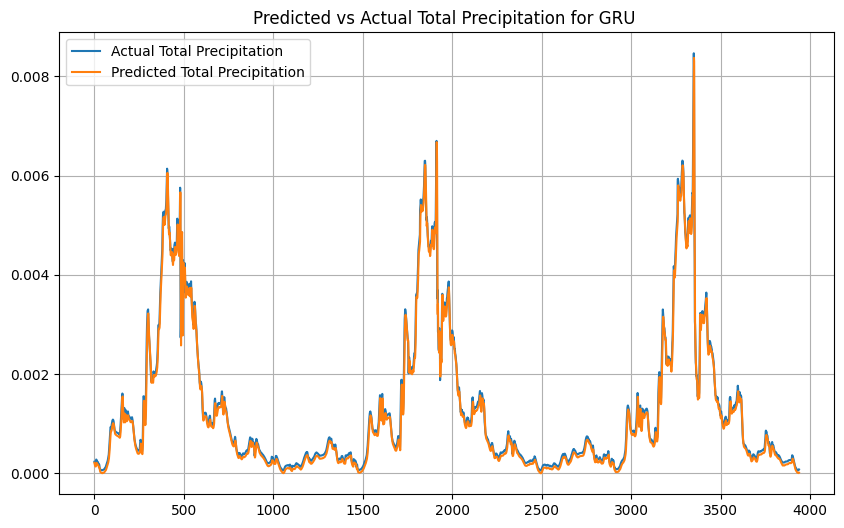

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y2_test[:,1], label='Actual Total Precipitation')
plt.plot(predictions[:,1], label='Predicted Total Precipitation')
plt.title('Predicted vs Actual Total Precipitation for GRU ')
plt.legend()
plt.grid()
plt.savefig('gru1.png')
plt.legend()
plt.show()

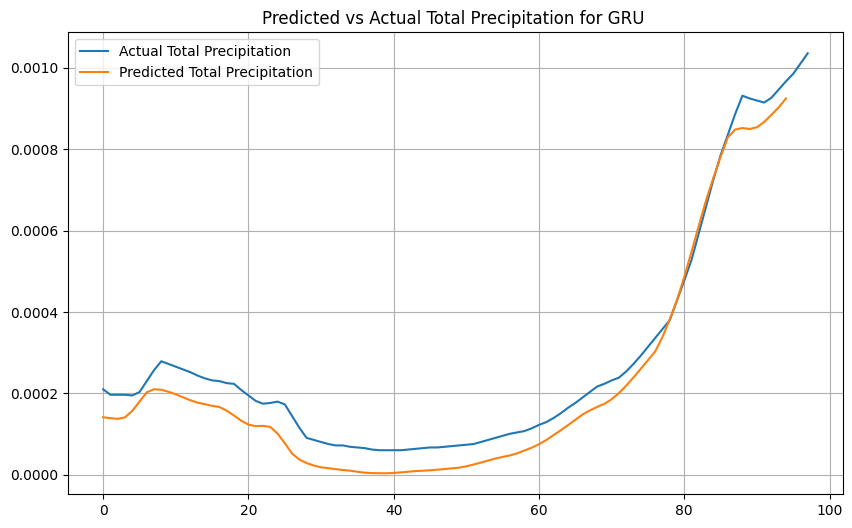

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y2_test[:,1][2:100], label='Actual Total Precipitation')
plt.plot(predictions[:,1][5:100], label='Predicted Total Precipitation')
plt.title('Predicted vs Actual Total Precipitation for GRU ')
plt.legend()
plt.grid()

plt.savefig('gru2.png')
plt.legend()
plt.show()

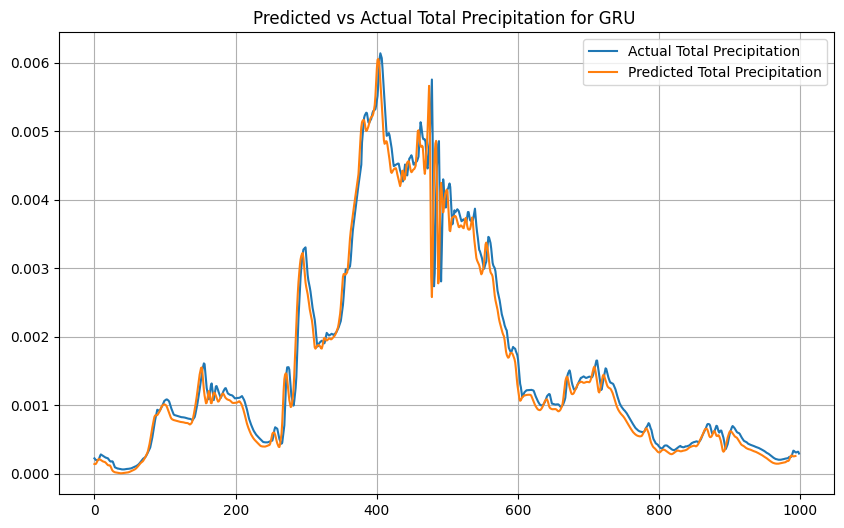

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y2_test[:,1][1:1000], label='Actual Total Precipitation')
plt.plot(predictions[:,1][6:1000], label='Predicted Total Precipitation')
plt.title('Predicted vs Actual Total Precipitation for GRU ')
plt.legend()
plt.grid()

plt.savefig('gru3.png')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from keras.layers import SimpleRNN, Dense

# Build the model
model7= Sequential()
model7.add(SimpleRNN(units=50, return_sequences=False, input_shape=(6,2)))
model7.add(Dense(units=2))
cp7 = ModelCheckpoint('model7/', save_best_only=True)
model7.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])
model7.summary()

model7.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=120, callbacks=[cp7])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 50)                2650      
                                                                 
 dense_3 (Dense)             (None, 2)                 102       
                                                                 
Total params: 2,752
Trainable params: 2,752
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
426/431 [============================>.] - ETA: 0s - loss: 1.6398e-06 - root_mean_squared_error: 0.0013

431/431 [==============================] - 10s 17ms/step - loss: 1.6217e-06 - root_mean_squared_error: 0.0013 - val_loss: 1.3160e-08 - val_root_mean_squared_error: 1.1472e-04
Epoch 2/120
431/431 [==============================] - ETA: 0s - loss: 9.3772e-09 - root_mean_squared_error: 9.6836e-05

431/431 [==============================] - 3s 8ms/step - loss: 9.3772e-09 - root_mean_squared_error: 9.6836e-05 - val_loss: 5.9387e-09 - val_root_mean_squared_error: 7.7063e-05
Epoch 3/120
423/431 [============================>.] - ETA: 0s - loss: 5.8704e-09 - root_mean_squared_error: 7.6618e-05

431/431 [==============================] - 4s 10ms/step - loss: 5.8756e-09 - root_mean_squared_error: 7.6653e-05 - val_loss: 4.8405e-09 - val_root_mean_squared_error: 6.9574e-05
Epoch 4/120
431/431 [==============================] - 2s 4ms/step - loss: 7.4839e-09 - root_mean_squared_error: 8.6510e-05 - val_loss: 1.6393e-08 - val_root_mean_squared_error: 1.2803e-04
Epoch 5/120
416/431 [===========================>..] - ETA: 0s - loss: 1.1023e-08 - root_mean_squared_error: 1.0499e-04

431/431 [==============================] - 3s 8ms/step - loss: 1.0764e-08 - root_mean_squared_error: 1.0375e-04 - val_loss: 4.3097e-09 - val_root_mean_squared_error: 6.5648e-05
Epoch 6/120
431/431 [==============================] - 2s 4ms/step - loss: 1.1744e-08 - root_mean_squared_error: 1.0837e-04 - val_loss: 1.1254e-08 - val_root_mean_squared_error: 1.0608e-04
Epoch 7/120
431/431 [==============================] - 2s 5ms/step - loss: 1.1835e-08 - root_mean_squared_error: 1.0879e-04 - val_loss: 1.2467e-08 - val_root_mean_squared_error: 1.1165e-04
Epoch 8/120
428/431 [============================>.] - ETA: 0s - loss: 1.4536e-08 - root_mean_squared_error: 1.2057e-04

431/431 [==============================] - 6s 13ms/step - loss: 1.4485e-08 - root_mean_squared_error: 1.2036e-04 - val_loss: 3.8587e-09 - val_root_mean_squared_error: 6.2118e-05
Epoch 9/120
431/431 [==============================] - 2s 4ms/step - loss: 1.2810e-08 - root_mean_squared_error: 1.1318e-04 - val_loss: 7.5573e-09 - val_root_mean_squared_error: 8.6932e-05
Epoch 10/120
431/431 [==============================] - 2s 4ms/step - loss: 1.4315e-08 - root_mean_squared_error: 1.1965e-04 - val_loss: 1.7816e-08 - val_root_mean_squared_error: 1.3348e-04
Epoch 11/120
431/431 [==============================] - 2s 4ms/step - loss: 1.2139e-08 - root_mean_squared_error: 1.1018e-04 - val_loss: 5.8292e-09 - val_root_mean_squared_error: 7.6349e-05
Epoch 12/120
431/431 [==============================] - 2s 6ms/step - loss: 1.4278e-08 - root_mean_squared_error: 1.1949e-04 - val_loss: 8.6831e-09 - val_root_mean_squared_error: 9.3183e-05
Epoch 13/120
431/431 [==============================] - 2s 5ms/

431/431 [==============================] - 3s 8ms/step - loss: 1.2177e-08 - root_mean_squared_error: 1.1035e-04 - val_loss: 2.9111e-09 - val_root_mean_squared_error: 5.3954e-05
Epoch 16/120
431/431 [==============================] - 2s 4ms/step - loss: 1.0418e-08 - root_mean_squared_error: 1.0207e-04 - val_loss: 5.4216e-09 - val_root_mean_squared_error: 7.3631e-05
Epoch 17/120
431/431 [==============================] - 2s 4ms/step - loss: 1.0503e-08 - root_mean_squared_error: 1.0248e-04 - val_loss: 9.1347e-09 - val_root_mean_squared_error: 9.5575e-05
Epoch 18/120
431/431 [==============================] - 2s 4ms/step - loss: 1.1828e-08 - root_mean_squared_error: 1.0876e-04 - val_loss: 5.6308e-09 - val_root_mean_squared_error: 7.5039e-05
Epoch 19/120
431/431 [==============================] - 2s 5ms/step - loss: 1.1354e-08 - root_mean_squared_error: 1.0655e-04 - val_loss: 6.4710e-09 - val_root_mean_squared_error: 8.0443e-05
Epoch 20/120
431/431 [==============================] - 2s 6ms/

431/431 [==============================] - 4s 10ms/step - loss: 9.8969e-09 - root_mean_squared_error: 9.9483e-05 - val_loss: 2.6425e-09 - val_root_mean_squared_error: 5.1405e-05
Epoch 23/120
431/431 [==============================] - 2s 4ms/step - loss: 1.0153e-08 - root_mean_squared_error: 1.0076e-04 - val_loss: 2.9723e-09 - val_root_mean_squared_error: 5.4519e-05
Epoch 24/120
431/431 [==============================] - 2s 5ms/step - loss: 1.1003e-08 - root_mean_squared_error: 1.0489e-04 - val_loss: 1.1177e-08 - val_root_mean_squared_error: 1.0572e-04
Epoch 25/120
431/431 [==============================] - 2s 6ms/step - loss: 8.8413e-09 - root_mean_squared_error: 9.4028e-05 - val_loss: 1.0053e-08 - val_root_mean_squared_error: 1.0026e-04
Epoch 26/120
431/431 [==============================] - 2s 4ms/step - loss: 9.0316e-09 - root_mean_squared_error: 9.5035e-05 - val_loss: 2.6920e-08 - val_root_mean_squared_error: 1.6407e-04
Epoch 27/120
431/431 [==============================] - 2s 4ms

431/431 [==============================] - 3s 8ms/step - loss: 6.5299e-09 - root_mean_squared_error: 8.0808e-05 - val_loss: 1.6750e-09 - val_root_mean_squared_error: 4.0927e-05
Epoch 45/120
431/431 [==============================] - 3s 7ms/step - loss: 7.3589e-09 - root_mean_squared_error: 8.5784e-05 - val_loss: 1.4632e-08 - val_root_mean_squared_error: 1.2096e-04
Epoch 46/120
431/431 [==============================] - 2s 5ms/step - loss: 5.6441e-09 - root_mean_squared_error: 7.5127e-05 - val_loss: 3.0437e-09 - val_root_mean_squared_error: 5.5170e-05
Epoch 47/120
431/431 [==============================] - 4s 10ms/step - loss: 6.7521e-09 - root_mean_squared_error: 8.2171e-05 - val_loss: 9.1892e-09 - val_root_mean_squared_error: 9.5860e-05
Epoch 48/120
431/431 [==============================] - 4s 10ms/step - loss: 7.0026e-09 - root_mean_squared_error: 8.3681e-05 - val_loss: 8.0163e-09 - val_root_mean_squared_error: 8.9534e-05
Epoch 49/120
431/431 [==============================] - 4s 9m

431/431 [==============================] - 6s 13ms/step - loss: 5.4292e-09 - root_mean_squared_error: 7.3683e-05 - val_loss: 1.4505e-09 - val_root_mean_squared_error: 3.8086e-05
Epoch 64/120
431/431 [==============================] - 2s 5ms/step - loss: 5.7157e-09 - root_mean_squared_error: 7.5602e-05 - val_loss: 1.8826e-09 - val_root_mean_squared_error: 4.3389e-05
Epoch 65/120
431/431 [==============================] - 3s 7ms/step - loss: 5.5160e-09 - root_mean_squared_error: 7.4270e-05 - val_loss: 1.7233e-09 - val_root_mean_squared_error: 4.1513e-05
Epoch 66/120
431/431 [==============================] - 2s 4ms/step - loss: 4.8386e-09 - root_mean_squared_error: 6.9560e-05 - val_loss: 5.0942e-09 - val_root_mean_squared_error: 7.1374e-05
Epoch 67/120
431/431 [==============================] - 2s 4ms/step - loss: 4.9827e-09 - root_mean_squared_error: 7.0588e-05 - val_loss: 4.2505e-09 - val_root_mean_squared_error: 6.5196e-05
Epoch 68/120
431/431 [==============================] - 2s 5ms

431/431 [==============================] - 5s 11ms/step - loss: 4.6722e-09 - root_mean_squared_error: 6.8354e-05 - val_loss: 1.1065e-09 - val_root_mean_squared_error: 3.3264e-05
Epoch 76/120
431/431 [==============================] - 2s 4ms/step - loss: 4.9147e-09 - root_mean_squared_error: 7.0105e-05 - val_loss: 2.3759e-09 - val_root_mean_squared_error: 4.8744e-05
Epoch 77/120
431/431 [==============================] - 2s 4ms/step - loss: 1.0970e-06 - root_mean_squared_error: 0.0010 - val_loss: 2.0696e-08 - val_root_mean_squared_error: 1.4386e-04
Epoch 78/120
431/431 [==============================] - 2s 4ms/step - loss: 8.0659e-09 - root_mean_squared_error: 8.9810e-05 - val_loss: 3.7361e-09 - val_root_mean_squared_error: 6.1124e-05
Epoch 79/120
431/431 [==============================] - 2s 4ms/step - loss: 3.0838e-09 - root_mean_squared_error: 5.5532e-05 - val_loss: 1.9366e-09 - val_root_mean_squared_error: 4.4006e-05
Epoch 80/120
431/431 [==============================] - 2s 4ms/ste

431/431 [==============================] - 5s 11ms/step - loss: 3.1640e-09 - root_mean_squared_error: 5.6249e-05 - val_loss: 8.7901e-10 - val_root_mean_squared_error: 2.9648e-05
Epoch 82/120
431/431 [==============================] - 2s 3ms/step - loss: 5.3667e-09 - root_mean_squared_error: 7.3258e-05 - val_loss: 3.0334e-09 - val_root_mean_squared_error: 5.5076e-05
Epoch 83/120
431/431 [==============================] - 2s 4ms/step - loss: 3.8837e-09 - root_mean_squared_error: 6.2319e-05 - val_loss: 6.6438e-09 - val_root_mean_squared_error: 8.1510e-05
Epoch 84/120
431/431 [==============================] - 2s 4ms/step - loss: 4.3088e-09 - root_mean_squared_error: 6.5642e-05 - val_loss: 5.2570e-09 - val_root_mean_squared_error: 7.2505e-05
Epoch 85/120
431/431 [==============================] - 2s 4ms/step - loss: 4.0581e-09 - root_mean_squared_error: 6.3703e-05 - val_loss: 4.6864e-09 - val_root_mean_squared_error: 6.8457e-05
Epoch 86/120
431/431 [==============================] - 2s 4ms

431/431 [==============================] - 5s 12ms/step - loss: 5.1635e-09 - root_mean_squared_error: 7.1858e-05 - val_loss: 7.9409e-10 - val_root_mean_squared_error: 2.8180e-05
Epoch 119/120
431/431 [==============================] - 3s 6ms/step - loss: 3.1598e-09 - root_mean_squared_error: 5.6212e-05 - val_loss: 1.4093e-09 - val_root_mean_squared_error: 3.7541e-05
Epoch 120/120
431/431 [==============================] - 2s 4ms/step - loss: 3.7628e-09 - root_mean_squared_error: 6.1341e-05 - val_loss: 2.7686e-09 - val_root_mean_squared_error: 5.2617e-05


In [ ]:
predictions = model7.predict(X2_test)
import matplotlib.pyplot as plt

124/124 [==============================] - 0s 2ms/step


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
mse(y2_test[:,1], predictions[:,1])

6.735014004339566e-09

In [ ]:
rmse_rnn=np.sqrt(mse(y2_test[:,1], predictions[:,1]))
print(rmse_rnn)

8.206713108388501e-05


In [ ]:
from sklearn.metrics import r2_score

r2_rnn = r2_score(y2_test[:,1], predictions[:,1]).round(2)*100
print(r2_rnn)

100.0


In [ ]:
from sklearn.metrics import mean_absolute_error

mae_rnn = mean_absolute_error(y2_test[:,1], predictions[:,1])
mae_rnn

4.333339834648687e-05

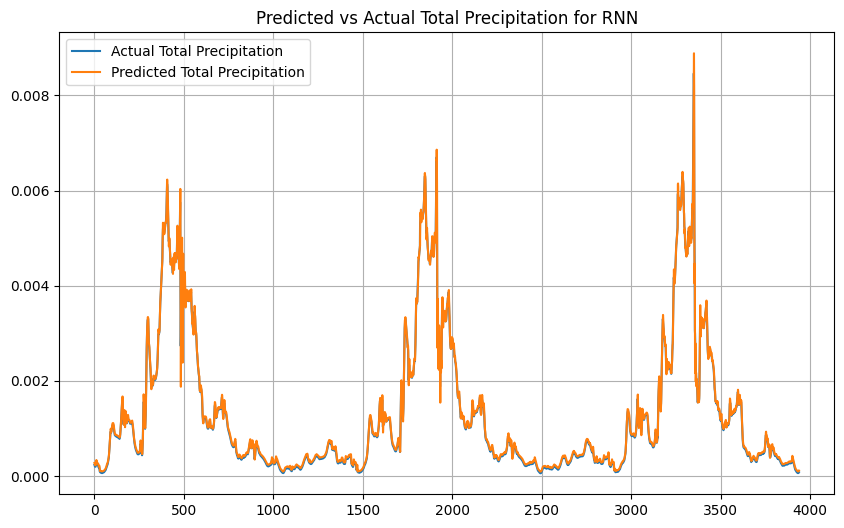

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y2_test[:,1], label='Actual Total Precipitation')
plt.plot(predictions[:,1], label='Predicted Total Precipitation')
plt.title('Predicted vs Actual Total Precipitation for RNN')
plt.legend()
plt.grid()
plt.savefig('rnn1.png')
plt.legend()
plt.show()

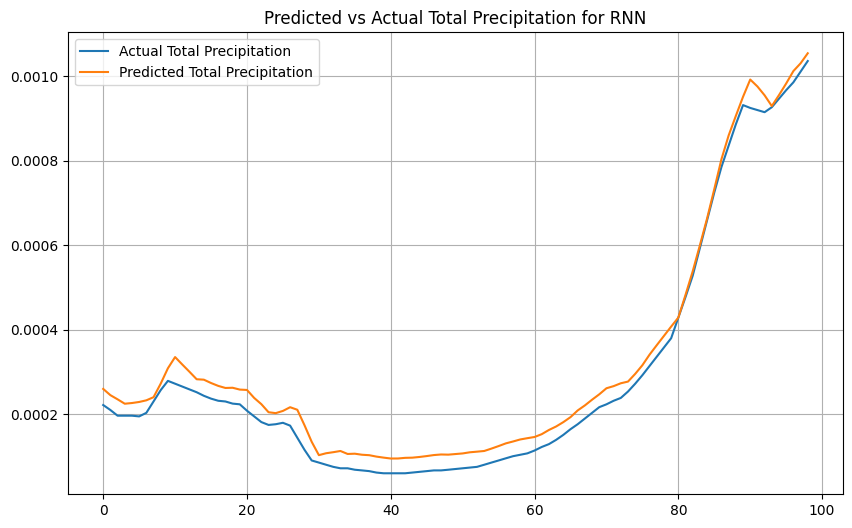

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y2_test[:,1][1:100], label='Actual Total Precipitation')
plt.plot(predictions[:,1][1:100], label='Predicted Total Precipitation')
plt.title('Predicted vs Actual Total Precipitation for RNN')
plt.legend()
plt.grid()
plt.savefig('rnn2.png')
plt.legend()
plt.show()

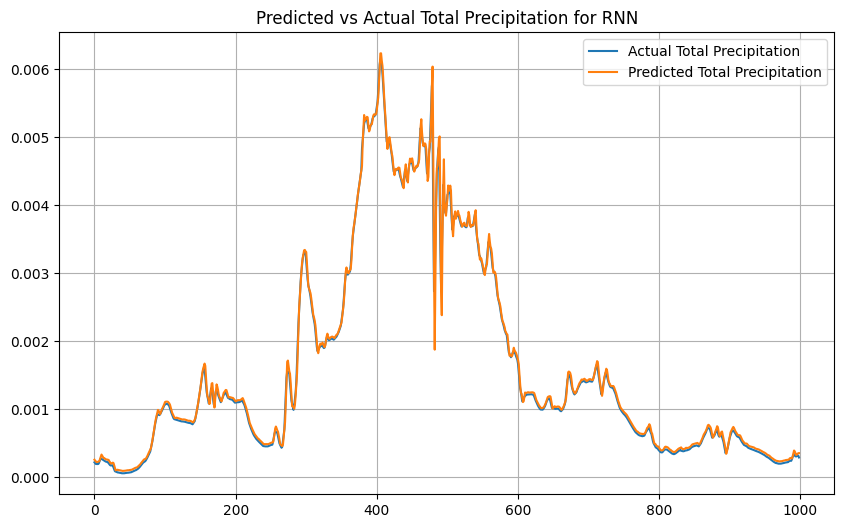

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y2_test[:,1][1:1000], label='Actual Total Precipitation')
plt.plot(predictions[:,1][1:1000], label='Predicted Total Precipitation')
plt.title('Predicted vs Actual Total Precipitation for RNN')
plt.legend()
plt.grid()
plt.savefig('rnn3.png')
plt.legend()
plt.show()

In [ ]:
#BiLSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from keras.layers import LSTM, Dense
from keras.layers import Bidirectional

# Build the model
model8 = Sequential()
model8.add(Bidirectional(LSTM(units=50, return_sequences=False, input_shape=(6,2))))
#model8.add(Bidirectional(LSTM(units=50, return_sequences=False)))
model8.add(Dense(units=2))
cp8 = ModelCheckpoint('model8/', save_best_only=True)
model8.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

model8.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=120, callbacks=[cp8])
model8.summary()


Epoch 1/120
431/431 [==============================] - ETA: 0s - loss: 6.6275e-07 - root_mean_squared_error: 8.1410e-04

431/431 [==============================] - 28s 48ms/step - loss: 6.6275e-07 - root_mean_squared_error: 8.1410e-04 - val_loss: 9.9533e-08 - val_root_mean_squared_error: 3.1549e-04
Epoch 2/120
431/431 [==============================] - 6s 13ms/step - loss: 4.9978e-08 - root_mean_squared_error: 2.2356e-04 - val_loss: 1.2950e-07 - val_root_mean_squared_error: 3.5986e-04
Epoch 3/120
431/431 [==============================] - 5s 10ms/step - loss: 4.5893e-08 - root_mean_squared_error: 2.1423e-04 - val_loss: 1.0023e-07 - val_root_mean_squared_error: 3.1659e-04
Epoch 4/120
429/431 [============================>.] - ETA: 0s - loss: 4.0215e-08 - root_mean_squared_error: 2.0054e-04

431/431 [==============================] - 22s 50ms/step - loss: 4.0229e-08 - root_mean_squared_error: 2.0057e-04 - val_loss: 4.0808e-08 - val_root_mean_squared_error: 2.0201e-04
Epoch 5/120
431/431 [==============================] - 5s 10ms/step - loss: 4.1498e-08 - root_mean_squared_error: 2.0371e-04 - val_loss: 4.5037e-08 - val_root_mean_squared_error: 2.1222e-04
Epoch 6/120
431/431 [==============================] - ETA: 0s - loss: 3.2137e-08 - root_mean_squared_error: 1.7927e-04

431/431 [==============================] - 22s 50ms/step - loss: 3.2137e-08 - root_mean_squared_error: 1.7927e-04 - val_loss: 1.3785e-08 - val_root_mean_squared_error: 1.1741e-04
Epoch 7/120
431/431 [==============================] - 6s 13ms/step - loss: 3.7084e-08 - root_mean_squared_error: 1.9257e-04 - val_loss: 5.5275e-08 - val_root_mean_squared_error: 2.3511e-04
Epoch 8/120
431/431 [==============================] - 6s 14ms/step - loss: 3.7714e-08 - root_mean_squared_error: 1.9420e-04 - val_loss: 5.6339e-08 - val_root_mean_squared_error: 2.3736e-04
Epoch 9/120
431/431 [==============================] - 5s 11ms/step - loss: 3.3760e-08 - root_mean_squared_error: 1.8374e-04 - val_loss: 2.3041e-08 - val_root_mean_squared_error: 1.5179e-04
Epoch 10/120
429/431 [============================>.] - ETA: 0s - loss: 3.0034e-08 - root_mean_squared_error: 1.7330e-04

431/431 [==============================] - 20s 47ms/step - loss: 2.9982e-08 - root_mean_squared_error: 1.7315e-04 - val_loss: 1.2883e-08 - val_root_mean_squared_error: 1.1350e-04
Epoch 11/120
431/431 [==============================] - 4s 10ms/step - loss: 3.2478e-08 - root_mean_squared_error: 1.8022e-04 - val_loss: 3.8407e-08 - val_root_mean_squared_error: 1.9598e-04
Epoch 12/120
431/431 [==============================] - 5s 13ms/step - loss: 2.7021e-08 - root_mean_squared_error: 1.6438e-04 - val_loss: 1.3146e-08 - val_root_mean_squared_error: 1.1466e-04
Epoch 13/120
431/431 [==============================] - 5s 11ms/step - loss: 2.9891e-08 - root_mean_squared_error: 1.7289e-04 - val_loss: 3.2060e-08 - val_root_mean_squared_error: 1.7905e-04
Epoch 14/120
431/431 [==============================] - 4s 10ms/step - loss: 2.5159e-08 - root_mean_squared_error: 1.5862e-04 - val_loss: 4.0255e-08 - val_root_mean_squared_error: 2.0064e-04
Epoch 15/120
431/431 [==============================] - 6

431/431 [==============================] - 22s 52ms/step - loss: 2.2630e-08 - root_mean_squared_error: 1.5043e-04 - val_loss: 1.0375e-08 - val_root_mean_squared_error: 1.0186e-04
Epoch 19/120
431/431 [==============================] - 5s 12ms/step - loss: 2.5959e-08 - root_mean_squared_error: 1.6112e-04 - val_loss: 1.4725e-08 - val_root_mean_squared_error: 1.2135e-04
Epoch 20/120
431/431 [==============================] - 5s 11ms/step - loss: 2.5737e-08 - root_mean_squared_error: 1.6043e-04 - val_loss: 1.5938e-08 - val_root_mean_squared_error: 1.2624e-04
Epoch 21/120
431/431 [==============================] - ETA: 0s - loss: 1.9008e-08 - root_mean_squared_error: 1.3787e-04

431/431 [==============================] - 22s 51ms/step - loss: 1.9008e-08 - root_mean_squared_error: 1.3787e-04 - val_loss: 8.7756e-09 - val_root_mean_squared_error: 9.3678e-05
Epoch 22/120
431/431 [==============================] - 5s 10ms/step - loss: 2.2302e-08 - root_mean_squared_error: 1.4934e-04 - val_loss: 1.1168e-08 - val_root_mean_squared_error: 1.0568e-04
Epoch 23/120
431/431 [==============================] - 4s 10ms/step - loss: 1.9906e-08 - root_mean_squared_error: 1.4109e-04 - val_loss: 1.0976e-08 - val_root_mean_squared_error: 1.0476e-04
Epoch 24/120
431/431 [==============================] - 6s 13ms/step - loss: 2.1578e-08 - root_mean_squared_error: 1.4690e-04 - val_loss: 1.9593e-08 - val_root_mean_squared_error: 1.3997e-04
Epoch 25/120
431/431 [==============================] - 5s 11ms/step - loss: 1.8924e-08 - root_mean_squared_error: 1.3756e-04 - val_loss: 2.1705e-08 - val_root_mean_squared_error: 1.4733e-04
Epoch 26/120
431/431 [==============================] - 6

431/431 [==============================] - 20s 47ms/step - loss: 1.7194e-08 - root_mean_squared_error: 1.3113e-04 - val_loss: 7.0387e-09 - val_root_mean_squared_error: 8.3897e-05
Epoch 31/120
431/431 [==============================] - 6s 13ms/step - loss: 1.9512e-08 - root_mean_squared_error: 1.3969e-04 - val_loss: 8.8905e-09 - val_root_mean_squared_error: 9.4289e-05
Epoch 32/120
431/431 [==============================] - 5s 11ms/step - loss: 1.8968e-08 - root_mean_squared_error: 1.3772e-04 - val_loss: 1.6316e-08 - val_root_mean_squared_error: 1.2774e-04
Epoch 33/120
431/431 [==============================] - 6s 13ms/step - loss: 1.6183e-08 - root_mean_squared_error: 1.2721e-04 - val_loss: 1.1452e-08 - val_root_mean_squared_error: 1.0701e-04
Epoch 34/120
431/431 [==============================] - 5s 11ms/step - loss: 1.7524e-08 - root_mean_squared_error: 1.3238e-04 - val_loss: 1.5505e-08 - val_root_mean_squared_error: 1.2452e-04
Epoch 35/120
431/431 [==============================] - 5

431/431 [==============================] - 21s 49ms/step - loss: 1.3767e-08 - root_mean_squared_error: 1.1733e-04 - val_loss: 6.9828e-09 - val_root_mean_squared_error: 8.3563e-05
Epoch 46/120
431/431 [==============================] - 5s 12ms/step - loss: 1.4680e-08 - root_mean_squared_error: 1.2116e-04 - val_loss: 1.3121e-08 - val_root_mean_squared_error: 1.1454e-04
Epoch 47/120
431/431 [==============================] - 4s 10ms/step - loss: 1.3831e-08 - root_mean_squared_error: 1.1761e-04 - val_loss: 8.7381e-09 - val_root_mean_squared_error: 9.3478e-05
Epoch 48/120
428/431 [============================>.] - ETA: 0s - loss: 1.3966e-08 - root_mean_squared_error: 1.1818e-04

431/431 [==============================] - 20s 47ms/step - loss: 1.3933e-08 - root_mean_squared_error: 1.1804e-04 - val_loss: 6.3378e-09 - val_root_mean_squared_error: 7.9610e-05
Epoch 49/120
431/431 [==============================] - 5s 11ms/step - loss: 1.4388e-08 - root_mean_squared_error: 1.1995e-04 - val_loss: 1.6044e-08 - val_root_mean_squared_error: 1.2667e-04
Epoch 50/120
431/431 [==============================] - 6s 13ms/step - loss: 1.3034e-08 - root_mean_squared_error: 1.1417e-04 - val_loss: 1.8675e-08 - val_root_mean_squared_error: 1.3666e-04
Epoch 51/120
431/431 [==============================] - 5s 11ms/step - loss: 1.1773e-08 - root_mean_squared_error: 1.0850e-04 - val_loss: 3.9707e-08 - val_root_mean_squared_error: 1.9927e-04
Epoch 52/120
431/431 [==============================] - 4s 10ms/step - loss: 1.3566e-08 - root_mean_squared_error: 1.1647e-04 - val_loss: 2.2092e-08 - val_root_mean_squared_error: 1.4863e-04
Epoch 53/120
427/431 [============================>.] - E

431/431 [==============================] - 23s 53ms/step - loss: 1.1311e-08 - root_mean_squared_error: 1.0636e-04 - val_loss: 5.8775e-09 - val_root_mean_squared_error: 7.6665e-05
Epoch 54/120
431/431 [==============================] - 5s 13ms/step - loss: 1.3552e-08 - root_mean_squared_error: 1.1641e-04 - val_loss: 1.2872e-08 - val_root_mean_squared_error: 1.1346e-04
Epoch 55/120
431/431 [==============================] - 5s 12ms/step - loss: 1.3503e-08 - root_mean_squared_error: 1.1620e-04 - val_loss: 9.0327e-09 - val_root_mean_squared_error: 9.5041e-05
Epoch 56/120
431/431 [==============================] - 4s 10ms/step - loss: 1.2682e-08 - root_mean_squared_error: 1.1261e-04 - val_loss: 1.2870e-08 - val_root_mean_squared_error: 1.1345e-04
Epoch 57/120
431/431 [==============================] - 6s 14ms/step - loss: 1.0788e-08 - root_mean_squared_error: 1.0386e-04 - val_loss: 8.9533e-09 - val_root_mean_squared_error: 9.4622e-05
Epoch 58/120
431/431 [==============================] - 5

431/431 [==============================] - 22s 51ms/step - loss: 1.2300e-08 - root_mean_squared_error: 1.1090e-04 - val_loss: 5.4612e-09 - val_root_mean_squared_error: 7.3900e-05
Epoch 61/120
431/431 [==============================] - 6s 14ms/step - loss: 1.2474e-08 - root_mean_squared_error: 1.1169e-04 - val_loss: 1.3585e-08 - val_root_mean_squared_error: 1.1655e-04
Epoch 62/120
429/431 [============================>.] - ETA: 0s - loss: 1.2689e-08 - root_mean_squared_error: 1.1264e-04

431/431 [==============================] - 20s 47ms/step - loss: 1.2748e-08 - root_mean_squared_error: 1.1291e-04 - val_loss: 4.7127e-09 - val_root_mean_squared_error: 6.8649e-05
Epoch 63/120
431/431 [==============================] - 6s 14ms/step - loss: 1.1300e-08 - root_mean_squared_error: 1.0630e-04 - val_loss: 1.2153e-08 - val_root_mean_squared_error: 1.1024e-04
Epoch 64/120
431/431 [==============================] - 4s 10ms/step - loss: 1.1130e-08 - root_mean_squared_error: 1.0550e-04 - val_loss: 1.5942e-08 - val_root_mean_squared_error: 1.2626e-04
Epoch 65/120
431/431 [==============================] - 4s 10ms/step - loss: 1.1132e-08 - root_mean_squared_error: 1.0551e-04 - val_loss: 1.4193e-08 - val_root_mean_squared_error: 1.1914e-04
Epoch 66/120
431/431 [==============================] - 6s 14ms/step - loss: 1.0699e-08 - root_mean_squared_error: 1.0344e-04 - val_loss: 1.6983e-08 - val_root_mean_squared_error: 1.3032e-04
Epoch 67/120
431/431 [==============================] - 5

431/431 [==============================] - 20s 48ms/step - loss: 9.6005e-09 - root_mean_squared_error: 9.7982e-05 - val_loss: 4.0357e-09 - val_root_mean_squared_error: 6.3527e-05
Epoch 89/120
431/431 [==============================] - 4s 10ms/step - loss: 9.7750e-09 - root_mean_squared_error: 9.8868e-05 - val_loss: 6.7626e-09 - val_root_mean_squared_error: 8.2235e-05
Epoch 90/120
431/431 [==============================] - 4s 10ms/step - loss: 9.5040e-09 - root_mean_squared_error: 9.7488e-05 - val_loss: 1.2081e-08 - val_root_mean_squared_error: 1.0991e-04
Epoch 91/120
431/431 [==============================] - 6s 13ms/step - loss: 9.0204e-09 - root_mean_squared_error: 9.4976e-05 - val_loss: 8.9481e-09 - val_root_mean_squared_error: 9.4594e-05
Epoch 92/120
431/431 [==============================] - 4s 10ms/step - loss: 9.1549e-09 - root_mean_squared_error: 9.5681e-05 - val_loss: 7.9476e-09 - val_root_mean_squared_error: 8.9150e-05
Epoch 93/120
431/431 [==============================] - 5

431/431 [==============================] - 23s 53ms/step - loss: 7.6081e-09 - root_mean_squared_error: 8.7224e-05 - val_loss: 3.9077e-09 - val_root_mean_squared_error: 6.2511e-05
Epoch 105/120
431/431 [==============================] - 5s 12ms/step - loss: 8.6952e-09 - root_mean_squared_error: 9.3248e-05 - val_loss: 7.2136e-09 - val_root_mean_squared_error: 8.4933e-05
Epoch 106/120
431/431 [==============================] - 5s 11ms/step - loss: 9.3350e-09 - root_mean_squared_error: 9.6618e-05 - val_loss: 9.6039e-09 - val_root_mean_squared_error: 9.8000e-05
Epoch 107/120
431/431 [==============================] - 4s 10ms/step - loss: 8.1295e-09 - root_mean_squared_error: 9.0164e-05 - val_loss: 4.1816e-09 - val_root_mean_squared_error: 6.4665e-05
Epoch 108/120
431/431 [==============================] - 6s 14ms/step - loss: 7.6405e-09 - root_mean_squared_error: 8.7410e-05 - val_loss: 1.6603e-08 - val_root_mean_squared_error: 1.2885e-04
Epoch 109/120
431/431 [==============================

In [ ]:
predictions = model8.predict(X2_test)
import matplotlib.pyplot as plt

124/124 [==============================] - 1s 3ms/step


In [ ]:
import time
time.time()

1683356878.4782867

In [ ]:
time.time()

1683356878.4926856

In [ ]:
time.time()

1683356878.5030735

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
mse(y2_test[:,1], predictions[:,1])

1.626948470096176e-08

In [ ]:
rmse_bilstm2=np.sqrt(mse(y2_test[:,1], predictions[:,1]))
print(rmse_bilstm2)

0.00012755189022888591


In [ ]:
from sklearn.metrics import r2_score

r2_bilstm2 = r2_score(y2_test[:,1], predictions[:,1]).round(2)*100
print(r2_bilstm2)

99.0


In [ ]:
from sklearn.metrics import mean_absolute_error

mae_bilstm2= mean_absolute_error(y2_test[:,1], predictions[:,1])
mae_bilstm2

7.298211222213946e-05

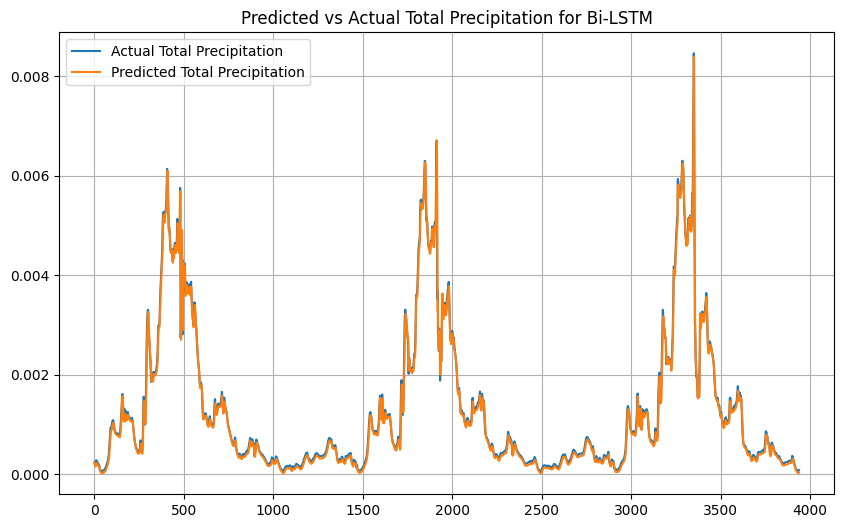

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y2_test[:,1], label='Actual Total Precipitation')
plt.plot(predictions[:,1], label='Predicted Total Precipitation')
plt.title('Predicted vs Actual Total Precipitation for Bi-LSTM')
plt.legend()
plt.grid()
plt.savefig('bilstm12.png')
plt.legend()
plt.show()

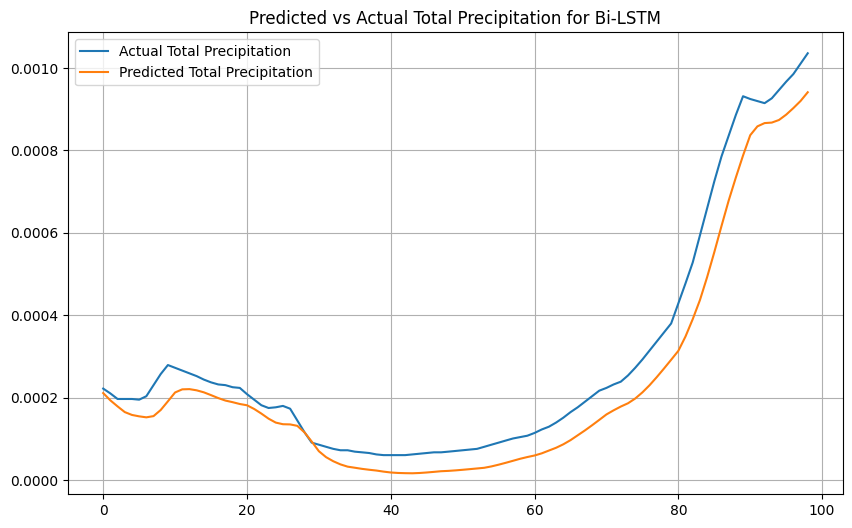

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y2_test[:,1][1:100], label='Actual Total Precipitation')
plt.plot(predictions[:,1][1:100], label='Predicted Total Precipitation')
plt.title('Predicted vs Actual Total Precipitation for Bi-LSTM')
plt.legend()
plt.grid()
plt.savefig('bilstm22.png')
plt.legend()
plt.show()

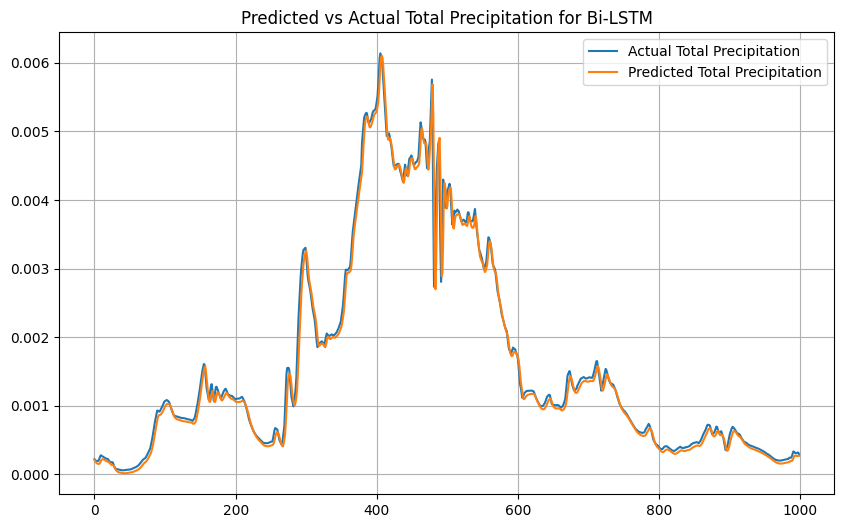

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(y2_test[:,1][1:1000], label='Actual Total Precipitation')
plt.plot(predictions[:,1][1:1000], label='Predicted Total Precipitation')
plt.title('Predicted vs Actual Total Precipitation for Bi-LSTM')
plt.legend()
plt.grid()
plt.savefig('bilstm32.png')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from keras.layers import LSTM, Dense
from keras.layers import Bidirectional

# Build the model
model8 = Sequential()
model8.add(Bidirectional(LSTM(units=8, return_sequences=False, input_shape=(6,2))))
#model8.add(Bidirectional(LSTM(units=50, return_sequences=False)))
model8.add(Dense(units=2))
cp8 = ModelCheckpoint('model8/', save_best_only=True)
model8.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

model8.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=120, callbacks=[cp8])
model8.summary()

Epoch 1/120
430/431 [============================>.] - ETA: 0s - loss: 2.5966e-07 - root_mean_squared_error: 5.0956e-04

431/431 [==============================] - 27s 50ms/step - loss: 2.5924e-07 - root_mean_squared_error: 5.0916e-04 - val_loss: 4.8860e-08 - val_root_mean_squared_error: 2.2104e-04
Epoch 2/120
431/431 [==============================] - 4s 8ms/step - loss: 5.1735e-08 - root_mean_squared_error: 2.2745e-04 - val_loss: 5.9842e-08 - val_root_mean_squared_error: 2.4463e-04
Epoch 3/120
431/431 [==============================] - 5s 11ms/step - loss: 4.6552e-08 - root_mean_squared_error: 2.1576e-04 - val_loss: 5.8519e-08 - val_root_mean_squared_error: 2.4191e-04
Epoch 4/120
425/431 [============================>.] - ETA: 0s - loss: 4.0120e-08 - root_mean_squared_error: 2.0030e-04

431/431 [==============================] - 19s 44ms/step - loss: 4.0004e-08 - root_mean_squared_error: 2.0001e-04 - val_loss: 1.9677e-08 - val_root_mean_squared_error: 1.4028e-04
Epoch 5/120
431/431 [==============================] - 4s 10ms/step - loss: 3.4205e-08 - root_mean_squared_error: 1.8495e-04 - val_loss: 4.5490e-08 - val_root_mean_squared_error: 2.1328e-04
Epoch 6/120
431/431 [==============================] - 4s 10ms/step - loss: 2.7191e-08 - root_mean_squared_error: 1.6490e-04 - val_loss: 2.0008e-08 - val_root_mean_squared_error: 1.4145e-04
Epoch 7/120
431/431 [==============================] - 4s 8ms/step - loss: 2.9247e-08 - root_mean_squared_error: 1.7102e-04 - val_loss: 2.7742e-08 - val_root_mean_squared_error: 1.6656e-04
Epoch 8/120
429/431 [============================>.] - ETA: 0s - loss: 2.7512e-08 - root_mean_squared_error: 1.6587e-04

431/431 [==============================] - 20s 47ms/step - loss: 2.7466e-08 - root_mean_squared_error: 1.6573e-04 - val_loss: 1.3074e-08 - val_root_mean_squared_error: 1.1434e-04
Epoch 9/120
431/431 [==============================] - 4s 9ms/step - loss: 2.3205e-08 - root_mean_squared_error: 1.5233e-04 - val_loss: 3.2600e-08 - val_root_mean_squared_error: 1.8056e-04
Epoch 10/120
431/431 [==============================] - 4s 8ms/step - loss: 2.3847e-08 - root_mean_squared_error: 1.5442e-04 - val_loss: 2.5195e-08 - val_root_mean_squared_error: 1.5873e-04
Epoch 11/120
427/431 [============================>.] - ETA: 0s - loss: 2.5101e-08 - root_mean_squared_error: 1.5843e-04

431/431 [==============================] - 21s 48ms/step - loss: 2.5032e-08 - root_mean_squared_error: 1.5821e-04 - val_loss: 1.2478e-08 - val_root_mean_squared_error: 1.1171e-04
Epoch 12/120
431/431 [==============================] - 4s 8ms/step - loss: 2.5856e-08 - root_mean_squared_error: 1.6080e-04 - val_loss: 3.1023e-08 - val_root_mean_squared_error: 1.7613e-04
Epoch 13/120
428/431 [============================>.] - ETA: 0s - loss: 2.5379e-08 - root_mean_squared_error: 1.5931e-04

431/431 [==============================] - 21s 49ms/step - loss: 2.5312e-08 - root_mean_squared_error: 1.5910e-04 - val_loss: 1.1568e-08 - val_root_mean_squared_error: 1.0755e-04
Epoch 14/120
431/431 [==============================] - 4s 8ms/step - loss: 2.2062e-08 - root_mean_squared_error: 1.4853e-04 - val_loss: 1.3351e-08 - val_root_mean_squared_error: 1.1554e-04
Epoch 15/120
431/431 [==============================] - 4s 8ms/step - loss: 2.3362e-08 - root_mean_squared_error: 1.5285e-04 - val_loss: 1.4172e-08 - val_root_mean_squared_error: 1.1905e-04
Epoch 16/120
431/431 [==============================] - 5s 12ms/step - loss: 2.1833e-08 - root_mean_squared_error: 1.4776e-04 - val_loss: 3.1160e-08 - val_root_mean_squared_error: 1.7652e-04
Epoch 17/120
431/431 [==============================] - 4s 8ms/step - loss: 2.2544e-08 - root_mean_squared_error: 1.5015e-04 - val_loss: 1.5835e-08 - val_root_mean_squared_error: 1.2584e-04
Epoch 18/120
431/431 [==============================] - 4s 9

431/431 [==============================] - 19s 45ms/step - loss: 1.9513e-08 - root_mean_squared_error: 1.3969e-04 - val_loss: 1.0922e-08 - val_root_mean_squared_error: 1.0451e-04
Epoch 20/120
430/431 [============================>.] - ETA: 0s - loss: 2.3641e-08 - root_mean_squared_error: 1.5375e-04

431/431 [==============================] - 21s 49ms/step - loss: 2.3611e-08 - root_mean_squared_error: 1.5366e-04 - val_loss: 1.0863e-08 - val_root_mean_squared_error: 1.0423e-04
Epoch 21/120
431/431 [==============================] - 4s 10ms/step - loss: 2.3403e-08 - root_mean_squared_error: 1.5298e-04 - val_loss: 1.6647e-08 - val_root_mean_squared_error: 1.2902e-04
Epoch 22/120
431/431 [==============================] - 4s 8ms/step - loss: 2.1260e-08 - root_mean_squared_error: 1.4581e-04 - val_loss: 2.7736e-08 - val_root_mean_squared_error: 1.6654e-04
Epoch 23/120
431/431 [==============================] - 4s 9ms/step - loss: 1.9043e-08 - root_mean_squared_error: 1.3800e-04 - val_loss: 2.6938e-08 - val_root_mean_squared_error: 1.6413e-04
Epoch 24/120
431/431 [==============================] - 5s 11ms/step - loss: 2.0097e-08 - root_mean_squared_error: 1.4176e-04 - val_loss: 1.9604e-08 - val_root_mean_squared_error: 1.4001e-04
Epoch 25/120
431/431 [==============================] - 4s 

431/431 [==============================] - 21s 48ms/step - loss: 1.9444e-08 - root_mean_squared_error: 1.3944e-04 - val_loss: 1.0219e-08 - val_root_mean_squared_error: 1.0109e-04
Epoch 28/120
431/431 [==============================] - 4s 8ms/step - loss: 1.9467e-08 - root_mean_squared_error: 1.3952e-04 - val_loss: 1.0662e-08 - val_root_mean_squared_error: 1.0326e-04
Epoch 29/120
431/431 [==============================] - 5s 11ms/step - loss: 1.7396e-08 - root_mean_squared_error: 1.3190e-04 - val_loss: 2.8418e-08 - val_root_mean_squared_error: 1.6858e-04
Epoch 30/120
431/431 [==============================] - 4s 8ms/step - loss: 1.8292e-08 - root_mean_squared_error: 1.3525e-04 - val_loss: 2.0174e-08 - val_root_mean_squared_error: 1.4203e-04
Epoch 31/120
431/431 [==============================] - 4s 9ms/step - loss: 2.0651e-08 - root_mean_squared_error: 1.4371e-04 - val_loss: 3.2363e-08 - val_root_mean_squared_error: 1.7990e-04
Epoch 32/120
431/431 [==============================] - 5s 1

431/431 [==============================] - 21s 48ms/step - loss: 1.6784e-08 - root_mean_squared_error: 1.2955e-04 - val_loss: 1.0115e-08 - val_root_mean_squared_error: 1.0057e-04
Epoch 36/120
431/431 [==============================] - 4s 9ms/step - loss: 1.8587e-08 - root_mean_squared_error: 1.3633e-04 - val_loss: 2.4005e-08 - val_root_mean_squared_error: 1.5493e-04
Epoch 37/120
431/431 [==============================] - 4s 9ms/step - loss: 1.9130e-08 - root_mean_squared_error: 1.3831e-04 - val_loss: 1.1047e-08 - val_root_mean_squared_error: 1.0511e-04
Epoch 38/120
431/431 [==============================] - 5s 11ms/step - loss: 1.8272e-08 - root_mean_squared_error: 1.3518e-04 - val_loss: 1.9085e-08 - val_root_mean_squared_error: 1.3815e-04
Epoch 39/120
431/431 [==============================] - 4s 8ms/step - loss: 1.8772e-08 - root_mean_squared_error: 1.3701e-04 - val_loss: 1.9341e-08 - val_root_mean_squared_error: 1.3907e-04
Epoch 40/120
431/431 [==============================] - 4s 8

431/431 [==============================] - 21s 49ms/step - loss: 1.5486e-08 - root_mean_squared_error: 1.2444e-04 - val_loss: 1.0081e-08 - val_root_mean_squared_error: 1.0040e-04
Epoch 55/120
427/431 [============================>.] - ETA: 0s - loss: 1.5617e-08 - root_mean_squared_error: 1.2497e-04

431/431 [==============================] - 19s 45ms/step - loss: 1.5632e-08 - root_mean_squared_error: 1.2503e-04 - val_loss: 8.1519e-09 - val_root_mean_squared_error: 9.0288e-05
Epoch 56/120
431/431 [==============================] - 4s 8ms/step - loss: 1.3752e-08 - root_mean_squared_error: 1.1727e-04 - val_loss: 1.6322e-08 - val_root_mean_squared_error: 1.2776e-04
Epoch 57/120
431/431 [==============================] - 4s 9ms/step - loss: 1.5664e-08 - root_mean_squared_error: 1.2515e-04 - val_loss: 9.0924e-09 - val_root_mean_squared_error: 9.5354e-05
Epoch 58/120
431/431 [==============================] - 4s 10ms/step - loss: 1.3651e-08 - root_mean_squared_error: 1.1684e-04 - val_loss: 1.4036e-08 - val_root_mean_squared_error: 1.1847e-04
Epoch 59/120
431/431 [==============================] - 4s 9ms/step - loss: 1.4289e-08 - root_mean_squared_error: 1.1954e-04 - val_loss: 1.0881e-08 - val_root_mean_squared_error: 1.0431e-04
Epoch 60/120
431/431 [==============================] - 4s 8

431/431 [==============================] - 22s 51ms/step - loss: 1.1948e-08 - root_mean_squared_error: 1.0931e-04 - val_loss: 7.0892e-09 - val_root_mean_squared_error: 8.4198e-05
Epoch 69/120
431/431 [==============================] - 4s 8ms/step - loss: 1.1911e-08 - root_mean_squared_error: 1.0914e-04 - val_loss: 7.9569e-09 - val_root_mean_squared_error: 8.9202e-05
Epoch 70/120
431/431 [==============================] - 5s 12ms/step - loss: 1.3336e-08 - root_mean_squared_error: 1.1548e-04 - val_loss: 1.0302e-08 - val_root_mean_squared_error: 1.0150e-04
Epoch 71/120
431/431 [==============================] - 4s 9ms/step - loss: 1.2259e-08 - root_mean_squared_error: 1.1072e-04 - val_loss: 1.9665e-08 - val_root_mean_squared_error: 1.4023e-04
Epoch 72/120
431/431 [==============================] - 4s 8ms/step - loss: 1.3185e-08 - root_mean_squared_error: 1.1483e-04 - val_loss: 1.7831e-08 - val_root_mean_squared_error: 1.3353e-04
Epoch 73/120
431/431 [==============================] - 5s 1

431/431 [==============================] - 20s 47ms/step - loss: 1.1323e-08 - root_mean_squared_error: 1.0641e-04 - val_loss: 6.6958e-09 - val_root_mean_squared_error: 8.1828e-05
Epoch 77/120
431/431 [==============================] - 4s 9ms/step - loss: 1.3682e-08 - root_mean_squared_error: 1.1697e-04 - val_loss: 1.6286e-08 - val_root_mean_squared_error: 1.2762e-04
Epoch 78/120
431/431 [==============================] - 4s 9ms/step - loss: 1.1220e-08 - root_mean_squared_error: 1.0593e-04 - val_loss: 1.3478e-08 - val_root_mean_squared_error: 1.1609e-04
Epoch 79/120
431/431 [==============================] - 5s 11ms/step - loss: 1.1829e-08 - root_mean_squared_error: 1.0876e-04 - val_loss: 8.9953e-09 - val_root_mean_squared_error: 9.4844e-05
Epoch 80/120
431/431 [==============================] - 4s 8ms/step - loss: 1.0982e-08 - root_mean_squared_error: 1.0479e-04 - val_loss: 1.0186e-08 - val_root_mean_squared_error: 1.0093e-04
Epoch 81/120
431/431 [==============================] - 4s 8

431/431 [==============================] - 21s 49ms/step - loss: 8.8752e-09 - root_mean_squared_error: 9.4208e-05 - val_loss: 5.2980e-09 - val_root_mean_squared_error: 7.2788e-05
Epoch 92/120
431/431 [==============================] - 4s 9ms/step - loss: 9.9284e-09 - root_mean_squared_error: 9.9641e-05 - val_loss: 1.1817e-08 - val_root_mean_squared_error: 1.0871e-04
Epoch 93/120
431/431 [==============================] - 4s 9ms/step - loss: 9.3272e-09 - root_mean_squared_error: 9.6578e-05 - val_loss: 1.4039e-08 - val_root_mean_squared_error: 1.1849e-04
Epoch 94/120
431/431 [==============================] - 5s 11ms/step - loss: 9.5236e-09 - root_mean_squared_error: 9.7589e-05 - val_loss: 9.2852e-09 - val_root_mean_squared_error: 9.6360e-05
Epoch 95/120
431/431 [==============================] - 3s 8ms/step - loss: 1.1339e-08 - root_mean_squared_error: 1.0649e-04 - val_loss: 1.6104e-08 - val_root_mean_squared_error: 1.2690e-04
Epoch 96/120
431/431 [==============================] - ETA:

431/431 [==============================] - 21s 48ms/step - loss: 1.0303e-08 - root_mean_squared_error: 1.0151e-04 - val_loss: 5.0789e-09 - val_root_mean_squared_error: 7.1266e-05
Epoch 97/120
431/431 [==============================] - 4s 8ms/step - loss: 9.6622e-09 - root_mean_squared_error: 9.8297e-05 - val_loss: 6.4423e-09 - val_root_mean_squared_error: 8.0264e-05
Epoch 98/120
431/431 [==============================] - 4s 8ms/step - loss: 9.6207e-09 - root_mean_squared_error: 9.8085e-05 - val_loss: 5.1926e-09 - val_root_mean_squared_error: 7.2060e-05
Epoch 99/120
431/431 [==============================] - 5s 11ms/step - loss: 9.5848e-09 - root_mean_squared_error: 9.7902e-05 - val_loss: 1.1989e-08 - val_root_mean_squared_error: 1.0949e-04
Epoch 100/120
431/431 [==============================] - 4s 8ms/step - loss: 1.0068e-08 - root_mean_squared_error: 1.0034e-04 - val_loss: 7.8955e-09 - val_root_mean_squared_error: 8.8857e-05
Epoch 101/120
431/431 [==============================] - 4s

431/431 [==============================] - 18s 43ms/step - loss: 9.2723e-09 - root_mean_squared_error: 9.6293e-05 - val_loss: 4.8054e-09 - val_root_mean_squared_error: 6.9321e-05
Epoch 104/120
431/431 [==============================] - 4s 8ms/step - loss: 8.9948e-09 - root_mean_squared_error: 9.4841e-05 - val_loss: 1.5022e-08 - val_root_mean_squared_error: 1.2256e-04
Epoch 105/120
431/431 [==============================] - 5s 11ms/step - loss: 8.6900e-09 - root_mean_squared_error: 9.3220e-05 - val_loss: 8.3668e-09 - val_root_mean_squared_error: 9.1470e-05
Epoch 106/120
431/431 [==============================] - 4s 9ms/step - loss: 8.9108e-09 - root_mean_squared_error: 9.4397e-05 - val_loss: 4.9883e-09 - val_root_mean_squared_error: 7.0628e-05
Epoch 107/120
431/431 [==============================] - 4s 8ms/step - loss: 9.3787e-09 - root_mean_squared_error: 9.6843e-05 - val_loss: 5.2454e-09 - val_root_mean_squared_error: 7.2425e-05
Epoch 108/120
431/431 [==============================] -

In [ ]:
predictions = model8.predict(X2_test)
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
mse_bilstm2=mse(y2_test[:,1], predictions[:,1])
print(mse_bilstm2)
rmse_bilstm2=np.sqrt(mse(y2_test[:,1], predictions[:,1]))
print(rmse_bilstm2)
from sklearn.metrics import r2_score

r2_bilstm2 = r2_score(y2_test[:,1], predictions[:,1]).round(2)*100
print(r2_bilstm2)
from sklearn.metrics import mean_absolute_error

mae_bilstm2= mean_absolute_error(y2_test[:,1], predictions[:,1])
mae_bilstm2

124/124 [==============================] - 4s 3ms/step
2.335572204544074e-08
0.00015282578985708118
99.0


9.322487496791011e-05

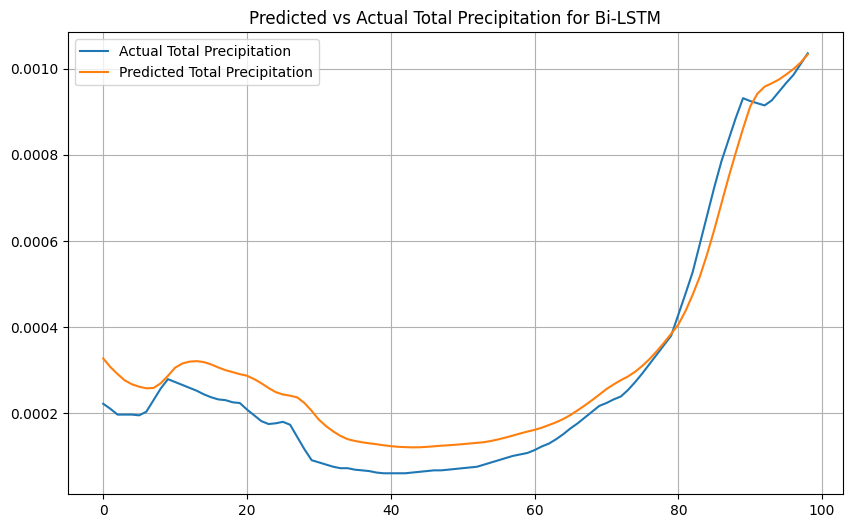

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y2_test[:,1][1:100], label='Actual Total Precipitation')
plt.plot(predictions[:,1][1:100], label='Predicted Total Precipitation')
plt.title('Predicted vs Actual Total Precipitation for Bi-LSTM')
plt.legend()
plt.grid()
plt.savefig('bilstm23.png')
plt.legend()
plt.show()

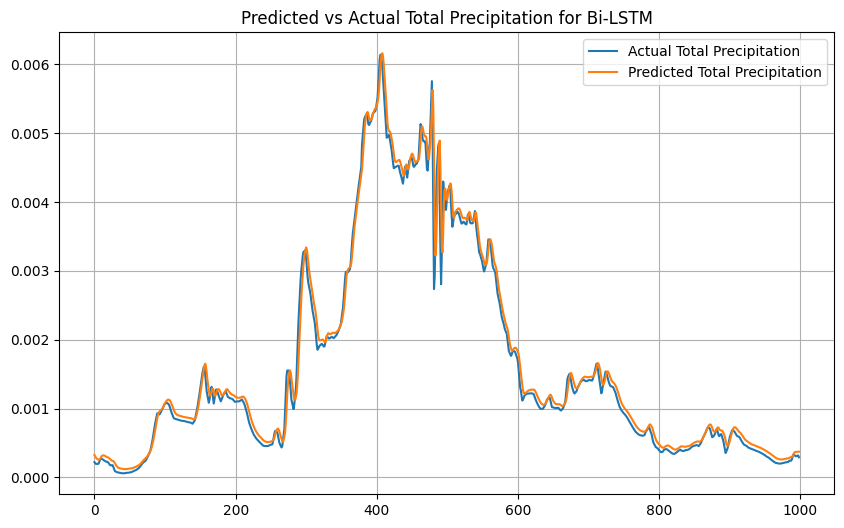

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y2_test[:,1][1:1000], label='Actual Total Precipitation')
plt.plot(predictions[:,1][1:1000], label='Predicted Total Precipitation')
plt.title('Predicted vs Actual Total Precipitation for Bi-LSTM')
plt.legend()
plt.grid()
plt.savefig('bilstm33.png')
plt.legend()
plt.show()

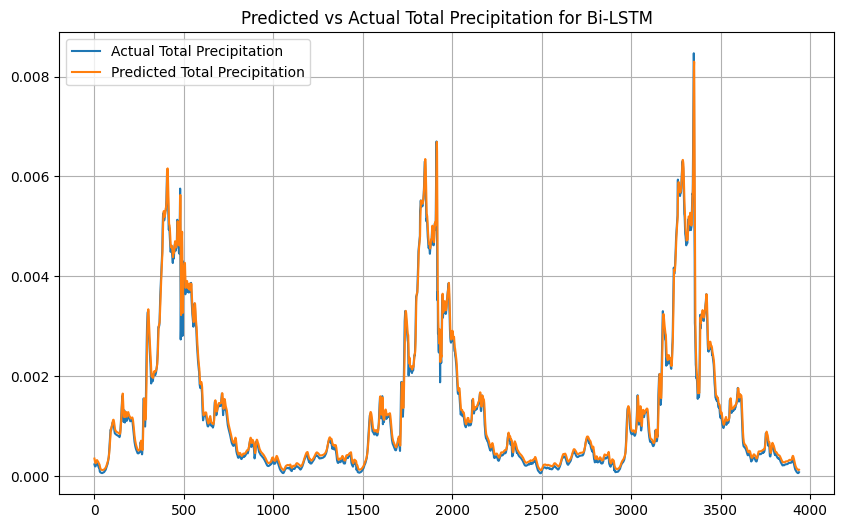

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y2_test[:,1], label='Actual Total Precipitation')
plt.plot(predictions[:,1], label='Predicted Total Precipitation')
plt.title('Predicted vs Actual Total Precipitation for Bi-LSTM')
plt.legend()
plt.grid()
plt.savefig('bilstm13.png')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from keras.layers import LSTM, Dense
from keras.layers import Bidirectional

# Build the model
model8 = Sequential()
model8.add(Bidirectional(LSTM(units=8, return_sequences=True, input_shape=(6,2))))
model8.add(Bidirectional(LSTM(units=8, return_sequences=False)))
model8.add(Dense(units=2))
cp8 = ModelCheckpoint('model8/', save_best_only=True)
model8.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

model8.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=120, callbacks=[cp8])
model8.summary()

Epoch 1/120
431/431 [==============================] - ETA: 0s - loss: 5.9955e-07 - root_mean_squared_error: 7.7431e-04

431/431 [==============================] - 52s 91ms/step - loss: 5.9955e-07 - root_mean_squared_error: 7.7431e-04 - val_loss: 4.7007e-08 - val_root_mean_squared_error: 2.1681e-04
Epoch 2/120
431/431 [==============================] - 7s 15ms/step - loss: 6.4453e-08 - root_mean_squared_error: 2.5388e-04 - val_loss: 6.8099e-08 - val_root_mean_squared_error: 2.6096e-04
Epoch 3/120
430/431 [============================>.] - ETA: 0s - loss: 5.8842e-08 - root_mean_squared_error: 2.4257e-04

431/431 [==============================] - 39s 90ms/step - loss: 5.8845e-08 - root_mean_squared_error: 2.4258e-04 - val_loss: 3.9982e-08 - val_root_mean_squared_error: 1.9995e-04
Epoch 4/120
431/431 [==============================] - 11s 24ms/step - loss: 5.2463e-08 - root_mean_squared_error: 2.2905e-04 - val_loss: 9.3205e-08 - val_root_mean_squared_error: 3.0529e-04
Epoch 5/120
431/431 [==============================] - 11s 26ms/step - loss: 5.4889e-08 - root_mean_squared_error: 2.3428e-04 - val_loss: 9.8093e-08 - val_root_mean_squared_error: 3.1320e-04
Epoch 6/120
430/431 [============================>.] - ETA: 0s - loss: 4.5339e-08 - root_mean_squared_error: 2.1293e-04

431/431 [==============================] - 57s 132ms/step - loss: 4.5290e-08 - root_mean_squared_error: 2.1282e-04 - val_loss: 2.5990e-08 - val_root_mean_squared_error: 1.6121e-04
Epoch 7/120
428/431 [============================>.] - ETA: 0s - loss: 3.7228e-08 - root_mean_squared_error: 1.9295e-04

431/431 [==============================] - 41s 96ms/step - loss: 3.7211e-08 - root_mean_squared_error: 1.9290e-04 - val_loss: 2.4668e-08 - val_root_mean_squared_error: 1.5706e-04
Epoch 8/120
429/431 [============================>.] - ETA: 0s - loss: 4.0298e-08 - root_mean_squared_error: 2.0074e-04

431/431 [==============================] - 45s 104ms/step - loss: 4.0158e-08 - root_mean_squared_error: 2.0040e-04 - val_loss: 1.7697e-08 - val_root_mean_squared_error: 1.3303e-04
Epoch 9/120
431/431 [==============================] - 7s 16ms/step - loss: 3.6963e-08 - root_mean_squared_error: 1.9226e-04 - val_loss: 7.0029e-08 - val_root_mean_squared_error: 2.6463e-04
Epoch 10/120
431/431 [==============================] - 9s 20ms/step - loss: 3.0664e-08 - root_mean_squared_error: 1.7511e-04 - val_loss: 5.9721e-08 - val_root_mean_squared_error: 2.4438e-04
Epoch 11/120
431/431 [==============================] - 11s 26ms/step - loss: 3.2508e-08 - root_mean_squared_error: 1.8030e-04 - val_loss: 6.6129e-08 - val_root_mean_squared_error: 2.5716e-04
Epoch 12/120
431/431 [==============================] - ETA: 0s - loss: 3.4889e-08 - root_mean_squared_error: 1.8678e-04

431/431 [==============================] - 45s 105ms/step - loss: 3.4889e-08 - root_mean_squared_error: 1.8678e-04 - val_loss: 1.3881e-08 - val_root_mean_squared_error: 1.1782e-04
Epoch 13/120
431/431 [==============================] - 7s 17ms/step - loss: 2.9830e-08 - root_mean_squared_error: 1.7271e-04 - val_loss: 2.1675e-08 - val_root_mean_squared_error: 1.4722e-04
Epoch 14/120
431/431 [==============================] - 6s 14ms/step - loss: 2.5901e-08 - root_mean_squared_error: 1.6094e-04 - val_loss: 2.2234e-08 - val_root_mean_squared_error: 1.4911e-04
Epoch 15/120
431/431 [==============================] - 8s 18ms/step - loss: 3.3004e-08 - root_mean_squared_error: 1.8167e-04 - val_loss: 4.5750e-08 - val_root_mean_squared_error: 2.1389e-04
Epoch 16/120
431/431 [==============================] - 6s 14ms/step - loss: 3.1105e-08 - root_mean_squared_error: 1.7637e-04 - val_loss: 2.3868e-08 - val_root_mean_squared_error: 1.5449e-04
Epoch 17/120
431/431 [==============================] - 

431/431 [==============================] - 39s 90ms/step - loss: 2.6811e-08 - root_mean_squared_error: 1.6374e-04 - val_loss: 1.2878e-08 - val_root_mean_squared_error: 1.1348e-04
Epoch 19/120
431/431 [==============================] - 7s 17ms/step - loss: 2.6474e-08 - root_mean_squared_error: 1.6271e-04 - val_loss: 3.3319e-08 - val_root_mean_squared_error: 1.8254e-04
Epoch 20/120
431/431 [==============================] - 7s 15ms/step - loss: 2.6067e-08 - root_mean_squared_error: 1.6145e-04 - val_loss: 1.4428e-08 - val_root_mean_squared_error: 1.2012e-04
Epoch 21/120
431/431 [==============================] - 8s 17ms/step - loss: 2.6660e-08 - root_mean_squared_error: 1.6328e-04 - val_loss: 3.1596e-08 - val_root_mean_squared_error: 1.7775e-04
Epoch 22/120
431/431 [==============================] - ETA: 0s - loss: 2.6043e-08 - root_mean_squared_error: 1.6138e-04

431/431 [==============================] - 38s 88ms/step - loss: 2.6043e-08 - root_mean_squared_error: 1.6138e-04 - val_loss: 9.1106e-09 - val_root_mean_squared_error: 9.5449e-05
Epoch 23/120
430/431 [============================>.] - ETA: 0s - loss: 2.3032e-08 - root_mean_squared_error: 1.5176e-04

431/431 [==============================] - 38s 89ms/step - loss: 2.3006e-08 - root_mean_squared_error: 1.5168e-04 - val_loss: 8.6875e-09 - val_root_mean_squared_error: 9.3207e-05
Epoch 24/120
431/431 [==============================] - 7s 16ms/step - loss: 2.2260e-08 - root_mean_squared_error: 1.4920e-04 - val_loss: 1.7130e-08 - val_root_mean_squared_error: 1.3088e-04
Epoch 25/120
431/431 [==============================] - 7s 17ms/step - loss: 2.6623e-08 - root_mean_squared_error: 1.6317e-04 - val_loss: 2.2849e-08 - val_root_mean_squared_error: 1.5116e-04
Epoch 26/120
431/431 [==============================] - 6s 15ms/step - loss: 2.3192e-08 - root_mean_squared_error: 1.5229e-04 - val_loss: 1.7933e-08 - val_root_mean_squared_error: 1.3391e-04
Epoch 27/120
431/431 [==============================] - 7s 17ms/step - loss: 2.1049e-08 - root_mean_squared_error: 1.4508e-04 - val_loss: 2.1458e-08 - val_root_mean_squared_error: 1.4649e-04
Epoch 28/120
431/431 [==============================] - 6

431/431 [==============================] - 37s 87ms/step - loss: 2.0394e-08 - root_mean_squared_error: 1.4281e-04 - val_loss: 8.6812e-09 - val_root_mean_squared_error: 9.3173e-05
Epoch 31/120
431/431 [==============================] - 6s 14ms/step - loss: 2.4776e-08 - root_mean_squared_error: 1.5740e-04 - val_loss: 1.3871e-08 - val_root_mean_squared_error: 1.1778e-04
Epoch 32/120
431/431 [==============================] - 7s 17ms/step - loss: 2.3262e-08 - root_mean_squared_error: 1.5252e-04 - val_loss: 3.9415e-08 - val_root_mean_squared_error: 1.9853e-04
Epoch 33/120
431/431 [==============================] - 6s 15ms/step - loss: 2.0116e-08 - root_mean_squared_error: 1.4183e-04 - val_loss: 1.8973e-08 - val_root_mean_squared_error: 1.3774e-04
Epoch 34/120
431/431 [==============================] - 7s 17ms/step - loss: 2.0277e-08 - root_mean_squared_error: 1.4240e-04 - val_loss: 2.7243e-08 - val_root_mean_squared_error: 1.6506e-04
Epoch 35/120
431/431 [==============================] - 7

431/431 [==============================] - 38s 89ms/step - loss: 1.9254e-08 - root_mean_squared_error: 1.3876e-04 - val_loss: 7.8934e-09 - val_root_mean_squared_error: 8.8845e-05
Epoch 38/120
431/431 [==============================] - 8s 18ms/step - loss: 2.1700e-08 - root_mean_squared_error: 1.4731e-04 - val_loss: 9.6143e-09 - val_root_mean_squared_error: 9.8052e-05
Epoch 39/120
431/431 [==============================] - 6s 15ms/step - loss: 1.7278e-08 - root_mean_squared_error: 1.3144e-04 - val_loss: 8.2212e-09 - val_root_mean_squared_error: 9.0671e-05
Epoch 40/120
431/431 [==============================] - 7s 17ms/step - loss: 2.0533e-08 - root_mean_squared_error: 1.4330e-04 - val_loss: 1.0733e-08 - val_root_mean_squared_error: 1.0360e-04
Epoch 41/120
431/431 [==============================] - 6s 15ms/step - loss: 2.0968e-08 - root_mean_squared_error: 1.4480e-04 - val_loss: 1.5896e-08 - val_root_mean_squared_error: 1.2608e-04
Epoch 42/120
431/431 [==============================] - 8

431/431 [==============================] - 38s 88ms/step - loss: 1.5875e-08 - root_mean_squared_error: 1.2600e-04 - val_loss: 7.4509e-09 - val_root_mean_squared_error: 8.6318e-05
Epoch 59/120
431/431 [==============================] - 6s 14ms/step - loss: 1.7594e-08 - root_mean_squared_error: 1.3264e-04 - val_loss: 1.3951e-08 - val_root_mean_squared_error: 1.1811e-04
Epoch 60/120
431/431 [==============================] - 7s 17ms/step - loss: 1.4866e-08 - root_mean_squared_error: 1.2193e-04 - val_loss: 2.1205e-08 - val_root_mean_squared_error: 1.4562e-04
Epoch 61/120
431/431 [==============================] - 6s 15ms/step - loss: 1.6577e-08 - root_mean_squared_error: 1.2875e-04 - val_loss: 1.8976e-08 - val_root_mean_squared_error: 1.3775e-04
Epoch 62/120
431/431 [==============================] - 8s 17ms/step - loss: 1.5712e-08 - root_mean_squared_error: 1.2535e-04 - val_loss: 3.4146e-08 - val_root_mean_squared_error: 1.8479e-04
Epoch 63/120
431/431 [==============================] - 6

431/431 [==============================] - 39s 91ms/step - loss: 1.1524e-08 - root_mean_squared_error: 1.0735e-04 - val_loss: 6.6808e-09 - val_root_mean_squared_error: 8.1736e-05
Epoch 84/120
431/431 [==============================] - 7s 15ms/step - loss: 1.4135e-08 - root_mean_squared_error: 1.1889e-04 - val_loss: 7.9928e-09 - val_root_mean_squared_error: 8.9402e-05
Epoch 85/120
431/431 [==============================] - 8s 18ms/step - loss: 1.3871e-08 - root_mean_squared_error: 1.1777e-04 - val_loss: 1.1971e-08 - val_root_mean_squared_error: 1.0941e-04
Epoch 86/120
431/431 [==============================] - 6s 15ms/step - loss: 1.4264e-08 - root_mean_squared_error: 1.1943e-04 - val_loss: 7.9561e-09 - val_root_mean_squared_error: 8.9197e-05
Epoch 87/120
431/431 [==============================] - 8s 18ms/step - loss: 1.3680e-08 - root_mean_squared_error: 1.1696e-04 - val_loss: 2.5683e-08 - val_root_mean_squared_error: 1.6026e-04
Epoch 88/120
431/431 [==============================] - 8

431/431 [==============================] - 39s 91ms/step - loss: 1.3191e-08 - root_mean_squared_error: 1.1485e-04 - val_loss: 5.8811e-09 - val_root_mean_squared_error: 7.6688e-05
Epoch 108/120
431/431 [==============================] - 7s 17ms/step - loss: 1.1879e-08 - root_mean_squared_error: 1.0899e-04 - val_loss: 1.9657e-08 - val_root_mean_squared_error: 1.4020e-04
Epoch 109/120
431/431 [==============================] - 8s 18ms/step - loss: 1.1884e-08 - root_mean_squared_error: 1.0901e-04 - val_loss: 6.1209e-09 - val_root_mean_squared_error: 7.8236e-05
Epoch 110/120
431/431 [==============================] - 6s 14ms/step - loss: 1.2518e-08 - root_mean_squared_error: 1.1188e-04 - val_loss: 2.0430e-08 - val_root_mean_squared_error: 1.4293e-04
Epoch 111/120
431/431 [==============================] - 8s 17ms/step - loss: 1.1653e-08 - root_mean_squared_error: 1.0795e-04 - val_loss: 2.6481e-08 - val_root_mean_squared_error: 1.6273e-04
Epoch 112/120
431/431 [==============================

431/431 [==============================] - 39s 91ms/step - loss: 1.1189e-08 - root_mean_squared_error: 1.0578e-04 - val_loss: 5.7747e-09 - val_root_mean_squared_error: 7.5991e-05
Epoch 117/120
431/431 [==============================] - 7s 15ms/step - loss: 1.2887e-08 - root_mean_squared_error: 1.1352e-04 - val_loss: 8.6544e-09 - val_root_mean_squared_error: 9.3029e-05
Epoch 118/120
431/431 [==============================] - 7s 17ms/step - loss: 1.0653e-08 - root_mean_squared_error: 1.0321e-04 - val_loss: 8.9131e-09 - val_root_mean_squared_error: 9.4409e-05
Epoch 119/120
431/431 [==============================] - 7s 17ms/step - loss: 1.1807e-08 - root_mean_squared_error: 1.0866e-04 - val_loss: 8.2096e-09 - val_root_mean_squared_error: 9.0607e-05
Epoch 120/120
431/431 [==============================] - 7s 16ms/step - loss: 1.1695e-08 - root_mean_squared_error: 1.0814e-04 - val_loss: 7.3212e-09 - val_root_mean_squared_error: 8.5564e-05
Model: "sequential_4"
_______________________________

In [ ]:
predictions = model8.predict(X2_test)
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
mse_bilstm2=mse(y2_test[:,1], predictions[:,1])
print(mse_bilstm2)
rmse_bilstm2=np.sqrt(mse(y2_test[:,1], predictions[:,1]))
print(rmse_bilstm2)
from sklearn.metrics import r2_score

r2_bilstm2 = r2_score(y2_test[:,1], predictions[:,1]).round(2)*100
print(r2_bilstm2)
from sklearn.metrics import mean_absolute_error

mae_bilstm2= mean_absolute_error(y2_test[:,1], predictions[:,1])
mae_bilstm2

124/124 [==============================] - 2s 4ms/step
3.165795101764521e-08
0.0001779268136556298
99.0


9.954846882517352e-05

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y2_test[:,1][1:100], label='Actual Total Precipitation')
plt.plot(predictions[:,1][1:100], label='Predicted Total Precipitation')
plt.title('Predicted vs Actual Total Precipitation for Bi-LSTM')
plt.legend()
plt.grid()
plt.savefig('bilstm24.png')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y2_test[:,1][1:1000], label='Actual Total Precipitation')
plt.plot(predictions[:,1][1:1000], label='Predicted Total Precipitation')
plt.title('Predicted vs Actual Total Precipitation for Bi-LSTM')
plt.legend()
plt.grid()
plt.savefig('bilstm34.png')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y2_test[:,1], label='Actual Total Precipitation')
plt.plot(predictions[:,1], label='Predicted Total Precipitation')
plt.title('Predicted vs Actual Total Precipitation for Bi-LSTM')
plt.legend()
plt.grid()
plt.savefig('bilstm14.png')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from keras.layers import LSTM, Dense
from keras.layers import Bidirectional

# Build the model
model8 = Sequential()
model8.add(Bidirectional(LSTM(units=8, return_sequences=True, input_shape=(6,2))))
model8.add(Bidirectional(LSTM(units=8, return_sequences=False)))
model8.add(Dense(units=2))
cp8 = ModelCheckpoint('model8/', save_best_only=True)
model8.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

model8.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=50, callbacks=[cp8])
model8.summary()

Epoch 1/50
431/431 [==============================] - ETA: 0s - loss: 6.7649e-07 - root_mean_squared_error: 8.2249e-04

431/431 [==============================] - 54s 101ms/step - loss: 6.7649e-07 - root_mean_squared_error: 8.2249e-04 - val_loss: 4.4834e-08 - val_root_mean_squared_error: 2.1174e-04
Epoch 2/50
431/431 [==============================] - 7s 15ms/step - loss: 5.5401e-08 - root_mean_squared_error: 2.3537e-04 - val_loss: 4.9330e-08 - val_root_mean_squared_error: 2.2210e-04
Epoch 3/50
429/431 [============================>.] - ETA: 0s - loss: 5.7742e-08 - root_mean_squared_error: 2.4030e-04

431/431 [==============================] - 41s 94ms/step - loss: 5.7691e-08 - root_mean_squared_error: 2.4019e-04 - val_loss: 3.3346e-08 - val_root_mean_squared_error: 1.8261e-04
Epoch 4/50
431/431 [==============================] - ETA: 0s - loss: 5.0867e-08 - root_mean_squared_error: 2.2554e-04

431/431 [==============================] - 41s 94ms/step - loss: 5.0867e-08 - root_mean_squared_error: 2.2554e-04 - val_loss: 2.2469e-08 - val_root_mean_squared_error: 1.4990e-04
Epoch 5/50
431/431 [==============================] - ETA: 0s - loss: 4.3367e-08 - root_mean_squared_error: 2.0825e-04

431/431 [==============================] - 40s 92ms/step - loss: 4.3367e-08 - root_mean_squared_error: 2.0825e-04 - val_loss: 1.7382e-08 - val_root_mean_squared_error: 1.3184e-04
Epoch 6/50
431/431 [==============================] - 7s 15ms/step - loss: 4.1823e-08 - root_mean_squared_error: 2.0451e-04 - val_loss: 6.6489e-08 - val_root_mean_squared_error: 2.5785e-04
Epoch 7/50
431/431 [==============================] - ETA: 0s - loss: 3.6628e-08 - root_mean_squared_error: 1.9138e-04

431/431 [==============================] - 40s 92ms/step - loss: 3.6628e-08 - root_mean_squared_error: 1.9138e-04 - val_loss: 1.6562e-08 - val_root_mean_squared_error: 1.2869e-04
Epoch 8/50
431/431 [==============================] - 8s 18ms/step - loss: 4.3381e-08 - root_mean_squared_error: 2.0828e-04 - val_loss: 2.1976e-08 - val_root_mean_squared_error: 1.4824e-04
Epoch 9/50
431/431 [==============================] - 7s 15ms/step - loss: 3.3097e-08 - root_mean_squared_error: 1.8193e-04 - val_loss: 2.9813e-08 - val_root_mean_squared_error: 1.7266e-04
Epoch 10/50
431/431 [==============================] - 8s 18ms/step - loss: 3.4742e-08 - root_mean_squared_error: 1.8639e-04 - val_loss: 2.5664e-08 - val_root_mean_squared_error: 1.6020e-04
Epoch 11/50
430/431 [============================>.] - ETA: 0s - loss: 3.1400e-08 - root_mean_squared_error: 1.7720e-04

431/431 [==============================] - 38s 89ms/step - loss: 3.1414e-08 - root_mean_squared_error: 1.7724e-04 - val_loss: 1.2026e-08 - val_root_mean_squared_error: 1.0967e-04
Epoch 12/50
431/431 [==============================] - 8s 18ms/step - loss: 2.9118e-08 - root_mean_squared_error: 1.7064e-04 - val_loss: 2.6583e-08 - val_root_mean_squared_error: 1.6304e-04
Epoch 13/50
431/431 [==============================] - 6s 15ms/step - loss: 2.9503e-08 - root_mean_squared_error: 1.7176e-04 - val_loss: 1.6372e-08 - val_root_mean_squared_error: 1.2795e-04
Epoch 14/50
431/431 [==============================] - 8s 18ms/step - loss: 3.1316e-08 - root_mean_squared_error: 1.7696e-04 - val_loss: 2.6966e-08 - val_root_mean_squared_error: 1.6421e-04
Epoch 15/50
431/431 [==============================] - 6s 15ms/step - loss: 2.7490e-08 - root_mean_squared_error: 1.6580e-04 - val_loss: 5.9662e-08 - val_root_mean_squared_error: 2.4426e-04
Epoch 16/50
431/431 [==============================] - 8s 18m

431/431 [==============================] - 38s 89ms/step - loss: 2.4795e-08 - root_mean_squared_error: 1.5746e-04 - val_loss: 9.1410e-09 - val_root_mean_squared_error: 9.5609e-05
Epoch 18/50
431/431 [==============================] - 6s 15ms/step - loss: 2.9736e-08 - root_mean_squared_error: 1.7244e-04 - val_loss: 5.0278e-08 - val_root_mean_squared_error: 2.2423e-04
Epoch 19/50
431/431 [==============================] - 8s 18ms/step - loss: 2.9339e-08 - root_mean_squared_error: 1.7129e-04 - val_loss: 1.5829e-08 - val_root_mean_squared_error: 1.2581e-04
Epoch 20/50
431/431 [==============================] - 7s 16ms/step - loss: 2.4079e-08 - root_mean_squared_error: 1.5518e-04 - val_loss: 4.3208e-08 - val_root_mean_squared_error: 2.0786e-04
Epoch 21/50
431/431 [==============================] - 7s 17ms/step - loss: 2.7473e-08 - root_mean_squared_error: 1.6575e-04 - val_loss: 1.2271e-08 - val_root_mean_squared_error: 1.1077e-04
Epoch 22/50
431/431 [==============================] - 7s 16m

In [ ]:
predictions = model8.predict(X2_test)
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
mse_bilstm2=mse(y2_test[:,1], predictions[:,1])
print(mse_bilstm2)
rmse_bilstm2=np.sqrt(mse(y2_test[:,1], predictions[:,1]))
print(rmse_bilstm2)
from sklearn.metrics import r2_score

r2_bilstm2 = r2_score(y2_test[:,1], predictions[:,1]).round(2)*100
print(r2_bilstm2)
from sklearn.metrics import mean_absolute_error

mae_bilstm2= mean_absolute_error(y2_test[:,1], predictions[:,1])
mae_bilstm2

124/124 [==============================] - 2s 4ms/step
8.01907156943139e-08
0.00028317965268414663
96.0


0.0002306343630214572

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from keras.layers import LSTM, Dense
from keras.layers import Bidirectional

# Build the model
model8 = Sequential()
model8.add(Bidirectional(LSTM(units=16, return_sequences=False, input_shape=(6,2))))
#model8.add(Bidirectional(LSTM(units=8, return_sequences=False)))
model8.add(Dense(units=2))
cp8 = ModelCheckpoint('model8/', save_best_only=True)
model8.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

model8.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=120, callbacks=[cp8])
model8.summary()

Epoch 1/120
429/431 [============================>.] - ETA: 0s - loss: 5.1998e-07 - root_mean_squared_error: 7.2110e-04

431/431 [==============================] - 30s 53ms/step - loss: 5.1792e-07 - root_mean_squared_error: 7.1966e-04 - val_loss: 4.0774e-08 - val_root_mean_squared_error: 2.0193e-04
Epoch 2/120
431/431 [==============================] - 4s 9ms/step - loss: 4.6524e-08 - root_mean_squared_error: 2.1569e-04 - val_loss: 1.0299e-07 - val_root_mean_squared_error: 3.2091e-04
Epoch 3/120
431/431 [==============================] - ETA: 0s - loss: 4.7419e-08 - root_mean_squared_error: 2.1776e-04

431/431 [==============================] - 20s 45ms/step - loss: 4.7419e-08 - root_mean_squared_error: 2.1776e-04 - val_loss: 2.5086e-08 - val_root_mean_squared_error: 1.5839e-04
Epoch 4/120
431/431 [==============================] - 4s 9ms/step - loss: 4.2033e-08 - root_mean_squared_error: 2.0502e-04 - val_loss: 3.0800e-08 - val_root_mean_squared_error: 1.7550e-04
Epoch 5/120
429/431 [============================>.] - ETA: 0s - loss: 4.2449e-08 - root_mean_squared_error: 2.0603e-04

431/431 [==============================] - 21s 50ms/step - loss: 4.2375e-08 - root_mean_squared_error: 2.0585e-04 - val_loss: 1.5262e-08 - val_root_mean_squared_error: 1.2354e-04
Epoch 6/120
431/431 [==============================] - 4s 9ms/step - loss: 3.6345e-08 - root_mean_squared_error: 1.9064e-04 - val_loss: 4.8668e-08 - val_root_mean_squared_error: 2.2061e-04
Epoch 7/120
431/431 [==============================] - 4s 9ms/step - loss: 2.8053e-08 - root_mean_squared_error: 1.6749e-04 - val_loss: 3.3358e-08 - val_root_mean_squared_error: 1.8264e-04
Epoch 8/120
426/431 [============================>.] - ETA: 0s - loss: 2.8215e-08 - root_mean_squared_error: 1.6797e-04

431/431 [==============================] - 21s 50ms/step - loss: 2.7997e-08 - root_mean_squared_error: 1.6732e-04 - val_loss: 1.3263e-08 - val_root_mean_squared_error: 1.1516e-04
Epoch 9/120
431/431 [==============================] - 4s 9ms/step - loss: 2.8212e-08 - root_mean_squared_error: 1.6797e-04 - val_loss: 2.6410e-08 - val_root_mean_squared_error: 1.6251e-04
Epoch 10/120
431/431 [==============================] - ETA: 0s - loss: 2.8145e-08 - root_mean_squared_error: 1.6777e-04

431/431 [==============================] - 21s 49ms/step - loss: 2.8145e-08 - root_mean_squared_error: 1.6777e-04 - val_loss: 1.2445e-08 - val_root_mean_squared_error: 1.1156e-04
Epoch 11/120
431/431 [==============================] - 4s 9ms/step - loss: 3.0296e-08 - root_mean_squared_error: 1.7406e-04 - val_loss: 6.0082e-08 - val_root_mean_squared_error: 2.4512e-04
Epoch 12/120
431/431 [==============================] - 5s 12ms/step - loss: 2.5036e-08 - root_mean_squared_error: 1.5823e-04 - val_loss: 5.9310e-08 - val_root_mean_squared_error: 2.4354e-04
Epoch 13/120
431/431 [==============================] - 4s 9ms/step - loss: 2.3805e-08 - root_mean_squared_error: 1.5429e-04 - val_loss: 3.4928e-08 - val_root_mean_squared_error: 1.8689e-04
Epoch 14/120
431/431 [==============================] - 4s 9ms/step - loss: 2.8806e-08 - root_mean_squared_error: 1.6972e-04 - val_loss: 5.2427e-08 - val_root_mean_squared_error: 2.2897e-04
Epoch 15/120
431/431 [==============================] - 5s 1

431/431 [==============================] - 20s 47ms/step - loss: 2.0392e-08 - root_mean_squared_error: 1.4280e-04 - val_loss: 1.0030e-08 - val_root_mean_squared_error: 1.0015e-04
Epoch 23/120
431/431 [==============================] - 5s 12ms/step - loss: 1.9382e-08 - root_mean_squared_error: 1.3922e-04 - val_loss: 4.0711e-08 - val_root_mean_squared_error: 2.0177e-04
Epoch 24/120
431/431 [==============================] - 4s 9ms/step - loss: 2.2803e-08 - root_mean_squared_error: 1.5101e-04 - val_loss: 2.3859e-08 - val_root_mean_squared_error: 1.5446e-04
Epoch 25/120
425/431 [============================>.] - ETA: 0s - loss: 1.8399e-08 - root_mean_squared_error: 1.3564e-04

431/431 [==============================] - 19s 45ms/step - loss: 1.8288e-08 - root_mean_squared_error: 1.3523e-04 - val_loss: 9.2205e-09 - val_root_mean_squared_error: 9.6024e-05
Epoch 26/120
431/431 [==============================] - 4s 10ms/step - loss: 2.0910e-08 - root_mean_squared_error: 1.4460e-04 - val_loss: 3.7225e-08 - val_root_mean_squared_error: 1.9294e-04
Epoch 27/120
431/431 [==============================] - 4s 9ms/step - loss: 2.0333e-08 - root_mean_squared_error: 1.4259e-04 - val_loss: 1.7496e-08 - val_root_mean_squared_error: 1.3227e-04
Epoch 28/120
431/431 [==============================] - 4s 10ms/step - loss: 1.9967e-08 - root_mean_squared_error: 1.4131e-04 - val_loss: 2.5736e-08 - val_root_mean_squared_error: 1.6043e-04
Epoch 29/120
431/431 [==============================] - 4s 10ms/step - loss: 1.9830e-08 - root_mean_squared_error: 1.4082e-04 - val_loss: 2.7247e-08 - val_root_mean_squared_error: 1.6507e-04
Epoch 30/120
431/431 [==============================] - 4s

431/431 [==============================] - 22s 52ms/step - loss: 1.7172e-08 - root_mean_squared_error: 1.3104e-04 - val_loss: 7.9279e-09 - val_root_mean_squared_error: 8.9039e-05
Epoch 36/120
431/431 [==============================] - 5s 11ms/step - loss: 1.8443e-08 - root_mean_squared_error: 1.3580e-04 - val_loss: 1.8925e-08 - val_root_mean_squared_error: 1.3757e-04
Epoch 37/120
431/431 [==============================] - 4s 10ms/step - loss: 1.8021e-08 - root_mean_squared_error: 1.3424e-04 - val_loss: 3.3388e-08 - val_root_mean_squared_error: 1.8272e-04
Epoch 38/120
431/431 [==============================] - 4s 9ms/step - loss: 1.8429e-08 - root_mean_squared_error: 1.3575e-04 - val_loss: 1.4488e-08 - val_root_mean_squared_error: 1.2037e-04
Epoch 39/120
431/431 [==============================] - 5s 11ms/step - loss: 1.5743e-08 - root_mean_squared_error: 1.2547e-04 - val_loss: 3.2021e-08 - val_root_mean_squared_error: 1.7894e-04
Epoch 40/120
431/431 [==============================] - 4s

431/431 [==============================] - 20s 47ms/step - loss: 1.6515e-08 - root_mean_squared_error: 1.2851e-04 - val_loss: 7.7645e-09 - val_root_mean_squared_error: 8.8117e-05
Epoch 44/120
431/431 [==============================] - 4s 10ms/step - loss: 1.5320e-08 - root_mean_squared_error: 1.2378e-04 - val_loss: 1.9483e-08 - val_root_mean_squared_error: 1.3958e-04
Epoch 45/120
431/431 [==============================] - 4s 10ms/step - loss: 1.4839e-08 - root_mean_squared_error: 1.2181e-04 - val_loss: 2.0441e-08 - val_root_mean_squared_error: 1.4297e-04
Epoch 46/120
431/431 [==============================] - 4s 9ms/step - loss: 1.7019e-08 - root_mean_squared_error: 1.3046e-04 - val_loss: 1.1480e-08 - val_root_mean_squared_error: 1.0714e-04
Epoch 47/120
431/431 [==============================] - 4s 10ms/step - loss: 1.5622e-08 - root_mean_squared_error: 1.2499e-04 - val_loss: 9.7619e-09 - val_root_mean_squared_error: 9.8803e-05
Epoch 48/120
431/431 [==============================] - 5s

431/431 [==============================] - 21s 49ms/step - loss: 1.4800e-08 - root_mean_squared_error: 1.2166e-04 - val_loss: 7.3138e-09 - val_root_mean_squared_error: 8.5521e-05
Epoch 52/120
431/431 [==============================] - 4s 9ms/step - loss: 1.5565e-08 - root_mean_squared_error: 1.2476e-04 - val_loss: 8.7845e-09 - val_root_mean_squared_error: 9.3726e-05
Epoch 53/120
431/431 [==============================] - 5s 11ms/step - loss: 1.4647e-08 - root_mean_squared_error: 1.2102e-04 - val_loss: 2.2238e-08 - val_root_mean_squared_error: 1.4912e-04
Epoch 54/120
431/431 [==============================] - 4s 9ms/step - loss: 1.5930e-08 - root_mean_squared_error: 1.2621e-04 - val_loss: 1.7904e-08 - val_root_mean_squared_error: 1.3381e-04
Epoch 55/120
431/431 [==============================] - ETA: 0s - loss: 1.3650e-08 - root_mean_squared_error: 1.1683e-04

431/431 [==============================] - 19s 45ms/step - loss: 1.3650e-08 - root_mean_squared_error: 1.1683e-04 - val_loss: 6.9221e-09 - val_root_mean_squared_error: 8.3199e-05
Epoch 56/120
427/431 [============================>.] - ETA: 0s - loss: 1.6769e-08 - root_mean_squared_error: 1.2949e-04

431/431 [==============================] - 21s 48ms/step - loss: 1.6763e-08 - root_mean_squared_error: 1.2947e-04 - val_loss: 6.8151e-09 - val_root_mean_squared_error: 8.2554e-05
Epoch 57/120
431/431 [==============================] - 5s 12ms/step - loss: 1.4836e-08 - root_mean_squared_error: 1.2180e-04 - val_loss: 1.7486e-08 - val_root_mean_squared_error: 1.3223e-04
Epoch 58/120
431/431 [==============================] - 4s 9ms/step - loss: 1.5624e-08 - root_mean_squared_error: 1.2500e-04 - val_loss: 2.5054e-08 - val_root_mean_squared_error: 1.5829e-04
Epoch 59/120
431/431 [==============================] - 4s 9ms/step - loss: 1.2677e-08 - root_mean_squared_error: 1.1259e-04 - val_loss: 2.0886e-08 - val_root_mean_squared_error: 1.4452e-04
Epoch 60/120
431/431 [==============================] - 5s 11ms/step - loss: 1.4734e-08 - root_mean_squared_error: 1.2138e-04 - val_loss: 1.2817e-08 - val_root_mean_squared_error: 1.1321e-04
Epoch 61/120
431/431 [==============================] - 4s 

431/431 [==============================] - 21s 48ms/step - loss: 1.2528e-08 - root_mean_squared_error: 1.1193e-04 - val_loss: 6.3144e-09 - val_root_mean_squared_error: 7.9463e-05
Epoch 66/120
431/431 [==============================] - 5s 11ms/step - loss: 1.3909e-08 - root_mean_squared_error: 1.1794e-04 - val_loss: 3.2298e-08 - val_root_mean_squared_error: 1.7972e-04
Epoch 67/120
431/431 [==============================] - 4s 10ms/step - loss: 1.2862e-08 - root_mean_squared_error: 1.1341e-04 - val_loss: 1.1006e-08 - val_root_mean_squared_error: 1.0491e-04
Epoch 68/120
431/431 [==============================] - 5s 11ms/step - loss: 1.3133e-08 - root_mean_squared_error: 1.1460e-04 - val_loss: 9.8539e-09 - val_root_mean_squared_error: 9.9267e-05
Epoch 69/120
431/431 [==============================] - 4s 10ms/step - loss: 1.2380e-08 - root_mean_squared_error: 1.1126e-04 - val_loss: 1.6711e-08 - val_root_mean_squared_error: 1.2927e-04
Epoch 70/120
431/431 [==============================] - 4

431/431 [==============================] - 21s 50ms/step - loss: 1.0629e-08 - root_mean_squared_error: 1.0310e-04 - val_loss: 5.5792e-09 - val_root_mean_squared_error: 7.4694e-05
Epoch 81/120
431/431 [==============================] - 4s 8ms/step - loss: 1.1030e-08 - root_mean_squared_error: 1.0502e-04 - val_loss: 6.1218e-09 - val_root_mean_squared_error: 7.8242e-05
Epoch 82/120
431/431 [==============================] - 4s 10ms/step - loss: 1.2147e-08 - root_mean_squared_error: 1.1021e-04 - val_loss: 1.5938e-08 - val_root_mean_squared_error: 1.2624e-04
Epoch 83/120
431/431 [==============================] - 5s 11ms/step - loss: 1.0712e-08 - root_mean_squared_error: 1.0350e-04 - val_loss: 8.6127e-09 - val_root_mean_squared_error: 9.2805e-05
Epoch 84/120
431/431 [==============================] - 4s 9ms/step - loss: 1.0591e-08 - root_mean_squared_error: 1.0291e-04 - val_loss: 1.7305e-08 - val_root_mean_squared_error: 1.3155e-04
Epoch 85/120
431/431 [==============================] - 4s 

431/431 [==============================] - 19s 44ms/step - loss: 1.0165e-08 - root_mean_squared_error: 1.0082e-04 - val_loss: 5.1720e-09 - val_root_mean_squared_error: 7.1916e-05
Epoch 87/120
431/431 [==============================] - 4s 9ms/step - loss: 1.0042e-08 - root_mean_squared_error: 1.0021e-04 - val_loss: 1.5638e-08 - val_root_mean_squared_error: 1.2505e-04
Epoch 88/120
431/431 [==============================] - 5s 12ms/step - loss: 9.5211e-09 - root_mean_squared_error: 9.7576e-05 - val_loss: 1.3756e-08 - val_root_mean_squared_error: 1.1729e-04
Epoch 89/120
431/431 [==============================] - 4s 8ms/step - loss: 9.7097e-09 - root_mean_squared_error: 9.8538e-05 - val_loss: 1.2868e-08 - val_root_mean_squared_error: 1.1344e-04
Epoch 90/120
431/431 [==============================] - 4s 9ms/step - loss: 1.0261e-08 - root_mean_squared_error: 1.0130e-04 - val_loss: 9.1725e-09 - val_root_mean_squared_error: 9.5773e-05
Epoch 91/120
431/431 [==============================] - 5s 1

431/431 [==============================] - 22s 50ms/step - loss: 1.1201e-08 - root_mean_squared_error: 1.0583e-04 - val_loss: 5.1614e-09 - val_root_mean_squared_error: 7.1843e-05
Epoch 95/120
425/431 [============================>.] - ETA: 0s - loss: 9.1986e-09 - root_mean_squared_error: 9.5910e-05

431/431 [==============================] - 20s 46ms/step - loss: 9.1766e-09 - root_mean_squared_error: 9.5794e-05 - val_loss: 4.6757e-09 - val_root_mean_squared_error: 6.8379e-05
Epoch 96/120
431/431 [==============================] - 5s 11ms/step - loss: 9.9624e-09 - root_mean_squared_error: 9.9812e-05 - val_loss: 8.9874e-09 - val_root_mean_squared_error: 9.4802e-05
Epoch 97/120
431/431 [==============================] - 4s 9ms/step - loss: 9.3493e-09 - root_mean_squared_error: 9.6692e-05 - val_loss: 9.7757e-09 - val_root_mean_squared_error: 9.8872e-05
Epoch 98/120
431/431 [==============================] - 4s 10ms/step - loss: 8.2273e-09 - root_mean_squared_error: 9.0704e-05 - val_loss: 5.5835e-09 - val_root_mean_squared_error: 7.4723e-05
Epoch 99/120
431/431 [==============================] - 5s 11ms/step - loss: 9.1505e-09 - root_mean_squared_error: 9.5658e-05 - val_loss: 1.5642e-08 - val_root_mean_squared_error: 1.2507e-04
Epoch 100/120
431/431 [==============================] - 4

431/431 [==============================] - 20s 46ms/step - loss: 9.3198e-09 - root_mean_squared_error: 9.6539e-05 - val_loss: 4.1341e-09 - val_root_mean_squared_error: 6.4297e-05
Epoch 107/120
431/431 [==============================] - 5s 12ms/step - loss: 9.0485e-09 - root_mean_squared_error: 9.5123e-05 - val_loss: 5.9763e-09 - val_root_mean_squared_error: 7.7306e-05
Epoch 108/120
431/431 [==============================] - 4s 9ms/step - loss: 8.2249e-09 - root_mean_squared_error: 9.0691e-05 - val_loss: 1.1433e-08 - val_root_mean_squared_error: 1.0693e-04
Epoch 109/120
431/431 [==============================] - 5s 11ms/step - loss: 9.3378e-09 - root_mean_squared_error: 9.6632e-05 - val_loss: 4.3557e-09 - val_root_mean_squared_error: 6.5998e-05
Epoch 110/120
431/431 [==============================] - 5s 12ms/step - loss: 7.5408e-09 - root_mean_squared_error: 8.6838e-05 - val_loss: 5.1679e-09 - val_root_mean_squared_error: 7.1888e-05
Epoch 111/120
431/431 [==============================]

431/431 [==============================] - 21s 48ms/step - loss: 8.1038e-09 - root_mean_squared_error: 9.0021e-05 - val_loss: 4.1265e-09 - val_root_mean_squared_error: 6.4238e-05
Epoch 116/120
431/431 [==============================] - 4s 9ms/step - loss: 7.8559e-09 - root_mean_squared_error: 8.8634e-05 - val_loss: 6.3433e-09 - val_root_mean_squared_error: 7.9645e-05
Epoch 117/120
431/431 [==============================] - 4s 9ms/step - loss: 7.8332e-09 - root_mean_squared_error: 8.8505e-05 - val_loss: 8.9855e-09 - val_root_mean_squared_error: 9.4792e-05
Epoch 118/120
431/431 [==============================] - 5s 12ms/step - loss: 8.9041e-09 - root_mean_squared_error: 9.4362e-05 - val_loss: 7.5459e-09 - val_root_mean_squared_error: 8.6867e-05
Epoch 119/120
431/431 [==============================] - 4s 9ms/step - loss: 8.2278e-09 - root_mean_squared_error: 9.0707e-05 - val_loss: 1.5038e-08 - val_root_mean_squared_error: 1.2263e-04
Epoch 120/120
431/431 [==============================] -

In [ ]:
predictions = model8.predict(X2_test)
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
mse_bilstm2=mse(y2_test[:,1], predictions[:,1])
print(mse_bilstm2)
rmse_bilstm2=np.sqrt(mse(y2_test[:,1], predictions[:,1]))
print(rmse_bilstm2)
from sklearn.metrics import r2_score

r2_bilstm2 = r2_score(y2_test[:,1], predictions[:,1]).round(2)*100
print(r2_bilstm2)
from sklearn.metrics import mean_absolute_error

mae_bilstm2= mean_absolute_error(y2_test[:,1], predictions[:,1])
mae_bilstm2

124/124 [==============================] - 1s 3ms/step
2.5885429755248938e-08
0.00016088949547825966
99.0


0.00012053482580814234

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from keras.layers import LSTM, Dense
from keras.layers import Bidirectional

# Build the model
model8 = Sequential()
model8.add(Bidirectional(LSTM(units=64, return_sequences=False, input_shape=(6,2))))
#model8.add(Bidirectional(LSTM(units=50, return_sequences=False)))
model8.add(Dense(units=2))
cp8 = ModelCheckpoint('model8/', save_best_only=True)
model8.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

model8.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=120, callbacks=[cp8])
model8.summary()


Epoch 1/120
431/431 [==============================] - ETA: 0s - loss: 8.6716e-07 - root_mean_squared_error: 9.3121e-04

431/431 [==============================] - 35s 61ms/step - loss: 8.6716e-07 - root_mean_squared_error: 9.3121e-04 - val_loss: 7.0201e-08 - val_root_mean_squared_error: 2.6495e-04
Epoch 2/120
429/431 [============================>.] - ETA: 0s - loss: 5.5635e-08 - root_mean_squared_error: 2.3587e-04

431/431 [==============================] - 22s 52ms/step - loss: 5.5798e-08 - root_mean_squared_error: 2.3622e-04 - val_loss: 5.8578e-08 - val_root_mean_squared_error: 2.4203e-04
Epoch 3/120
430/431 [============================>.] - ETA: 0s - loss: 5.3488e-08 - root_mean_squared_error: 2.3128e-04

431/431 [==============================] - 22s 51ms/step - loss: 5.3435e-08 - root_mean_squared_error: 2.3116e-04 - val_loss: 4.2410e-08 - val_root_mean_squared_error: 2.0594e-04
Epoch 4/120
429/431 [============================>.] - ETA: 0s - loss: 4.3672e-08 - root_mean_squared_error: 2.0898e-04

431/431 [==============================] - 21s 49ms/step - loss: 4.3574e-08 - root_mean_squared_error: 2.0874e-04 - val_loss: 3.8659e-08 - val_root_mean_squared_error: 1.9662e-04
Epoch 5/120
430/431 [============================>.] - ETA: 0s - loss: 4.0285e-08 - root_mean_squared_error: 2.0071e-04

431/431 [==============================] - 23s 52ms/step - loss: 4.0287e-08 - root_mean_squared_error: 2.0072e-04 - val_loss: 1.9170e-08 - val_root_mean_squared_error: 1.3846e-04
Epoch 6/120
428/431 [============================>.] - ETA: 0s - loss: 4.9065e-08 - root_mean_squared_error: 2.2151e-04

431/431 [==============================] - 23s 53ms/step - loss: 4.8926e-08 - root_mean_squared_error: 2.2119e-04 - val_loss: 1.2745e-08 - val_root_mean_squared_error: 1.1289e-04
Epoch 7/120
431/431 [==============================] - 5s 11ms/step - loss: 3.9631e-08 - root_mean_squared_error: 1.9907e-04 - val_loss: 1.0917e-07 - val_root_mean_squared_error: 3.3042e-04
Epoch 8/120
431/431 [==============================] - 6s 14ms/step - loss: 4.0315e-08 - root_mean_squared_error: 2.0079e-04 - val_loss: 2.6247e-08 - val_root_mean_squared_error: 1.6201e-04
Epoch 9/120
431/431 [==============================] - 5s 11ms/step - loss: 4.8217e-08 - root_mean_squared_error: 2.1958e-04 - val_loss: 1.5006e-08 - val_root_mean_squared_error: 1.2250e-04
Epoch 10/120
431/431 [==============================] - 6s 14ms/step - loss: 3.8908e-08 - root_mean_squared_error: 1.9725e-04 - val_loss: 3.1628e-08 - val_root_mean_squared_error: 1.7784e-04
Epoch 11/120
431/431 [==============================] - 5s 1

431/431 [==============================] - 21s 49ms/step - loss: 3.1076e-08 - root_mean_squared_error: 1.7628e-04 - val_loss: 1.0849e-08 - val_root_mean_squared_error: 1.0416e-04
Epoch 15/120
431/431 [==============================] - 5s 12ms/step - loss: 3.1608e-08 - root_mean_squared_error: 1.7779e-04 - val_loss: 5.1472e-08 - val_root_mean_squared_error: 2.2687e-04
Epoch 16/120
431/431 [==============================] - 5s 11ms/step - loss: 3.1134e-08 - root_mean_squared_error: 1.7645e-04 - val_loss: 7.8562e-08 - val_root_mean_squared_error: 2.8029e-04
Epoch 17/120
431/431 [==============================] - 6s 15ms/step - loss: 3.3773e-08 - root_mean_squared_error: 1.8378e-04 - val_loss: 3.0155e-08 - val_root_mean_squared_error: 1.7365e-04
Epoch 18/120
431/431 [==============================] - 5s 11ms/step - loss: 2.6562e-08 - root_mean_squared_error: 1.6298e-04 - val_loss: 2.3053e-08 - val_root_mean_squared_error: 1.5183e-04
Epoch 19/120
431/431 [==============================] - 6

431/431 [==============================] - 21s 49ms/step - loss: 2.2906e-08 - root_mean_squared_error: 1.5135e-04 - val_loss: 1.0662e-08 - val_root_mean_squared_error: 1.0326e-04
Epoch 24/120
430/431 [============================>.] - ETA: 0s - loss: 2.2835e-08 - root_mean_squared_error: 1.5111e-04

431/431 [==============================] - 21s 49ms/step - loss: 2.2825e-08 - root_mean_squared_error: 1.5108e-04 - val_loss: 8.8734e-09 - val_root_mean_squared_error: 9.4199e-05
Epoch 25/120
431/431 [==============================] - 6s 14ms/step - loss: 2.6713e-08 - root_mean_squared_error: 1.6344e-04 - val_loss: 2.1802e-08 - val_root_mean_squared_error: 1.4766e-04
Epoch 26/120
431/431 [==============================] - 5s 11ms/step - loss: 2.3119e-08 - root_mean_squared_error: 1.5205e-04 - val_loss: 2.8294e-08 - val_root_mean_squared_error: 1.6821e-04
Epoch 27/120
431/431 [==============================] - 5s 11ms/step - loss: 2.6648e-08 - root_mean_squared_error: 1.6324e-04 - val_loss: 1.2118e-08 - val_root_mean_squared_error: 1.1008e-04
Epoch 28/120
431/431 [==============================] - 6s 13ms/step - loss: 2.3750e-08 - root_mean_squared_error: 1.5411e-04 - val_loss: 2.5126e-08 - val_root_mean_squared_error: 1.5851e-04
Epoch 29/120
431/431 [==============================] - 5

431/431 [==============================] - 22s 51ms/step - loss: 1.7153e-08 - root_mean_squared_error: 1.3097e-04 - val_loss: 8.3329e-09 - val_root_mean_squared_error: 9.1285e-05
Epoch 45/120
430/431 [============================>.] - ETA: 0s - loss: 1.6092e-08 - root_mean_squared_error: 1.2685e-04

431/431 [==============================] - 21s 50ms/step - loss: 1.6120e-08 - root_mean_squared_error: 1.2697e-04 - val_loss: 7.9122e-09 - val_root_mean_squared_error: 8.8951e-05
Epoch 46/120
431/431 [==============================] - 5s 12ms/step - loss: 1.5467e-08 - root_mean_squared_error: 1.2437e-04 - val_loss: 2.1291e-08 - val_root_mean_squared_error: 1.4591e-04
Epoch 47/120
431/431 [==============================] - 5s 11ms/step - loss: 1.3526e-08 - root_mean_squared_error: 1.1630e-04 - val_loss: 2.8634e-08 - val_root_mean_squared_error: 1.6922e-04
Epoch 48/120
431/431 [==============================] - 6s 14ms/step - loss: 1.6340e-08 - root_mean_squared_error: 1.2783e-04 - val_loss: 2.5525e-08 - val_root_mean_squared_error: 1.5977e-04
Epoch 49/120
431/431 [==============================] - 5s 11ms/step - loss: 1.5729e-08 - root_mean_squared_error: 1.2541e-04 - val_loss: 2.0075e-08 - val_root_mean_squared_error: 1.4169e-04
Epoch 50/120
431/431 [==============================] - 6

431/431 [==============================] - 21s 48ms/step - loss: 1.2988e-08 - root_mean_squared_error: 1.1396e-04 - val_loss: 7.0065e-09 - val_root_mean_squared_error: 8.3705e-05
Epoch 54/120
431/431 [==============================] - 5s 11ms/step - loss: 1.3043e-08 - root_mean_squared_error: 1.1421e-04 - val_loss: 2.1522e-08 - val_root_mean_squared_error: 1.4670e-04
Epoch 55/120
431/431 [==============================] - 6s 14ms/step - loss: 1.5615e-08 - root_mean_squared_error: 1.2496e-04 - val_loss: 1.0931e-08 - val_root_mean_squared_error: 1.0455e-04
Epoch 56/120
428/431 [============================>.] - ETA: 0s - loss: 1.5031e-08 - root_mean_squared_error: 1.2260e-04

431/431 [==============================] - 22s 52ms/step - loss: 1.4981e-08 - root_mean_squared_error: 1.2240e-04 - val_loss: 5.6995e-09 - val_root_mean_squared_error: 7.5495e-05
Epoch 57/120
431/431 [==============================] - 5s 12ms/step - loss: 1.3192e-08 - root_mean_squared_error: 1.1486e-04 - val_loss: 1.1083e-08 - val_root_mean_squared_error: 1.0528e-04
Epoch 58/120
431/431 [==============================] - 5s 11ms/step - loss: 1.2635e-08 - root_mean_squared_error: 1.1240e-04 - val_loss: 2.2264e-08 - val_root_mean_squared_error: 1.4921e-04
Epoch 59/120
431/431 [==============================] - 6s 14ms/step - loss: 1.4645e-08 - root_mean_squared_error: 1.2102e-04 - val_loss: 1.1273e-08 - val_root_mean_squared_error: 1.0617e-04
Epoch 60/120
431/431 [==============================] - 5s 11ms/step - loss: 1.0997e-08 - root_mean_squared_error: 1.0486e-04 - val_loss: 5.7018e-09 - val_root_mean_squared_error: 7.5510e-05
Epoch 61/120
431/431 [==============================] - 6

431/431 [==============================] - 22s 51ms/step - loss: 1.1118e-08 - root_mean_squared_error: 1.0544e-04 - val_loss: 4.8322e-09 - val_root_mean_squared_error: 6.9514e-05
Epoch 72/120
431/431 [==============================] - 5s 11ms/step - loss: 9.9230e-09 - root_mean_squared_error: 9.9614e-05 - val_loss: 8.1899e-09 - val_root_mean_squared_error: 9.0498e-05
Epoch 73/120
431/431 [==============================] - 6s 14ms/step - loss: 1.1030e-08 - root_mean_squared_error: 1.0502e-04 - val_loss: 8.6419e-09 - val_root_mean_squared_error: 9.2962e-05
Epoch 74/120
431/431 [==============================] - 5s 11ms/step - loss: 1.1201e-08 - root_mean_squared_error: 1.0584e-04 - val_loss: 1.2181e-08 - val_root_mean_squared_error: 1.1037e-04
Epoch 75/120
431/431 [==============================] - 6s 14ms/step - loss: 1.0421e-08 - root_mean_squared_error: 1.0208e-04 - val_loss: 6.5824e-09 - val_root_mean_squared_error: 8.1132e-05
Epoch 76/120
431/431 [==============================] - 5

431/431 [==============================] - 22s 51ms/step - loss: 1.0497e-08 - root_mean_squared_error: 1.0246e-04 - val_loss: 4.6933e-09 - val_root_mean_squared_error: 6.8508e-05
Epoch 81/120
431/431 [==============================] - 5s 11ms/step - loss: 1.0085e-08 - root_mean_squared_error: 1.0043e-04 - val_loss: 1.2468e-08 - val_root_mean_squared_error: 1.1166e-04
Epoch 82/120
431/431 [==============================] - 6s 14ms/step - loss: 9.6557e-09 - root_mean_squared_error: 9.8264e-05 - val_loss: 6.2537e-09 - val_root_mean_squared_error: 7.9080e-05
Epoch 83/120
431/431 [==============================] - 5s 11ms/step - loss: 8.4874e-09 - root_mean_squared_error: 9.2127e-05 - val_loss: 1.6419e-08 - val_root_mean_squared_error: 1.2814e-04
Epoch 84/120
429/431 [============================>.] - ETA: 0s - loss: 9.9779e-09 - root_mean_squared_error: 9.9890e-05

431/431 [==============================] - 23s 53ms/step - loss: 9.9992e-09 - root_mean_squared_error: 9.9996e-05 - val_loss: 4.0277e-09 - val_root_mean_squared_error: 6.3464e-05
Epoch 85/120
431/431 [==============================] - 5s 11ms/step - loss: 9.7713e-09 - root_mean_squared_error: 9.8850e-05 - val_loss: 1.4063e-08 - val_root_mean_squared_error: 1.1859e-04
Epoch 86/120
431/431 [==============================] - 6s 14ms/step - loss: 9.8171e-09 - root_mean_squared_error: 9.9081e-05 - val_loss: 7.9072e-09 - val_root_mean_squared_error: 8.8923e-05
Epoch 87/120
431/431 [==============================] - 5s 11ms/step - loss: 1.0114e-08 - root_mean_squared_error: 1.0057e-04 - val_loss: 6.2817e-09 - val_root_mean_squared_error: 7.9257e-05
Epoch 88/120
431/431 [==============================] - 6s 15ms/step - loss: 9.5810e-09 - root_mean_squared_error: 9.7882e-05 - val_loss: 1.9806e-08 - val_root_mean_squared_error: 1.4073e-04
Epoch 89/120
431/431 [==============================] - 5

431/431 [==============================] - 20s 46ms/step - loss: 9.1966e-09 - root_mean_squared_error: 9.5899e-05 - val_loss: 3.7361e-09 - val_root_mean_squared_error: 6.1123e-05
Epoch 93/120
431/431 [==============================] - 6s 14ms/step - loss: 9.1209e-09 - root_mean_squared_error: 9.5503e-05 - val_loss: 1.8384e-08 - val_root_mean_squared_error: 1.3559e-04
Epoch 94/120
431/431 [==============================] - 5s 11ms/step - loss: 9.1010e-09 - root_mean_squared_error: 9.5399e-05 - val_loss: 4.7222e-09 - val_root_mean_squared_error: 6.8718e-05
Epoch 95/120
431/431 [==============================] - 6s 14ms/step - loss: 8.1189e-09 - root_mean_squared_error: 9.0105e-05 - val_loss: 1.5273e-08 - val_root_mean_squared_error: 1.2358e-04
Epoch 96/120
431/431 [==============================] - 5s 11ms/step - loss: 8.4929e-09 - root_mean_squared_error: 9.2157e-05 - val_loss: 2.0011e-08 - val_root_mean_squared_error: 1.4146e-04
Epoch 97/120
431/431 [==============================] - 5

431/431 [==============================] - 23s 53ms/step - loss: 7.2840e-09 - root_mean_squared_error: 8.5346e-05 - val_loss: 3.7183e-09 - val_root_mean_squared_error: 6.0978e-05
Epoch 102/120
431/431 [==============================] - 5s 13ms/step - loss: 7.3744e-09 - root_mean_squared_error: 8.5874e-05 - val_loss: 4.9201e-09 - val_root_mean_squared_error: 7.0144e-05
Epoch 103/120
431/431 [==============================] - 5s 11ms/step - loss: 6.6784e-09 - root_mean_squared_error: 8.1722e-05 - val_loss: 1.2053e-08 - val_root_mean_squared_error: 1.0979e-04
Epoch 104/120
431/431 [==============================] - 6s 14ms/step - loss: 8.7995e-09 - root_mean_squared_error: 9.3806e-05 - val_loss: 6.9933e-09 - val_root_mean_squared_error: 8.3626e-05
Epoch 105/120
431/431 [==============================] - 5s 11ms/step - loss: 7.6199e-09 - root_mean_squared_error: 8.7292e-05 - val_loss: 1.6539e-08 - val_root_mean_squared_error: 1.2860e-04
Epoch 106/120
431/431 [==============================

431/431 [==============================] - 22s 52ms/step - loss: 7.6982e-09 - root_mean_squared_error: 8.7739e-05 - val_loss: 3.2108e-09 - val_root_mean_squared_error: 5.6664e-05
Epoch 110/120
431/431 [==============================] - 6s 13ms/step - loss: 7.7667e-09 - root_mean_squared_error: 8.8129e-05 - val_loss: 1.1881e-08 - val_root_mean_squared_error: 1.0900e-04
Epoch 111/120
427/431 [============================>.] - ETA: 0s - loss: 8.1573e-09 - root_mean_squared_error: 9.0318e-05

431/431 [==============================] - 21s 49ms/step - loss: 8.1185e-09 - root_mean_squared_error: 9.0103e-05 - val_loss: 3.1393e-09 - val_root_mean_squared_error: 5.6029e-05
Epoch 112/120
431/431 [==============================] - 6s 14ms/step - loss: 8.0832e-09 - root_mean_squared_error: 8.9906e-05 - val_loss: 1.0201e-08 - val_root_mean_squared_error: 1.0100e-04
Epoch 113/120
431/431 [==============================] - 5s 11ms/step - loss: 7.9935e-09 - root_mean_squared_error: 8.9406e-05 - val_loss: 5.2992e-09 - val_root_mean_squared_error: 7.2796e-05
Epoch 114/120
431/431 [==============================] - 5s 12ms/step - loss: 7.0288e-09 - root_mean_squared_error: 8.3838e-05 - val_loss: 3.3495e-09 - val_root_mean_squared_error: 5.7875e-05
Epoch 115/120
431/431 [==============================] - 6s 13ms/step - loss: 8.0895e-09 - root_mean_squared_error: 8.9942e-05 - val_loss: 6.6428e-09 - val_root_mean_squared_error: 8.1503e-05
Epoch 116/120
431/431 [==============================

431/431 [==============================] - 23s 53ms/step - loss: 6.8313e-09 - root_mean_squared_error: 8.2652e-05 - val_loss: 3.0294e-09 - val_root_mean_squared_error: 5.5040e-05
Epoch 120/120
431/431 [==============================] - 5s 11ms/step - loss: 7.6635e-09 - root_mean_squared_error: 8.7541e-05 - val_loss: 3.6441e-09 - val_root_mean_squared_error: 6.0366e-05
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_9 (Bidirectio  (None, 128)              34304     
 nal)                                                            
                                                                 
 dense_7 (Dense)             (None, 2)                 258       
                                                                 
Total params: 34,562
Trainable params: 34,562
Non-trainable params: 0
_________________________________________________________________


In [ ]:
predictions = model8.predict(X2_test)
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
mse_bilstm2=mse(y2_test[:,1], predictions[:,1])
print(mse_bilstm2)
rmse_bilstm2=np.sqrt(mse(y2_test[:,1], predictions[:,1]))
print(rmse_bilstm2)
from sklearn.metrics import r2_score

r2_bilstm2 = r2_score(y2_test[:,1], predictions[:,1]).round(2)*100
print(r2_bilstm2)
from sklearn.metrics import mean_absolute_error

mae_bilstm2= mean_absolute_error(y2_test[:,1], predictions[:,1])
mae_bilstm2

124/124 [==============================] - 2s 4ms/step
1.4539447400907858e-08
0.00012057963095360616
99.0


6.23304865999621e-05

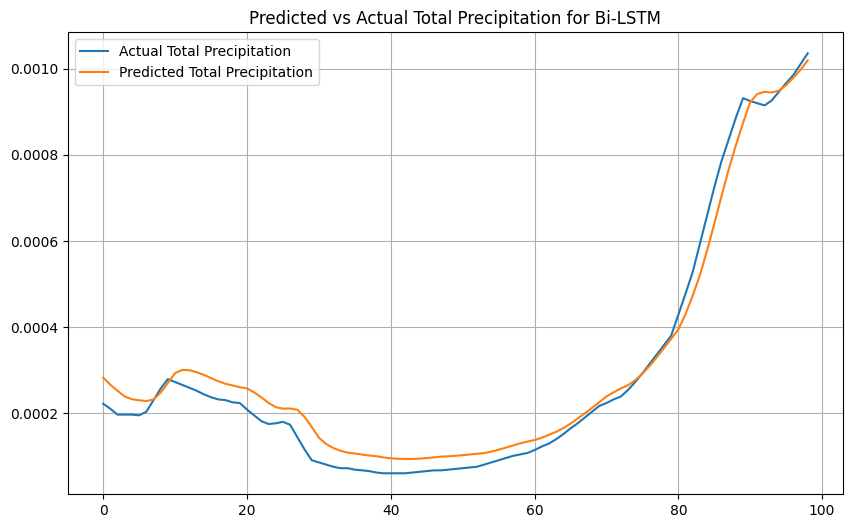

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y2_test[:,1][1:100], label='Actual Total Precipitation')
plt.plot(predictions[:,1][1:100], label='Predicted Total Precipitation')
plt.title('Predicted vs Actual Total Precipitation for Bi-LSTM')
plt.legend()
plt.grid()
plt.savefig('bilstm45.png')
plt.legend()
plt.show()

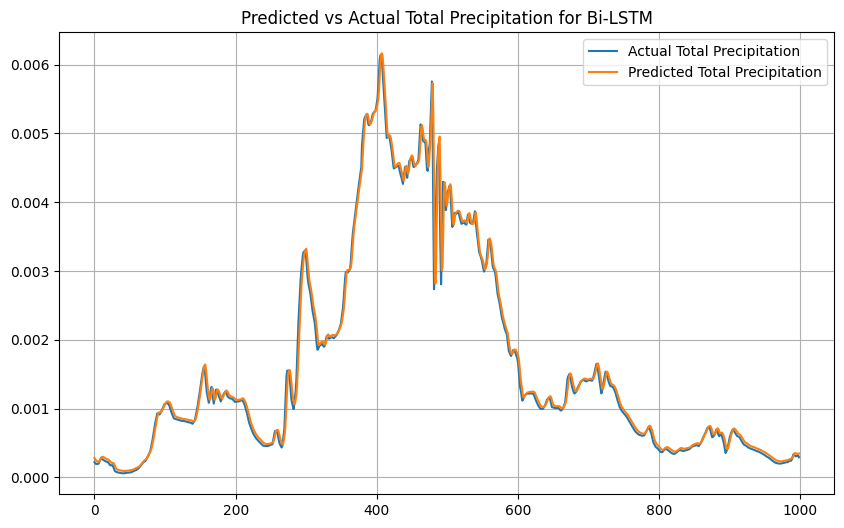

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y2_test[:,1][1:1000], label='Actual Total Precipitation')
plt.plot(predictions[:,1][1:1000], label='Predicted Total Precipitation')
plt.title('Predicted vs Actual Total Precipitation for Bi-LSTM')
plt.legend()
plt.grid()
plt.savefig('bilstm35.png')
plt.legend()
plt.show()

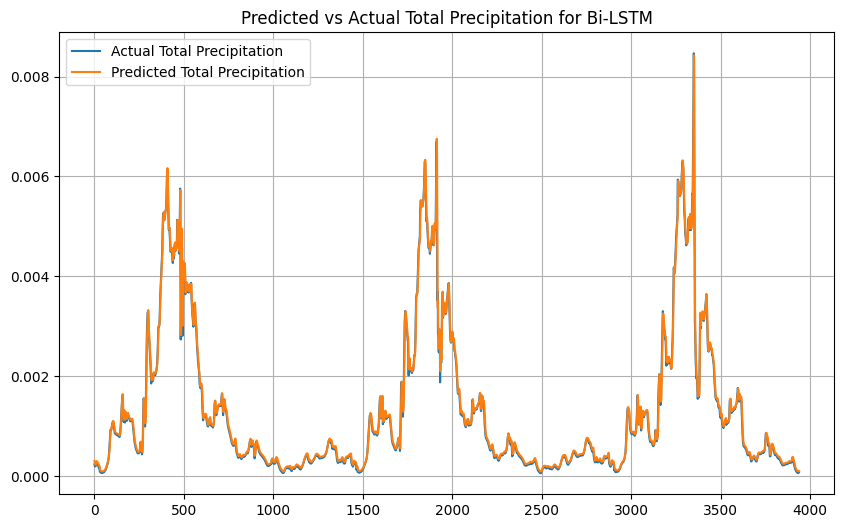

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y2_test[:,1], label='Actual Total Precipitation')
plt.plot(predictions[:,1], label='Predicted Total Precipitation')
plt.title('Predicted vs Actual Total Precipitation for Bi-LSTM')
plt.legend()
plt.grid()
plt.savefig('bilstm25.png')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from keras.layers import LSTM, Dense
from keras.layers import Bidirectional
#6464 tried 2. errror
# Build the model
model8 = Sequential()
model8.add(Bidirectional(LSTM(units=64, return_sequences=True, input_shape=(6,2))))
model8.add(Bidirectional(LSTM(units=64, return_sequences=False)))
model8.add(Dense(units=2))
cp8 = ModelCheckpoint('model8/', save_best_only=True)
model8.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

model8.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=120, callbacks=[cp8])
model8.summary()

Epoch 1/120
430/431 [============================>.] - ETA: 0s - loss: 1.5145e-06 - root_mean_squared_error: 0.0012

431/431 [==============================] - 62s 109ms/step - loss: 1.5117e-06 - root_mean_squared_error: 0.0012 - val_loss: 4.9312e-08 - val_root_mean_squared_error: 2.2206e-04
Epoch 2/120
431/431 [==============================] - 12s 27ms/step - loss: 7.8059e-08 - root_mean_squared_error: 2.7939e-04 - val_loss: 1.7967e-07 - val_root_mean_squared_error: 4.2388e-04
Epoch 3/120
431/431 [==============================] - 12s 27ms/step - loss: 7.6092e-08 - root_mean_squared_error: 2.7585e-04 - val_loss: 6.3197e-08 - val_root_mean_squared_error: 2.5139e-04
Epoch 4/120
431/431 [==============================] - 12s 27ms/step - loss: 8.9100e-08 - root_mean_squared_error: 2.9850e-04 - val_loss: 5.3937e-08 - val_root_mean_squared_error: 2.3224e-04
Epoch 5/120
429/431 [============================>.] - ETA: 0s - loss: 7.2744e-08 - root_mean_squared_error: 2.6971e-04

431/431 [==============================] - 45s 104ms/step - loss: 7.3018e-08 - root_mean_squared_error: 2.7022e-04 - val_loss: 3.6574e-08 - val_root_mean_squared_error: 1.9124e-04
Epoch 6/120
431/431 [==============================] - 13s 30ms/step - loss: 8.0008e-08 - root_mean_squared_error: 2.8286e-04 - val_loss: 5.8991e-08 - val_root_mean_squared_error: 2.4288e-04
Epoch 7/120
431/431 [==============================] - 11s 26ms/step - loss: 8.0775e-08 - root_mean_squared_error: 2.8421e-04 - val_loss: 6.6276e-08 - val_root_mean_squared_error: 2.5744e-04
Epoch 8/120
429/431 [============================>.] - ETA: 0s - loss: 5.9142e-08 - root_mean_squared_error: 2.4319e-04

431/431 [==============================] - 44s 102ms/step - loss: 5.9722e-08 - root_mean_squared_error: 2.4438e-04 - val_loss: 2.7027e-08 - val_root_mean_squared_error: 1.6440e-04
Epoch 9/120
431/431 [==============================] - 11s 27ms/step - loss: 7.0632e-08 - root_mean_squared_error: 2.6577e-04 - val_loss: 8.9118e-08 - val_root_mean_squared_error: 2.9853e-04
Epoch 10/120
431/431 [==============================] - 11s 26ms/step - loss: 6.9758e-08 - root_mean_squared_error: 2.6412e-04 - val_loss: 5.8794e-08 - val_root_mean_squared_error: 2.4247e-04
Epoch 11/120
431/431 [==============================] - 11s 26ms/step - loss: 5.7723e-08 - root_mean_squared_error: 2.4026e-04 - val_loss: 4.6517e-08 - val_root_mean_squared_error: 2.1568e-04
Epoch 12/120
431/431 [==============================] - 11s 26ms/step - loss: 5.9047e-08 - root_mean_squared_error: 2.4300e-04 - val_loss: 1.5555e-07 - val_root_mean_squared_error: 3.9440e-04
Epoch 13/120
431/431 [==============================]

431/431 [==============================] - 43s 99ms/step - loss: 3.8967e-08 - root_mean_squared_error: 1.9740e-04 - val_loss: 2.1536e-08 - val_root_mean_squared_error: 1.4675e-04
Epoch 23/120
431/431 [==============================] - 11s 26ms/step - loss: 4.0704e-08 - root_mean_squared_error: 2.0175e-04 - val_loss: 6.5578e-08 - val_root_mean_squared_error: 2.5608e-04
Epoch 24/120
431/431 [==============================] - 11s 26ms/step - loss: 3.8206e-08 - root_mean_squared_error: 1.9546e-04 - val_loss: 4.6392e-08 - val_root_mean_squared_error: 2.1539e-04
Epoch 25/120
431/431 [==============================] - 12s 27ms/step - loss: 4.0167e-08 - root_mean_squared_error: 2.0042e-04 - val_loss: 2.3613e-08 - val_root_mean_squared_error: 1.5366e-04
Epoch 26/120
431/431 [==============================] - 11s 25ms/step - loss: 4.0420e-08 - root_mean_squared_error: 2.0105e-04 - val_loss: 3.1864e-08 - val_root_mean_squared_error: 1.7850e-04
Epoch 27/120
430/431 [============================>.]

431/431 [==============================] - 43s 101ms/step - loss: 3.7147e-08 - root_mean_squared_error: 1.9274e-04 - val_loss: 1.5084e-08 - val_root_mean_squared_error: 1.2282e-04
Epoch 28/120
431/431 [==============================] - 11s 26ms/step - loss: 3.6366e-08 - root_mean_squared_error: 1.9070e-04 - val_loss: 1.5166e-08 - val_root_mean_squared_error: 1.2315e-04
Epoch 29/120
431/431 [==============================] - 11s 26ms/step - loss: 3.9971e-08 - root_mean_squared_error: 1.9993e-04 - val_loss: 2.3458e-08 - val_root_mean_squared_error: 1.5316e-04
Epoch 30/120
431/431 [==============================] - 11s 26ms/step - loss: 3.6848e-08 - root_mean_squared_error: 1.9196e-04 - val_loss: 2.6846e-08 - val_root_mean_squared_error: 1.6385e-04
Epoch 31/120
431/431 [==============================] - 10s 23ms/step - loss: 2.9738e-08 - root_mean_squared_error: 1.7245e-04 - val_loss: 2.9495e-08 - val_root_mean_squared_error: 1.7174e-04
Epoch 32/120
431/431 [==============================

431/431 [==============================] - 44s 102ms/step - loss: 2.8984e-08 - root_mean_squared_error: 1.7025e-04 - val_loss: 1.1118e-08 - val_root_mean_squared_error: 1.0544e-04
Epoch 42/120
431/431 [==============================] - 10s 23ms/step - loss: 2.4871e-08 - root_mean_squared_error: 1.5770e-04 - val_loss: 5.5074e-08 - val_root_mean_squared_error: 2.3468e-04
Epoch 43/120
431/431 [==============================] - 11s 26ms/step - loss: 2.7010e-08 - root_mean_squared_error: 1.6435e-04 - val_loss: 2.5021e-08 - val_root_mean_squared_error: 1.5818e-04
Epoch 44/120
431/431 [==============================] - 11s 26ms/step - loss: 2.8019e-08 - root_mean_squared_error: 1.6739e-04 - val_loss: 2.2550e-08 - val_root_mean_squared_error: 1.5017e-04
Epoch 45/120
431/431 [==============================] - 11s 26ms/step - loss: 2.6141e-08 - root_mean_squared_error: 1.6168e-04 - val_loss: 1.5162e-08 - val_root_mean_squared_error: 1.2313e-04
Epoch 46/120
431/431 [==============================

431/431 [==============================] - 43s 101ms/step - loss: 2.6780e-08 - root_mean_squared_error: 1.6365e-04 - val_loss: 9.7682e-09 - val_root_mean_squared_error: 9.8834e-05
Epoch 54/120
431/431 [==============================] - 11s 26ms/step - loss: 2.2166e-08 - root_mean_squared_error: 1.4888e-04 - val_loss: 6.2705e-08 - val_root_mean_squared_error: 2.5041e-04
Epoch 55/120
431/431 [==============================] - 12s 27ms/step - loss: 2.4804e-08 - root_mean_squared_error: 1.5749e-04 - val_loss: 3.3728e-08 - val_root_mean_squared_error: 1.8365e-04
Epoch 56/120
431/431 [==============================] - 11s 26ms/step - loss: 2.4342e-08 - root_mean_squared_error: 1.5602e-04 - val_loss: 2.3225e-08 - val_root_mean_squared_error: 1.5240e-04
Epoch 57/120
431/431 [==============================] - 11s 27ms/step - loss: 2.3515e-08 - root_mean_squared_error: 1.5335e-04 - val_loss: 2.0213e-08 - val_root_mean_squared_error: 1.4217e-04
Epoch 58/120
431/431 [==============================

431/431 [==============================] - 43s 99ms/step - loss: 2.1615e-08 - root_mean_squared_error: 1.4702e-04 - val_loss: 9.4431e-09 - val_root_mean_squared_error: 9.7176e-05
Epoch 64/120
431/431 [==============================] - 11s 26ms/step - loss: 2.3284e-08 - root_mean_squared_error: 1.5259e-04 - val_loss: 1.4505e-08 - val_root_mean_squared_error: 1.2044e-04
Epoch 65/120
431/431 [==============================] - 11s 25ms/step - loss: 2.0556e-08 - root_mean_squared_error: 1.4337e-04 - val_loss: 1.1062e-08 - val_root_mean_squared_error: 1.0518e-04
Epoch 66/120
431/431 [==============================] - 11s 26ms/step - loss: 2.4080e-08 - root_mean_squared_error: 1.5518e-04 - val_loss: 9.9075e-09 - val_root_mean_squared_error: 9.9536e-05
Epoch 67/120
431/431 [==============================] - 11s 26ms/step - loss: 2.3399e-08 - root_mean_squared_error: 1.5297e-04 - val_loss: 3.1719e-08 - val_root_mean_squared_error: 1.7810e-04
Epoch 68/120
431/431 [==============================]

431/431 [==============================] - 45s 104ms/step - loss: 2.1236e-08 - root_mean_squared_error: 1.4572e-04 - val_loss: 9.4266e-09 - val_root_mean_squared_error: 9.7091e-05
Epoch 72/120
431/431 [==============================] - 11s 27ms/step - loss: 1.8870e-08 - root_mean_squared_error: 1.3737e-04 - val_loss: 3.9356e-08 - val_root_mean_squared_error: 1.9838e-04
Epoch 73/120
431/431 [==============================] - ETA: 0s - loss: 2.2929e-08 - root_mean_squared_error: 1.5142e-04

431/431 [==============================] - 43s 99ms/step - loss: 2.2929e-08 - root_mean_squared_error: 1.5142e-04 - val_loss: 9.2903e-09 - val_root_mean_squared_error: 9.6386e-05
Epoch 74/120
431/431 [==============================] - 11s 26ms/step - loss: 1.8236e-08 - root_mean_squared_error: 1.3504e-04 - val_loss: 1.3146e-08 - val_root_mean_squared_error: 1.1466e-04
Epoch 75/120
431/431 [==============================] - ETA: 0s - loss: 2.1181e-08 - root_mean_squared_error: 1.4554e-04

431/431 [==============================] - 43s 100ms/step - loss: 2.1181e-08 - root_mean_squared_error: 1.4554e-04 - val_loss: 8.9254e-09 - val_root_mean_squared_error: 9.4474e-05
Epoch 76/120
431/431 [==============================] - 11s 26ms/step - loss: 1.9011e-08 - root_mean_squared_error: 1.3788e-04 - val_loss: 3.5003e-08 - val_root_mean_squared_error: 1.8709e-04
Epoch 77/120
431/431 [==============================] - 11s 26ms/step - loss: 2.0858e-08 - root_mean_squared_error: 1.4442e-04 - val_loss: 1.2868e-08 - val_root_mean_squared_error: 1.1344e-04
Epoch 78/120
431/431 [==============================] - 12s 27ms/step - loss: 1.7897e-08 - root_mean_squared_error: 1.3378e-04 - val_loss: 9.9170e-09 - val_root_mean_squared_error: 9.9584e-05
Epoch 79/120
431/431 [==============================] - 12s 27ms/step - loss: 2.0463e-08 - root_mean_squared_error: 1.4305e-04 - val_loss: 6.1584e-08 - val_root_mean_squared_error: 2.4816e-04
Epoch 80/120
431/431 [==============================

431/431 [==============================] - 43s 100ms/step - loss: 1.8377e-08 - root_mean_squared_error: 1.3556e-04 - val_loss: 8.1616e-09 - val_root_mean_squared_error: 9.0342e-05
Epoch 88/120
431/431 [==============================] - 11s 26ms/step - loss: 1.7141e-08 - root_mean_squared_error: 1.3092e-04 - val_loss: 2.1480e-08 - val_root_mean_squared_error: 1.4656e-04
Epoch 89/120
431/431 [==============================] - 12s 27ms/step - loss: 1.8152e-08 - root_mean_squared_error: 1.3473e-04 - val_loss: 4.7875e-08 - val_root_mean_squared_error: 2.1880e-04
Epoch 90/120
431/431 [==============================] - 11s 26ms/step - loss: 1.9398e-08 - root_mean_squared_error: 1.3928e-04 - val_loss: 2.4350e-08 - val_root_mean_squared_error: 1.5605e-04
Epoch 91/120
430/431 [============================>.] - ETA: 0s - loss: 1.5585e-08 - root_mean_squared_error: 1.2484e-04

431/431 [==============================] - 43s 99ms/step - loss: 1.5564e-08 - root_mean_squared_error: 1.2476e-04 - val_loss: 8.1171e-09 - val_root_mean_squared_error: 9.0095e-05
Epoch 92/120
431/431 [==============================] - 11s 26ms/step - loss: 1.8532e-08 - root_mean_squared_error: 1.3613e-04 - val_loss: 1.8632e-08 - val_root_mean_squared_error: 1.3650e-04
Epoch 93/120
431/431 [==============================] - 11s 27ms/step - loss: 2.0260e-08 - root_mean_squared_error: 1.4234e-04 - val_loss: 1.3084e-08 - val_root_mean_squared_error: 1.1438e-04
Epoch 94/120
431/431 [==============================] - 11s 26ms/step - loss: 1.7555e-08 - root_mean_squared_error: 1.3250e-04 - val_loss: 2.0779e-08 - val_root_mean_squared_error: 1.4415e-04
Epoch 95/120
431/431 [==============================] - 12s 27ms/step - loss: 1.8594e-08 - root_mean_squared_error: 1.3636e-04 - val_loss: 2.2159e-08 - val_root_mean_squared_error: 1.4886e-04
Epoch 96/120
431/431 [==============================]

431/431 [==============================] - 46s 107ms/step - loss: 1.7645e-08 - root_mean_squared_error: 1.3283e-04 - val_loss: 7.9276e-09 - val_root_mean_squared_error: 8.9037e-05
Epoch 109/120
431/431 [==============================] - 21s 48ms/step - loss: 1.6158e-08 - root_mean_squared_error: 1.2711e-04 - val_loss: 1.6007e-08 - val_root_mean_squared_error: 1.2652e-04
Epoch 110/120
431/431 [==============================] - 26s 61ms/step - loss: 1.4323e-08 - root_mean_squared_error: 1.1968e-04 - val_loss: 2.3080e-08 - val_root_mean_squared_error: 1.5192e-04
Epoch 111/120
431/431 [==============================] - 19s 44ms/step - loss: 1.6772e-08 - root_mean_squared_error: 1.2951e-04 - val_loss: 1.0683e-08 - val_root_mean_squared_error: 1.0336e-04
Epoch 112/120
431/431 [==============================] - 11s 26ms/step - loss: 1.5400e-08 - root_mean_squared_error: 1.2410e-04 - val_loss: 2.0956e-08 - val_root_mean_squared_error: 1.4476e-04
Epoch 113/120
431/431 [=========================

431/431 [==============================] - 45s 105ms/step - loss: 1.4203e-08 - root_mean_squared_error: 1.1918e-04 - val_loss: 6.4110e-09 - val_root_mean_squared_error: 8.0069e-05
Epoch 120/120
431/431 [==============================] - 11s 26ms/step - loss: 1.6059e-08 - root_mean_squared_error: 1.2672e-04 - val_loss: 6.8765e-09 - val_root_mean_squared_error: 8.2925e-05
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_10 (Bidirecti  (None, 6, 128)           34304     
 onal)                                                           
                                                                 
 bidirectional_11 (Bidirecti  (None, 128)              98816     
 onal)                                                           
                                                                 
 dense_8 (Dense)             (None, 2)                 258       
           

In [ ]:
predictions = model8.predict(X2_test)
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
mse_bilstm2=mse(y2_test[:,1], predictions[:,1])
print(mse_bilstm2)
rmse_bilstm2=np.sqrt(mse(y2_test[:,1], predictions[:,1]))
print(rmse_bilstm2)
from sklearn.metrics import r2_score

r2_bilstm2 = r2_score(y2_test[:,1], predictions[:,1]).round(2)*100
print(r2_bilstm2)
from sklearn.metrics import mean_absolute_error

mae_bilstm2= mean_absolute_error(y2_test[:,1], predictions[:,1])
mae_bilstm2

124/124 [==============================] - 3s 10ms/step
2.6676965075178863e-08
0.00016333084544928696
99.0


7.700769766641664e-05

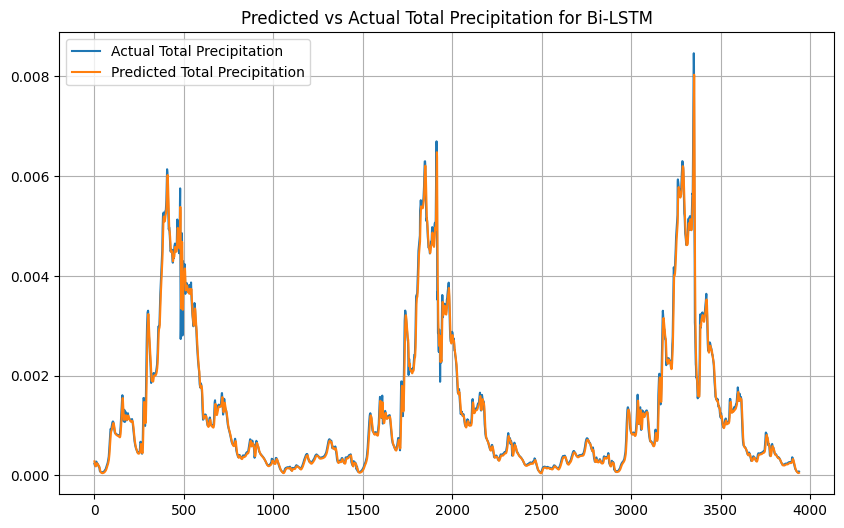

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y2_test[:,1], label='Actual Total Precipitation')
plt.plot(predictions[:,1], label='Predicted Total Precipitation')
plt.title('Predicted vs Actual Total Precipitation for Bi-LSTM')
plt.legend()
plt.grid()
plt.savefig('bilstm26.png')
plt.legend()
plt.show()

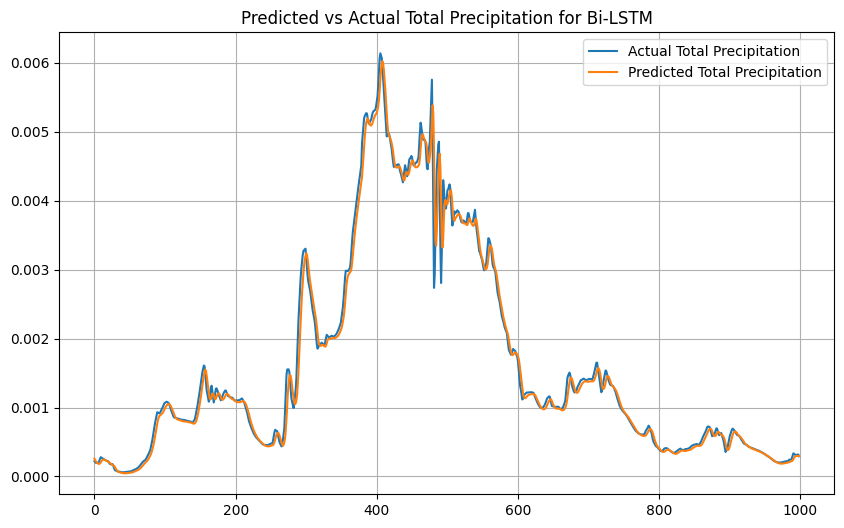

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y2_test[:,1][1:1000], label='Actual Total Precipitation')
plt.plot(predictions[:,1][1:1000], label='Predicted Total Precipitation')
plt.title('Predicted vs Actual Total Precipitation for Bi-LSTM')
plt.legend()
plt.grid()
plt.savefig('bilstm36.png')
plt.legend()
plt.show()

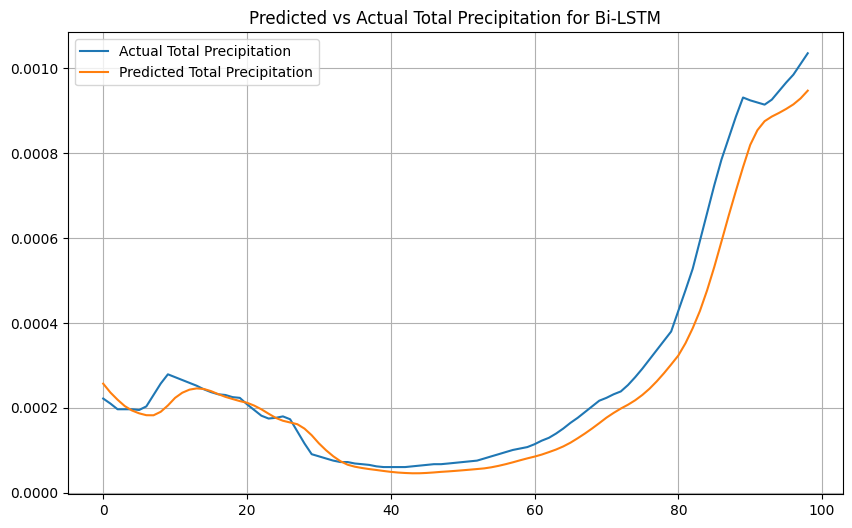

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y2_test[:,1][1:100], label='Actual Total Precipitation')
plt.plot(predictions[:,1][1:100], label='Predicted Total Precipitation')
plt.title('Predicted vs Actual Total Precipitation for Bi-LSTM')
plt.legend()
plt.grid()
plt.savefig('bilstm46.png')
plt.legend()
plt.show()

In [ ]:
#HYBRID
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from keras.layers import LSTM, Dense,GRU
model5 = Sequential()
model5.add(LSTM(units=32, return_sequences=True, input_shape=(6,2)))
model5.add(GRU(units=64, return_sequences=True))
model5.add(LSTM(units=64, return_sequences=False))
model5.add(Dense(units=2))
#model5.compile(optimizer='adam', loss='mean_squared_error')
cp5 = ModelCheckpoint('model5/', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])
# Train the model
history_lstmgru=model5.fit(X2_train, y2_train, epochs=120, batch_size=64, validation_data=(X2_test, y2_test))
history_lstmgru
#model5.summary()

Epoch 1/120
216/216 [==============================] - 15s 25ms/step - loss: 3.1607e-06 - root_mean_squared_error: 0.0018 - val_loss: 1.3164e-06 - val_root_mean_squared_error: 0.0011
Epoch 2/120
216/216 [==============================] - 4s 20ms/step - loss: 7.6828e-07 - root_mean_squared_error: 8.7652e-04 - val_loss: 7.6643e-07 - val_root_mean_squared_error: 8.7546e-04
Epoch 3/120
216/216 [==============================] - 6s 27ms/step - loss: 2.2312e-07 - root_mean_squared_error: 4.7236e-04 - val_loss: 1.5616e-07 - val_root_mean_squared_error: 3.9517e-04
Epoch 4/120
216/216 [==============================] - 4s 20ms/step - loss: 8.2711e-08 - root_mean_squared_error: 2.8760e-04 - val_loss: 1.5722e-07 - val_root_mean_squared_error: 3.9651e-04
Epoch 5/120
216/216 [==============================] - 4s 20ms/step - loss: 9.5439e-08 - root_mean_squared_error: 3.0893e-04 - val_loss: 1.9073e-07 - val_root_mean_squared_error: 4.3673e-04
Epoch 6/120
216/216 [==============================] - 6s

In [ ]:
predictions = model5.predict(X2_test)
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
mse_hybrid=mse(y2_test[:,1], predictions[:,1])
print(mse_hybrid)
rmse_hybrid=np.sqrt(mse(y2_test[:,1], predictions[:,1]))
print(rmse_hybrid)
from sklearn.metrics import r2_score

r2_hybrid = r2_score(y2_test[:,1], predictions[:,1]).round(2)*100
print(r2_hybrid)
from sklearn.metrics import mean_absolute_error

mae_hybrid= mean_absolute_error(y2_test[:,1], predictions[:,1])
mae_hybrid

124/124 [==============================] - 2s 5ms/step
6.37723942053096e-08
0.0002525319666998806
97.0


0.00017184493655898799

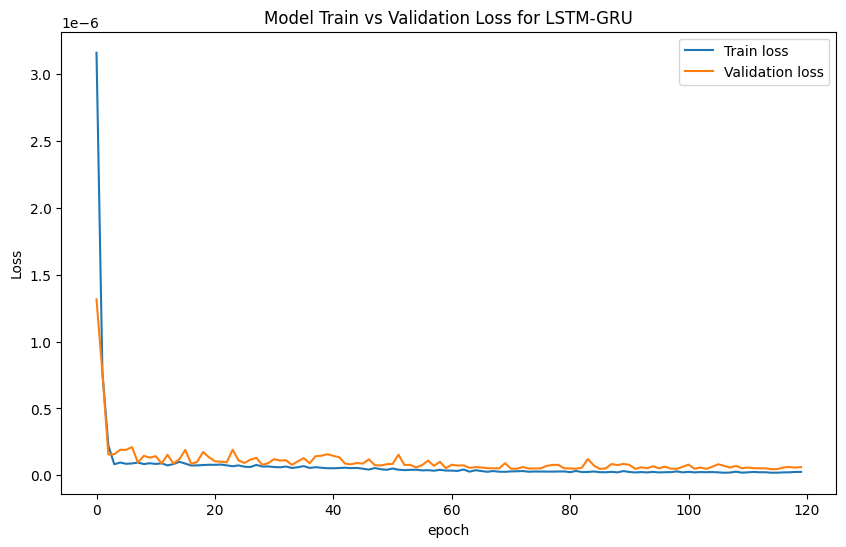

In [ ]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_lstmgru, 'LSTM-GRU')
#plot_loss (history_bilstm, ‘Bidirectional LSTM’)